In [1]:
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')


# Cargar archivo .env
# Ruta relativa desde el notebook hasta el .env
dotenv_path = '../generadores/.env'  #

# Cargar el archivo .env desde la ruta especificada
load_dotenv(dotenv_path=dotenv_path)

# Leer variables de entorno
username = os.getenv("USUARIO_DB")
password = os.getenv("CLAVE_BD")

# Validar que se cargaron bien
print("Usuario:", username)
print("Contraseña cargada:", bool(password))  # No imprime la clave, pero verifica si existe

if not username or not password:
    raise ValueError("Las variables de entorno USUARIO_DB o CLAVE_BD no están definidas")

# Cadena de conexión
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=upgradeserver-vf.database.windows.net;'
    'DATABASE=Banco;'
    f'UID={username};'
    f'PWD={password}'
)

# Conexión
conn = pyodbc.connect(conn_str)



Usuario: vanesa
Contraseña cargada: True


In [2]:
# Consulta de prueba
query_usuarios = "SELECT * FROM usuarios" 
df_usuarios = pd.read_sql(query_usuarios, conn)
df_usuarios.head()

id    nombre apellido estado_civil        dni nacionalidad  \
0   1     Isaac      Bas      Soltero  50803891L    Andorrana   
1   2  Sandalio  Fuentes   Divorciado  86252814P      Noruega   
2   3    Dorita   Tejera      Soltera  89546650Z    Argentina   
3   4     Mario    Lopez      Soltero  79407181A      Armenia   
4   5   Luciano   Osorio   Divorciado  11417891R       Croata   

  fecha_nacimiento                                          direccion  \
0       1976-08-03           Acceso de Lupe Alegre 4, Albacete, 49375   
1       1978-05-08  Cuesta de Teófilo Somoza 3 Puerta 8 , Huelva, ...   
2       1962-01-16  Camino de Danilo Roldan 54 Puerta 7 , La Coruñ...   
3       1958-02-09  Acceso Cebrián Balaguer 75 Piso 0 , Pontevedra...   
4       1987-02-23  Calle de Obdulia Múñiz 89 Piso 1 , Almería, 37332   

  codigo_postal provincia   telefono                   email  es_moroso  \
0         04461  Zaragoza  612998046    pepita46@example.net      False   
1         05617     Soria  770595376  hcalatayud@example.com      False   
2         33705     Cádiz  664201115   julietapi@example.org      False   
3         51941      Jaén  612845864  rinconirma@example.org      False   
4         27760  Asturias  682543717   ciriaco75@example.net      False   

                                           profesion  salario  \
0  Preparador y elaborador de tabaco y sus productos  2982.68   
1  Gerente de sucursales de bancos, de servicios ...  5444.37   
2                  Peón de jardinería y horticultura  3235.68   
3       Vendedor de quioscos y de puestos de mercado  3592.85   
4  Mecánico y reparador de máquinas agrícolas e i...  1302.73   

              numero_cuenta tipo_cuenta     saldo antiguedad_cliente  \
0  ES3179968971026971199366   corriente  71063.73         2021-10-30   
1  ES4882819013135814761921   corriente  59066.89         2020-10-19   
2  ES8896352888935177230208   corriente  69020.29         2020-08-31   
3  ES8080924363933477280294   corriente  43431.75         2021-06-20   
4  ES9451266251700653094652   corriente  24346.41         2020-09-10   

      genero  
0  Masculino  
1  Masculino  
2   Femenino  
3  Masculino  
4  Masculino

In [3]:
# Consulta de prueba
query_activos = "SELECT * FROM activos_financieros" 
df_activos = pd.read_sql(query_activos, conn)
df_activos.head()

id  usuario_id  tipo_activo          descripcion      monto
0   1           7       ahorro  Activos financieros   74284.27
1   2           8       ahorro  Activos financieros   14384.02
2   3           7  inversiones  Activos financieros  222459.66
3   4           3       ahorro  Activos financieros   59254.00
4   5           5       ahorro  Activos financieros    9822.68

In [4]:

# Consulta de prueba
query_creditos = "SELECT * FROM creditos" 
df_creditos = pd.read_sql(query_creditos, conn)
df_creditos.head()

id  usuario_id     monto fecha_inicio   fecha_fin  estado         tipo
0   1        3479  13158.92   2021-06-27  2021-12-24  Pagado   Automotriz
1   2        9766  27855.84   2021-06-27  2025-06-06  Pagado  Estudiantil
2   3        5687  24341.30   2020-10-02  2022-09-22  Activo  Hipotecario
3   4        6279  48965.73   2022-11-18  2023-11-13  Moroso     Personal
4   5         496   5623.96   2022-08-16  2026-07-26  Pagado     Personal

In [5]:

# Consulta de prueba
query_cuentas = "SELECT * FROM cuentas_bancarias" 
df_cuentas = pd.read_sql(query_cuentas, conn)
df_cuentas.head()

id  usuario_id             numero_cuenta tipo_cuenta     saldo
0   1          10  ES7739637164360193114526      ahorro  66755.89
1   2          10  ES1316574526906275603407     empresa  95837.31
2   3           3  ES5865885769854836821457      nómina  42972.24
3   4           4  ES5167158907887819348998      ahorro    899.28
4   5           1  ES4649322614789355112278      nómina  88410.84

In [6]:

# Consulta de prueba
query_monedas = "SELECT * FROM monedas_digitales" 
df_monedas = pd.read_sql(query_monedas, conn)
df_monedas.head()

id  usuario_id tipo_moneda      cantidad  valor_actual
0   1           5         ADA   8727.795885          0.79
1   2           7         BTC      1.137435      56869.56
2   3           9         BTC      0.479071      50116.50
3   4           9         XRP  12265.715992          0.30
4   5           4         ETH      8.786425       2443.99

#### EDA

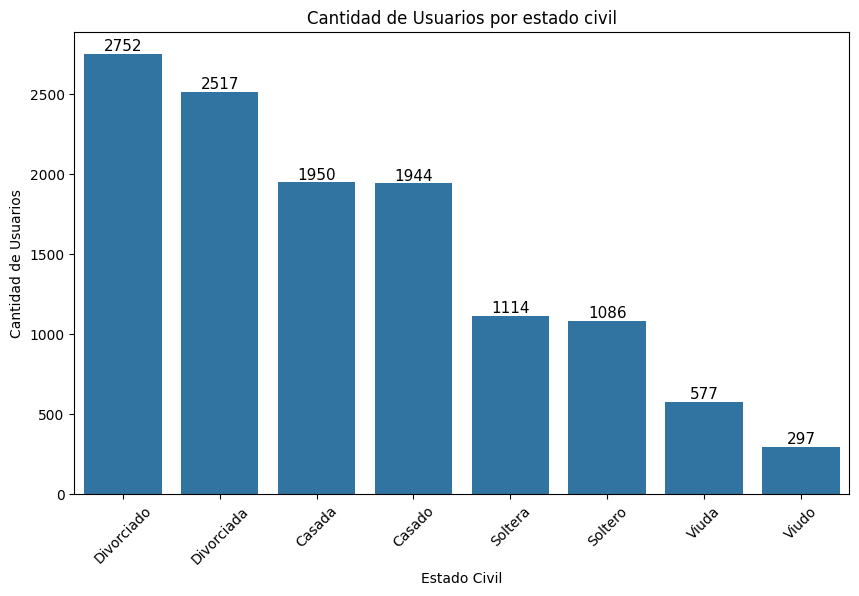

In [7]:
# Consulta para obtener todos los usuarios
query = "SELECT * FROM usuarios"
df_usuarios = pd.read_sql(query, conn)

# Gráfico de barras de la cantidad de usuarios por estado civil
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_usuarios, x='estado_civil', order=df_usuarios['estado_civil'].value_counts().index)
plt.title('Cantidad de Usuarios por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)

# Añadir etiquetas en las columnas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.show()

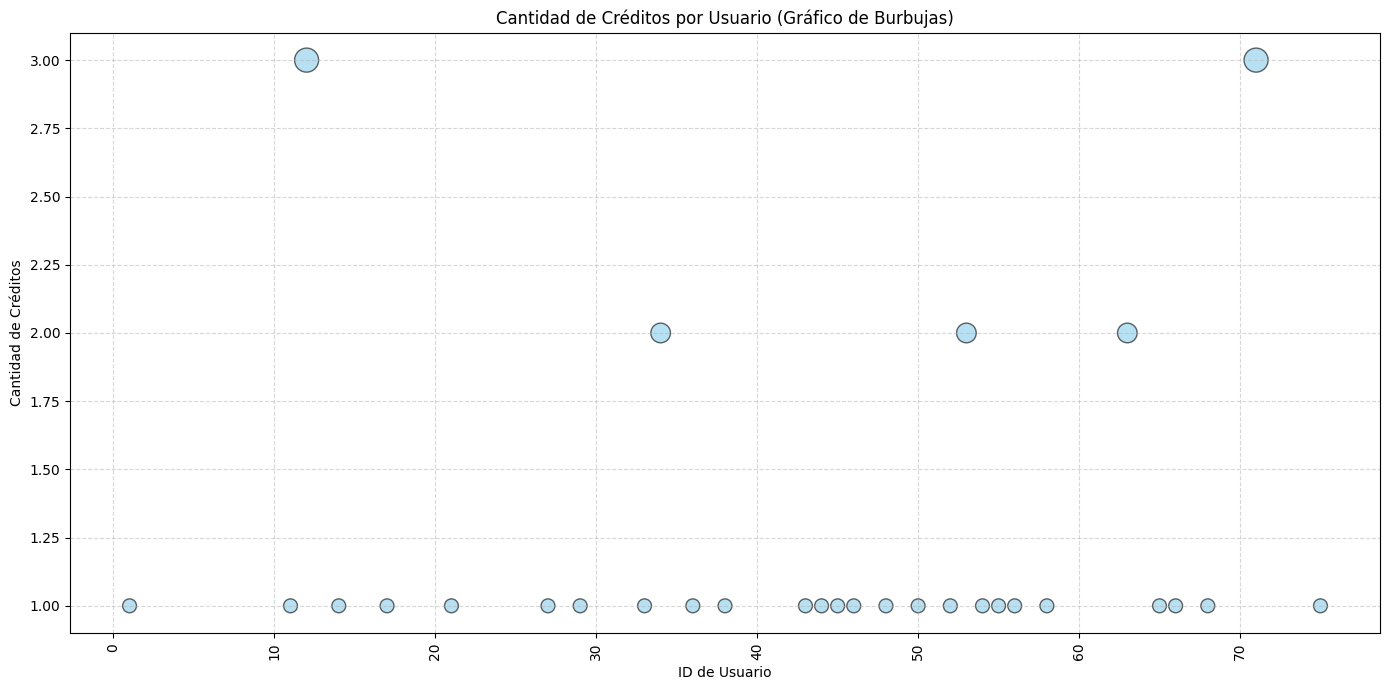

In [8]:
# Obtener todos los créditos
query = "SELECT * FROM creditos"
df_creditos = pd.read_sql(query, conn)

# Agrupar por usuario_id y contar la cantidad de créditos por cada uno
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='creditos')

# Gráfico de burbujas: mostrar solo los primeros 30 usuarios
plt.figure(figsize=(14, 7))
plt.scatter(
    creditos_por_usuario['usuario_id'].head(30),
    creditos_por_usuario['creditos'].head(30),
    s=creditos_por_usuario['creditos'].head(30) * 100,  # tamaño de burbuja
    alpha=0.6,
    color='skyblue',
    edgecolors='k'
)
plt.title('Cantidad de Créditos por Usuario (Gráfico de Burbujas)')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



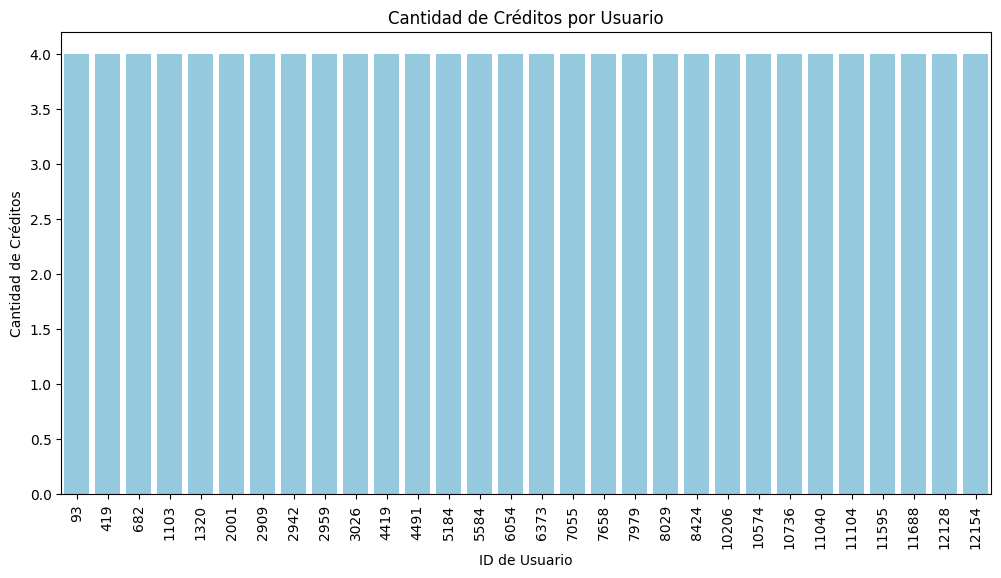

In [9]:
#calcular la cantidad de creditos por usuario
creditos_por_usuario = df_creditos['usuario_id'].value_counts().reset_index()
creditos_por_usuario.columns = ['usuario_id', 'creditos']
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=creditos_por_usuario.head(30),  # muestra los 30 primeros para mejor visualización
    x='usuario_id',
    y='creditos',
    color='skyblue'
)
plt.title('Cantidad de Créditos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.show()

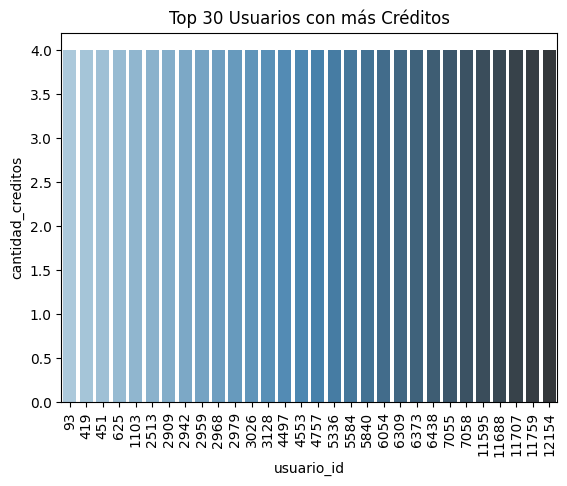

In [10]:
# Obtener todos los créditos
creditos = "SELECT * FROM creditos"
df_creditos = pd.read_sql(creditos, conn)

# Créditos por usuario
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')

# Top 30 usuarios con más créditos
top_creditos = creditos_por_usuario.sort_values('cantidad_creditos', ascending=False).head(30)

# Graficar
sns.barplot(data=top_creditos, x='usuario_id', y='cantidad_creditos', palette='Blues_d')
plt.title("Top 30 Usuarios con más Créditos")
plt.xticks(rotation=90)
plt.show()

In [11]:
#El credito de mas valor
# Agrupar por usuario y sumar los créditos
usuario_max_credito = df_creditos.groupby('usuario_id')['monto'].sum().idxmax()

# Mostrar el usuario con más créditos
print(f"El uUsuario con menos el crédito más elevado: {usuario_max_credito}")
# Obtener también el monto de crédito
max_credito = df_creditos.groupby('usuario_id')['monto'].sum().max()

print(f"Usuario con menos el crédito más elevado: {usuario_max_credito}, Créditos totales: {max_credito} €")



El uUsuario con menos el crédito más elevado: 5184
Usuario con menos el crédito más elevado: 5184, Créditos totales: 170079.0 €


In [12]:
#el credito de menos valor
# Agrupar por usuario y sumar los créditos
usuario_max_credito = df_creditos.groupby('usuario_id')['monto'].sum().idxmin()

# Mostrar el usuario con más créditos
print(f"suario con menos el crédito más bajo {usuario_max_credito}")
# Obtener también el monto de crédito
max_credito = df_creditos.groupby('usuario_id')['monto'].sum().min()

print(f"Usuario con menos el crédito más bajo: {usuario_max_credito}, Créditos totales: {max_credito} €")

suario con menos el crédito más bajo 10056
Usuario con menos el crédito más bajo: 10056, Créditos totales: 1008.39 €


In [13]:
#cantidad mayor de prestamo
# Contar cuántos créditos solicitó cada usuario
conteo_creditos = df_creditos['usuario_id'].value_counts()

# Obtener el usuario con más créditos
usuario_mas_creditos = conteo_creditos.idxmax()
cantidad_creditos = conteo_creditos.max()

print(f"El usuario {usuario_mas_creditos} es el que más créditos ha solicitado, con un total de {cantidad_creditos} créditos.")


El usuario 2942 es el que más créditos ha solicitado, con un total de 4 créditos.


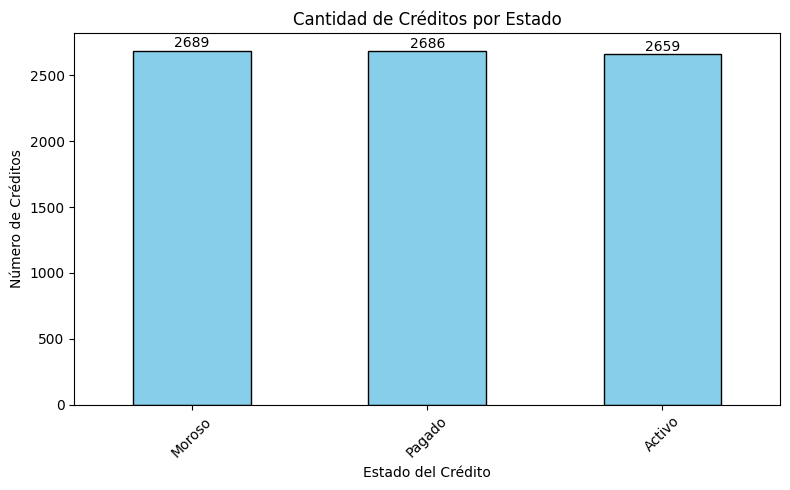

In [14]:
#credito por estado: # Contar cuántos créditos hay por estado
# Contar cuántos créditos hay por estado
creditos_por_estado = df_creditos['estado'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = creditos_por_estado.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir etiquetas numéricas sobre cada barra
for i, valor in enumerate(creditos_por_estado):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

# Añadir etiquetas y título
plt.title('Cantidad de Créditos por Estado')
plt.xlabel('Estado del Crédito')
plt.ylabel('Número de Créditos')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

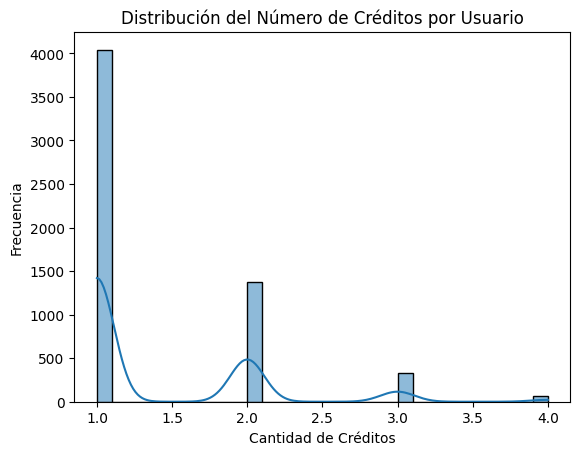

In [15]:
# Obtener todos los créditos
consulta_creditos = "SELECT * FROM creditos"
df_creditos = pd.read_sql(consulta_creditos, conn)

# Créditos por usuario
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')

# Distribución de créditos
sns.histplot(creditos_por_usuario['cantidad_creditos'], bins=30, kde=True)
plt.title("Distribución del Número de Créditos por Usuario")
plt.xlabel("Cantidad de Créditos")
plt.ylabel("Frecuencia")
plt.show()


In [16]:
# Estadísticas descriptivas básicas
estadisticas = creditos_por_usuario['cantidad_creditos'].describe()

# Cálculos adicionales si se desea
percentil_90 = creditos_por_usuario['cantidad_creditos'].quantile(0.9)
percentil_95 = creditos_por_usuario['cantidad_creditos'].quantile(0.95)
percentil_99 = creditos_por_usuario['cantidad_creditos'].quantile(0.99)

# Mostrar
print("Resumen estadístico de la cantidad de créditos por usuario:")
print(estadisticas)
print(f"\nPercentil 90: {percentil_90}")
print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")


Resumen estadístico de la cantidad de créditos por usuario:
count    5812.000000
mean        1.382312
std         0.642726
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: cantidad_creditos, dtype: float64

Percentil 90: 2.0
Percentil 95: 3.0
Percentil 99: 4.0


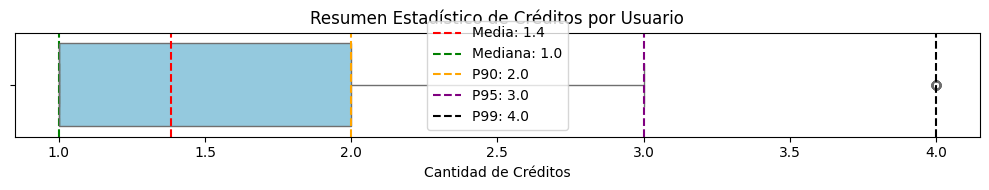

In [17]:
# Gráfico de caja (boxplot)
plt.figure(figsize=(10, 2))
sns.boxplot(x=creditos_por_usuario['cantidad_creditos'], color='skyblue')

# Cálculo de estadísticas clave
media = creditos_por_usuario['cantidad_creditos'].mean()
mediana = creditos_por_usuario['cantidad_creditos'].median()
p90 = creditos_por_usuario['cantidad_creditos'].quantile(0.90)
p95 = creditos_por_usuario['cantidad_creditos'].quantile(0.95)
p99 = creditos_por_usuario['cantidad_creditos'].quantile(0.99)

# Anotaciones en el gráfico
for valor, etiqueta, color in zip([media, mediana, p90, p95, p99],
                                  ['Media', 'Mediana', 'P90', 'P95', 'P99'],
                                  ['red', 'green', 'orange', 'purple', 'black']):
    plt.axvline(valor, color=color, linestyle='--', label=f'{etiqueta}: {valor:.1f}')

plt.title("Resumen Estadístico de Créditos por Usuario")
plt.xlabel("Cantidad de Créditos")
plt.legend()
plt.tight_layout()
plt.show()

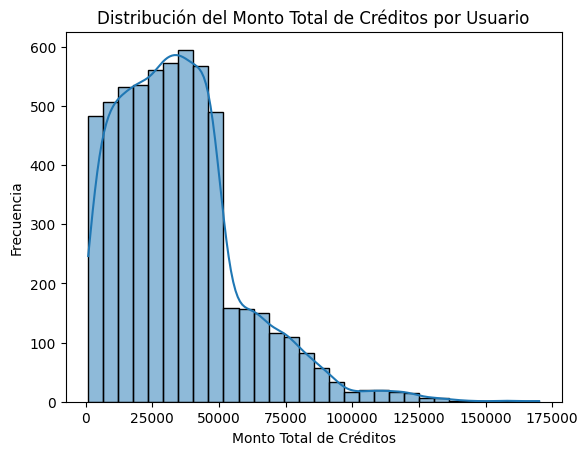

In [18]:
# Total del monto de créditos por usuario
monto_creditos = df_creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos')

# Histograma con KDE
sns.histplot(monto_creditos['monto_total_creditos'], bins=30, kde=True)
plt.title("Distribución del Monto Total de Créditos por Usuario")
plt.xlabel("Monto Total de Créditos")
plt.ylabel("Frecuencia")
plt.show()



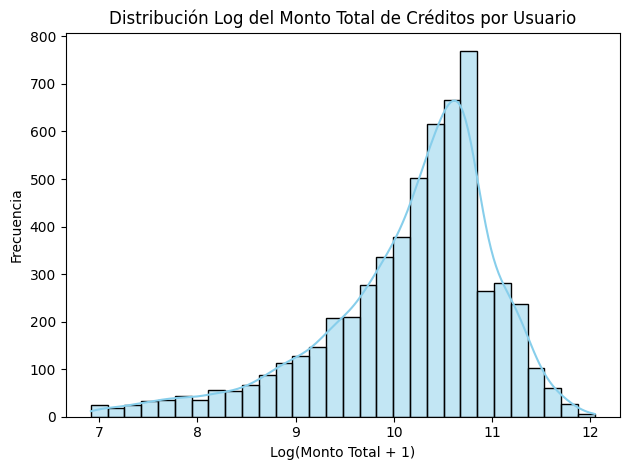

In [19]:
import numpy as np
# Histograma con escala logarítmica
sns.histplot(np.log1p(monto_creditos['monto_total_creditos']), bins=30, kde=True, color='skyblue')

plt.title("Distribución Log del Monto Total de Créditos por Usuario")
plt.xlabel("Log(Monto Total + 1)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

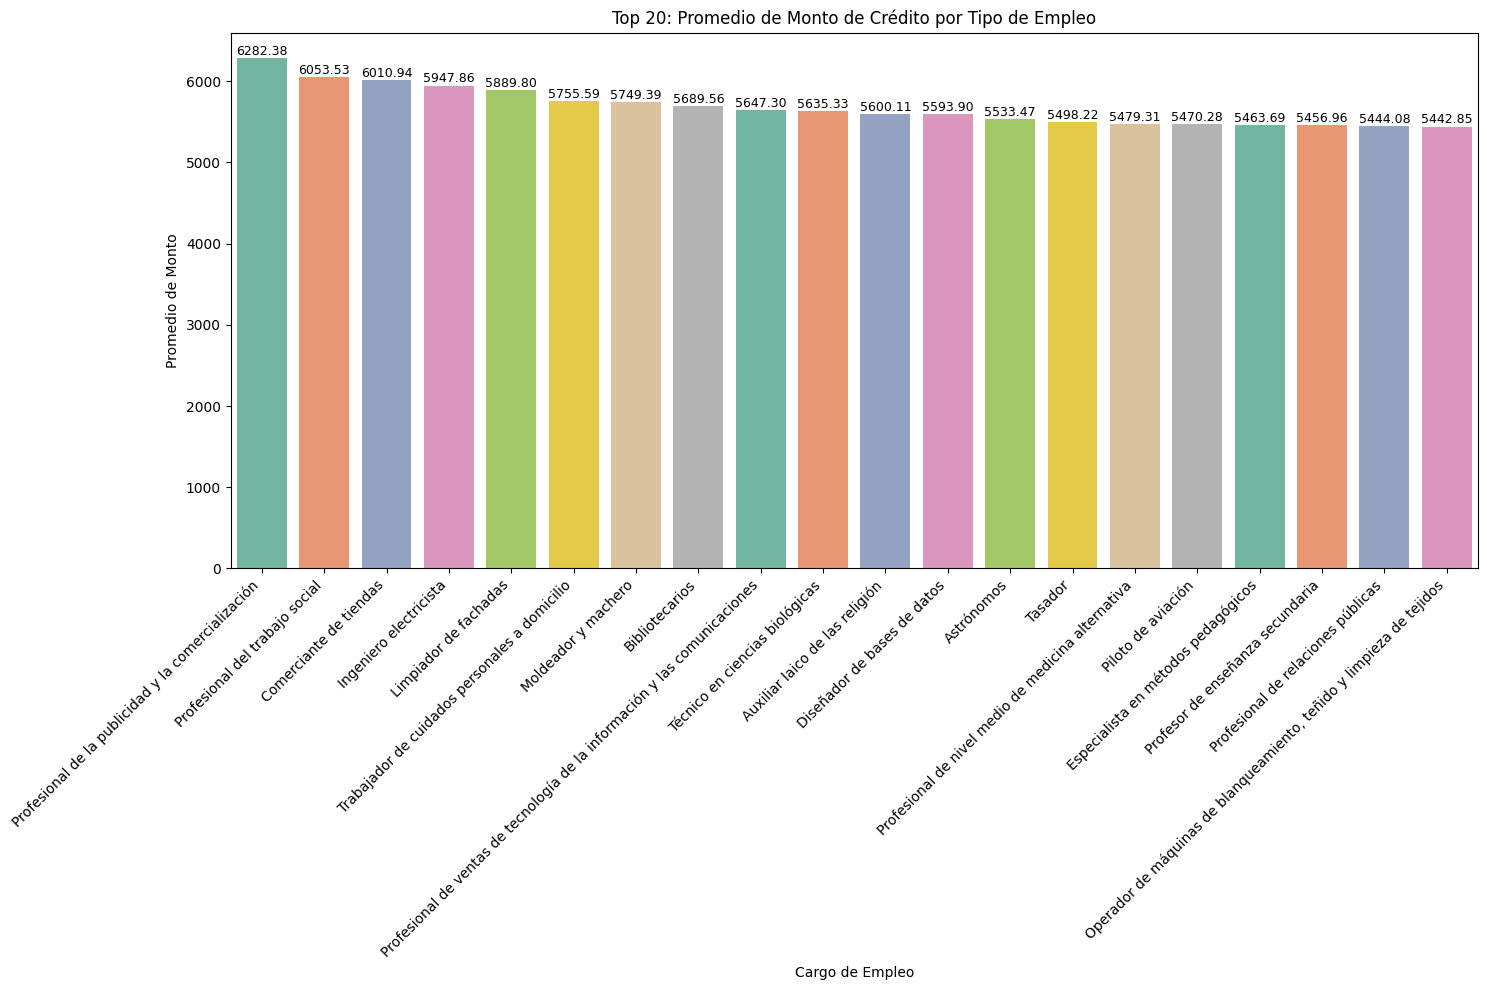

In [20]:
# Merge entre los dataframes
creditos_empleo = df_creditos.merge(df_usuarios, on='id')

# Promedio del monto de crédito por tipo de empleo
promedio_credito = creditos_empleo.groupby('profesion')['salario'].mean().reset_index()

# Ordenar por promedio de salario descendente y seleccionar top 20
top_20_profesiones = promedio_credito.sort_values(by='salario', ascending=False).head(20)

# Gráfico de barras con top 20
plt.figure(figsize=(15, 10))
barplot = sns.barplot(data=top_20_profesiones, x='profesion', y='salario', palette='Set2')

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.title("Top 20: Promedio de Monto de Crédito por Tipo de Empleo")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Promedio de Monto")
plt.xlabel("Cargo de Empleo")
plt.tight_layout()
plt.show()

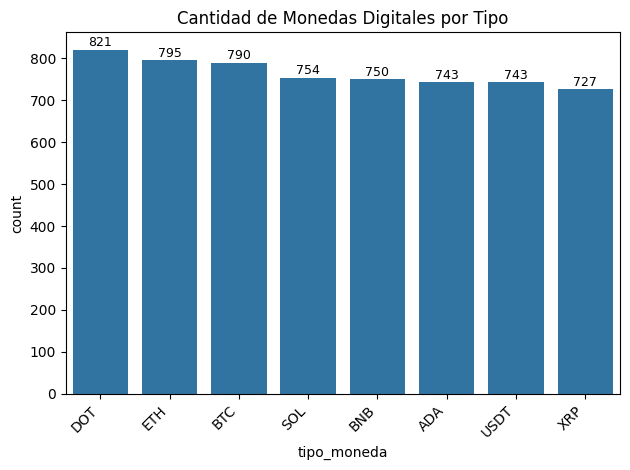

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

barplot = sns.countplot(
    data=df_monedas, 
    x='tipo_moneda', 
    order=df_monedas['tipo_moneda'].value_counts().index
)

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.5, 
        f'{int(height)}',  # aquí sin decimales porque es un conteo
        ha='center', 
        va='bottom', 
        fontsize=9
    )

plt.title("Cantidad de Monedas Digitales por Tipo")
plt.xticks(rotation=45, ha='right')  # para que las etiquetas estén bien alineadas
plt.tight_layout()  # para que no se corten las etiquetas
plt.show()

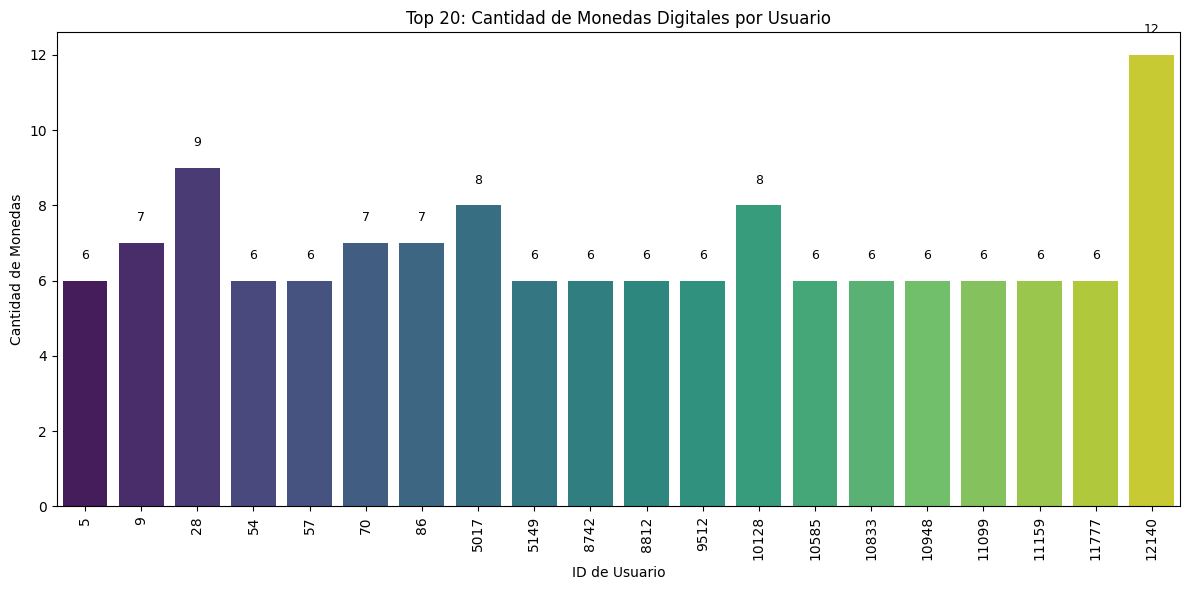

In [22]:
#monedas digitales por usuario
# Contar monedas por usuario
monedas_por_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='cantidad_monedas')

# Ordenar y seleccionar top 20
top_20_monedas = monedas_por_usuario.sort_values(by='cantidad_monedas', ascending=False).head(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_20_monedas, x='usuario_id', y='cantidad_monedas', palette='viridis')

# Añadir etiquetas numéricas encima de cada barra
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title("Top 20: Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [23]:
#cantidad media de los creditos

# Asegúrate que las columnas estén en formato datetime
df_creditos['fecha_inicio'] = pd.to_datetime(df_creditos['fecha_inicio'])
df_creditos['fecha_fin'] = pd.to_datetime(df_creditos['fecha_fin'])

# Calcular duración en días
df_creditos['duracion_dias'] = (df_creditos['fecha_fin'] - df_creditos['fecha_inicio']).dt.days

# Calcular duración media
duracion_media = df_creditos['duracion_dias'].mean()

print(f"La duración media de los créditos es de {duracion_media:.2f} días.")


La duración media de los créditos es de 754.64 días.


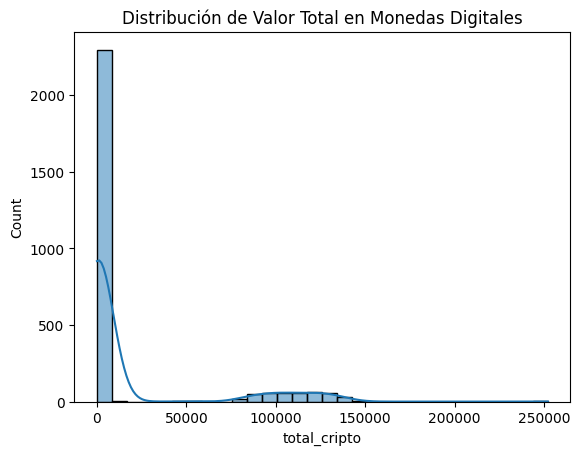

In [24]:
#valor total de criptoactivos por usuario
valor_cripto = df_monedas.groupby('usuario_id')['valor_actual'].sum().reset_index(name='total_cripto')

sns.histplot(valor_cripto['total_cripto'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Monedas Digitales")
plt.show()


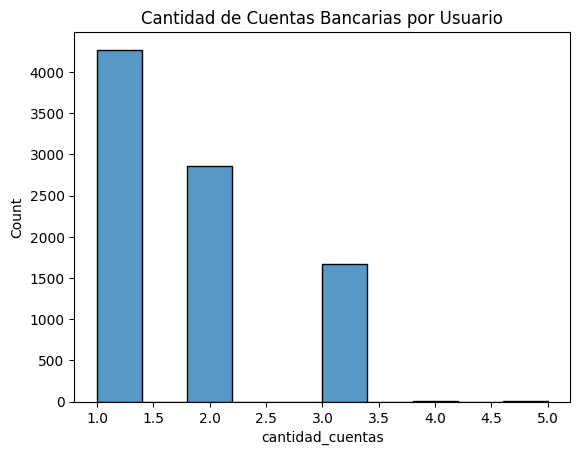

In [25]:
#Cuentas Bancarias por Usuario

cuentas_por_usuario = df_cuentas.groupby('usuario_id').size().reset_index(name='cantidad_cuentas')

sns.histplot(cuentas_por_usuario['cantidad_cuentas'], bins=10)
plt.title("Cantidad de Cuentas Bancarias por Usuario")
plt.show()

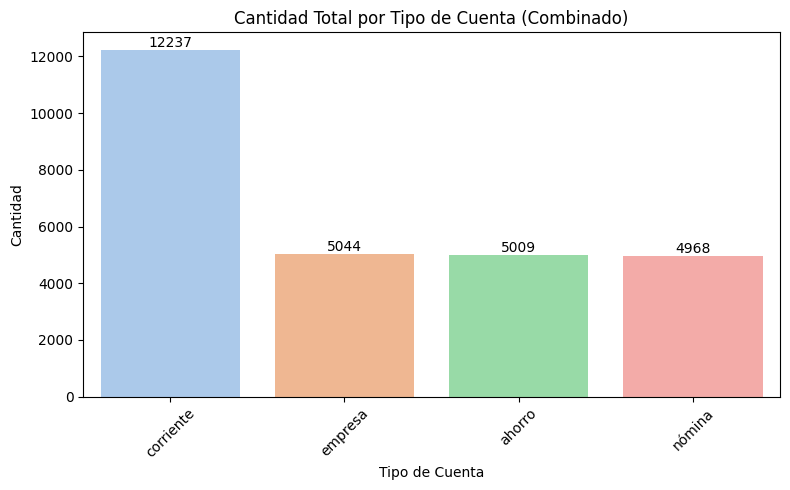

In [26]:
# Extraer solo las columnas necesarias
cuentas_cuenta = df_cuentas[['usuario_id', 'tipo_cuenta']].copy()
cuentas_usuario = df_usuarios[['id', 'tipo_cuenta']].copy()

# Añadir una columna para saber origen si quieres (opcional)
cuentas_cuenta['origen'] = 'cuentas'
cuentas_usuario['origen'] = 'usuarios'

# Concatenar filas de ambos DataFrames
df_tipos_cuenta = pd.concat([cuentas_cuenta, cuentas_usuario], ignore_index=True)

# Ahora contamos todos los tipos de cuenta juntos
cantidad_cuentas = df_tipos_cuenta['tipo_cuenta'].value_counts().reset_index()
cantidad_cuentas.columns = ['tipo_cuenta', 'cantidad']

# Gráfico con etiquetas
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=cantidad_cuentas, x='tipo_cuenta', y='cantidad', palette='pastel')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.3, 
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.title('Cantidad Total por Tipo de Cuenta (Combinado)')
plt.xlabel('Tipo de Cuenta')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print(f"Filas en df_activos: {len(df_activos)}")
print(df_activos.head())


Filas en df_activos: 4153
   id  usuario_id  tipo_activo          descripcion      monto
0   1           7       ahorro  Activos financieros   74284.27
1   2           8       ahorro  Activos financieros   14384.02
2   3           7  inversiones  Activos financieros  222459.66
3   4           3       ahorro  Activos financieros   59254.00
4   5           5       ahorro  Activos financieros    9822.68


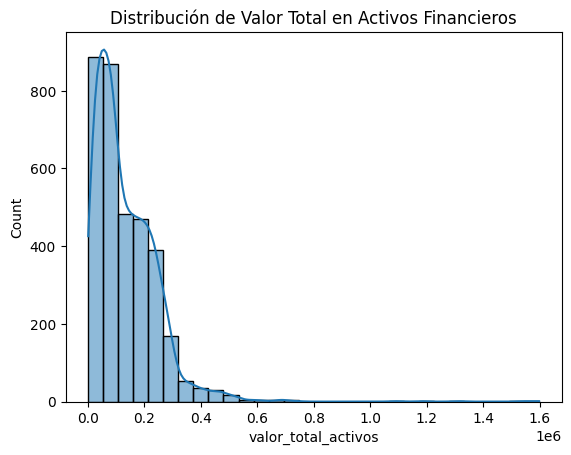

In [28]:
#Activos Financieros por Usuario

activos_por_usuario = df_activos.groupby('usuario_id')['monto'].sum().reset_index(name='valor_total_activos')

sns.histplot(activos_por_usuario['valor_total_activos'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Activos Financieros")
plt.show()

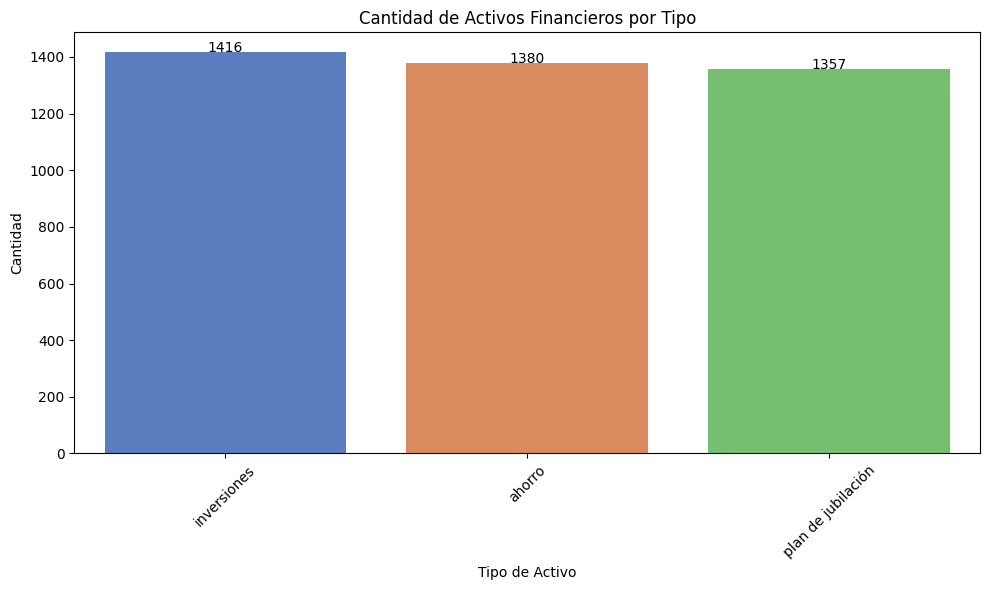

In [29]:
#activos financieros
# Contar cantidad de activos por tipo
activos_por_tipo = df_activos['tipo_activo'].value_counts().reset_index()
activos_por_tipo.columns = ['tipo_activo', 'cantidad']

# Gráfico de barras
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=activos_por_tipo, x='tipo_activo', y='cantidad', palette='muted')

# Etiquetas encima de barras
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + 0.3, f'{int(height)}', ha='center')

plt.title('Cantidad de Activos Financieros por Tipo')
plt.xlabel('Tipo de Activo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

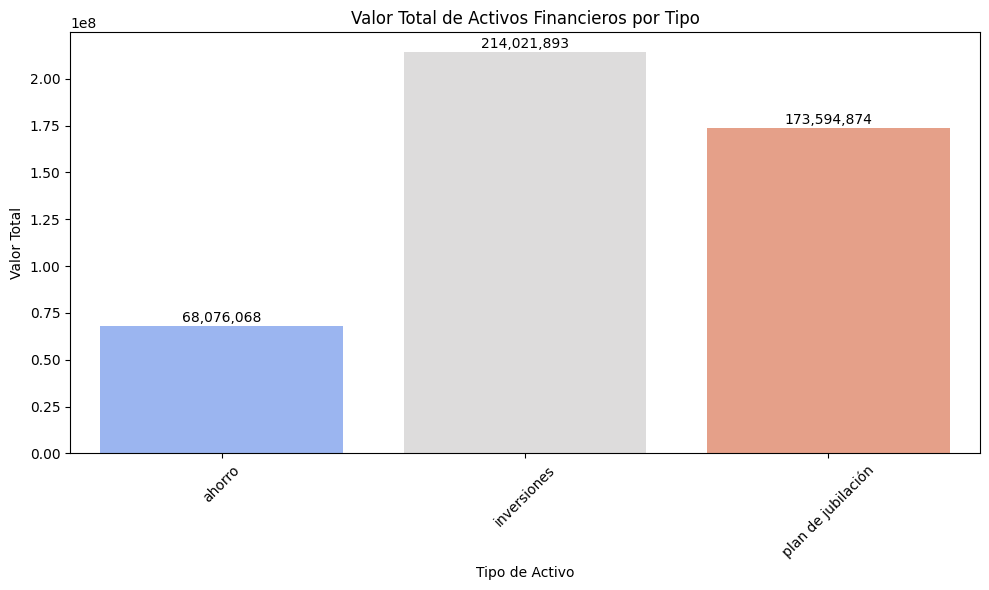

In [30]:
# Sumar valor por tipo de activo
valor_por_tipo = df_activos.groupby('tipo_activo')['monto'].sum().reset_index()

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=valor_por_tipo, x='tipo_activo', y='monto', palette='coolwarm')

# Etiquetas con valores encima
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2., height + max(valor_por_tipo['monto'])*0.01, f'{height:,.0f}', ha='center')

plt.title('Valor Total de Activos Financieros por Tipo')
plt.xlabel('Tipo de Activo')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


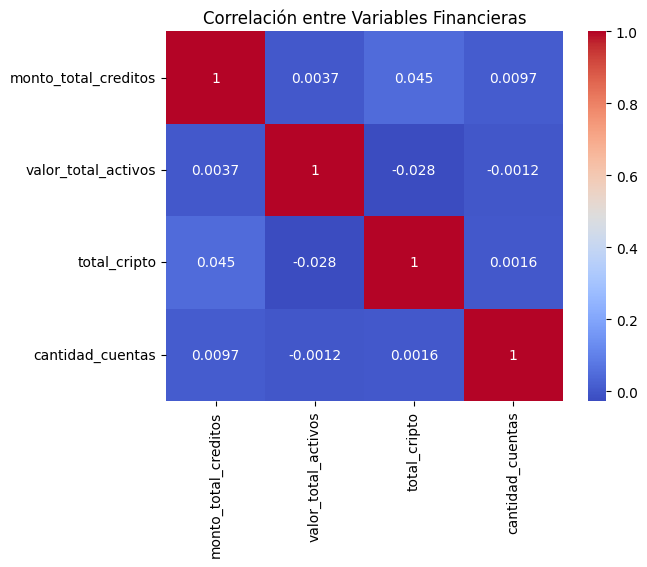

In [31]:
#correlacion financiera
df_usuarios.rename(columns={'id': 'usuario_id'}, inplace=True)

df_merged = (
    df_usuarios
    .merge(df_creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos'), on='usuario_id', how='left')
    .merge(activos_por_usuario, on='usuario_id', how='left')
    .merge(valor_cripto, on='usuario_id', how='left')
    .merge(cuentas_por_usuario, on='usuario_id', how='left')
)

sns.heatmap(
    df_merged[['monto_total_creditos', 'valor_total_activos', 'total_cripto', 'cantidad_cuentas']]
    .corr(numeric_only=True),
    annot=True, cmap='coolwarm'
)
plt.title("Correlación entre Variables Financieras")
plt.show()


In [32]:
# 1. Renombrar columnas para evitar confusión (ya que ambos tienen 'monto')
df_activos = df_activos.rename(columns={'monto': 'monto_activo'})
df_creditos = df_creditos.rename(columns={'monto': 'monto_total_creditos'})

# 2. Agrupar los activos por usuario y sumar el monto
df_activos_agrupado = df_activos.groupby('usuario_id', as_index=False)['monto_activo'].sum()
df_activos_agrupado = df_activos_agrupado.rename(columns={'monto_activo': 'valor_total_activos'})

# 3. Hacer el merge
df_merged = pd.merge(df_activos_agrupado, df_creditos, on='usuario_id', how='inner')

# 4. Verificar el resultado
print(f"Filas en df_merged: {len(df_merged)}")
print(df_merged[['valor_total_activos', 'monto_total_creditos']].info())
print(df_merged[['valor_total_activos', 'monto_total_creditos']].isna().sum())

# 5. Calcular qué porcentaje del total de activos representa el crédito
df_merged['porcentaje_credito_vs_activos'] = df_merged['monto_total_creditos'] / df_merged['valor_total_activos'] * 100

# 6. Mostrar resultados
print(df_merged.head())



Filas en df_merged: 2278
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor_total_activos   2278 non-null   float64
 1   monto_total_creditos  2278 non-null   float64
dtypes: float64(2)
memory usage: 35.7 KB
None
valor_total_activos     0
monto_total_creditos    0
dtype: int64
   usuario_id  valor_total_activos    id  monto_total_creditos fecha_inicio  \
0           1             33182.02  2878              36505.75   2022-11-17   
1          12           1598151.16  2136              29277.74   2021-04-20   
2          12           1598151.16  2584              21549.03   2022-06-25   
3          12           1598151.16  7705              32145.89   2021-07-15   
4          17             37424.51  6618              21376.89   2023-05-21   

   fecha_fin  estado         tipo  duracion_dias  \
0 2023-11-12  Activo  Hipot

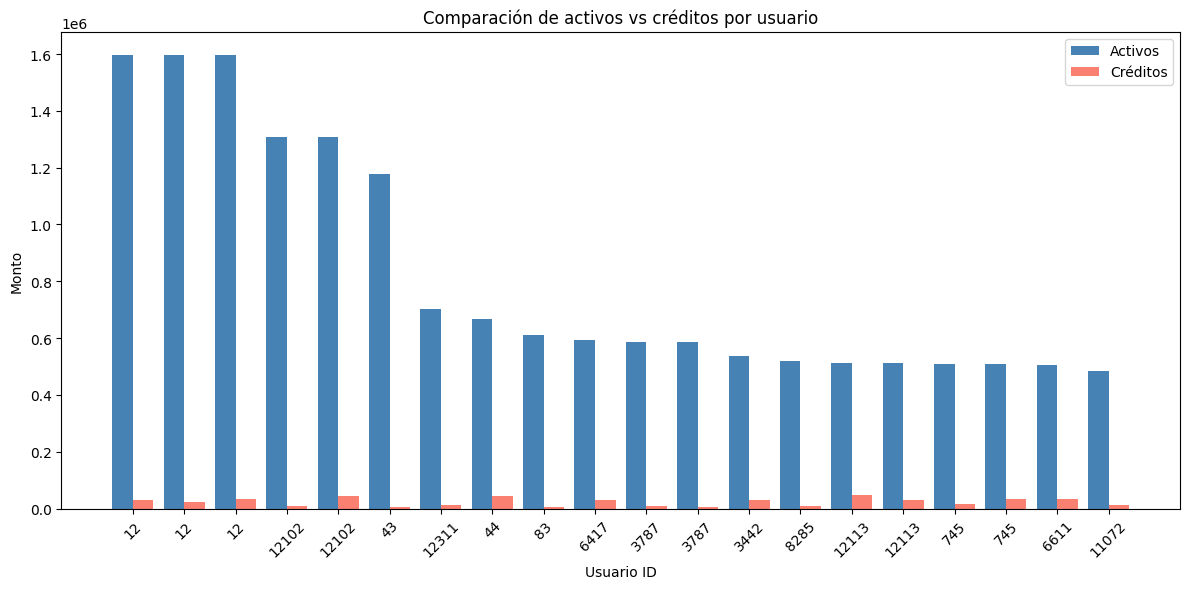

In [33]:
# Seleccionamos una muestra de usuarios para no sobrecargar el gráfico
df_sample = df_merged.sort_values('valor_total_activos', ascending=False).head(20)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(df_sample))

# Barras de activos
plt.bar(x, df_sample['valor_total_activos'], width=bar_width, label='Activos', color='steelblue')

# Barras de créditos (con un pequeño desplazamiento)
plt.bar([i + bar_width for i in x], df_sample['monto_total_creditos'], width=bar_width, label='Créditos', color='salmon')

# Etiquetas
plt.xlabel('Usuario ID')
plt.ylabel('Monto')
plt.title('Comparación de activos vs créditos por usuario')
plt.xticks([i + bar_width / 2 for i in x], df_sample['usuario_id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
print(activos_por_usuario.head())
print(activos_por_usuario.columns)
print(f"Filas en activos_por_usuario: {len(activos_por_usuario)}")
print(f"Valores nulos en usuario_id: {activos_por_usuario['usuario_id'].isna().sum()}")
print(f"Valores nulos en valor_total_activos: {activos_por_usuario['valor_total_activos'].isna().sum()}")


   usuario_id  valor_total_activos
0           1             33182.02
1           3            270355.43
2           4             54691.89
3           5             79787.55
4           6            287698.76
Index(['usuario_id', 'valor_total_activos'], dtype='object')
Filas en activos_por_usuario: 3419
Valores nulos en usuario_id: 0
Valores nulos en valor_total_activos: 0


In [35]:
print(df_usuarios.columns)
print(df_creditos.columns)
print(activos_por_usuario.columns)


Index(['usuario_id', 'nombre', 'apellido', 'estado_civil', 'dni',
       'nacionalidad', 'fecha_nacimiento', 'direccion', 'codigo_postal',
       'provincia', 'telefono', 'email', 'es_moroso', 'profesion', 'salario',
       'numero_cuenta', 'tipo_cuenta', 'saldo', 'antiguedad_cliente',
       'genero'],
      dtype='object')
Index(['id', 'usuario_id', 'monto_total_creditos', 'fecha_inicio', 'fecha_fin',
       'estado', 'tipo', 'duracion_dias'],
      dtype='object')
Index(['usuario_id', 'valor_total_activos'], dtype='object')


In [36]:
# Usuarios únicos en cada DataFrame
usuarios_usuarios = set(df_usuarios['usuario_id'])
usuarios_activos = set(activos_por_usuario['usuario_id'])

print(f"Usuarios en df_usuarios: {len(usuarios_usuarios)}")
print(f"Usuarios en activos_por_usuario: {len(usuarios_activos)}")

# Usuarios comunes
usuarios_comunes = usuarios_usuarios.intersection(usuarios_activos)
print(f"Usuarios comunes en ambos: {len(usuarios_comunes)}")


Usuarios en df_usuarios: 12237
Usuarios en activos_por_usuario: 3419
Usuarios comunes en ambos: 3419


In [37]:
df_merged['valor_total_activos'] = df_merged['valor_total_activos'].fillna(0)


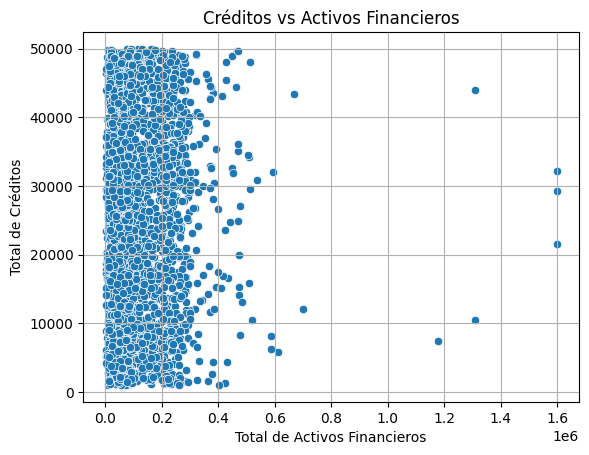

In [38]:
#Relación Créditos vs Activos

sns.scatterplot(data=df_merged, x='valor_total_activos', y='monto_total_creditos')
plt.title("Créditos vs Activos Financieros")
plt.xlabel("Total de Activos Financieros")
plt.ylabel("Total de Créditos")
plt.grid(True)
plt.show()

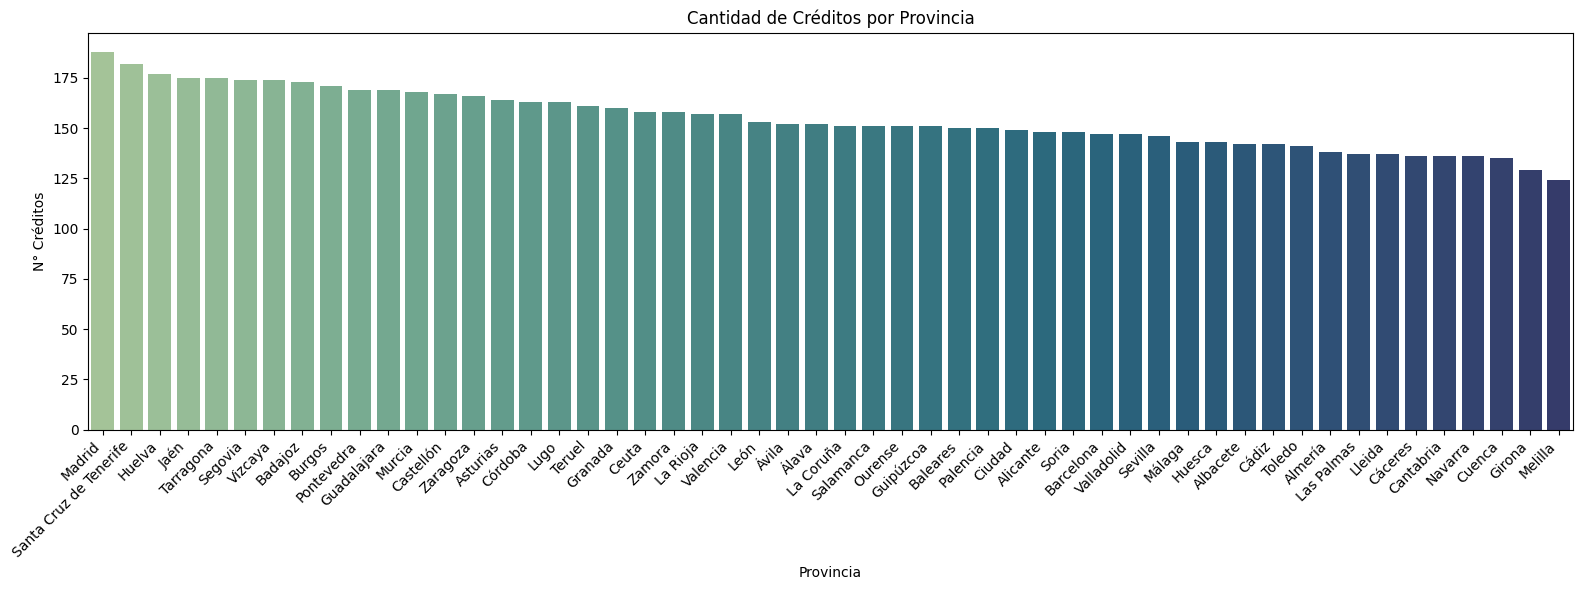

In [39]:
# Créditos por Provincia
creditos = pd.read_sql("SELECT * FROM creditos", conn)

plt.figure(figsize=(16, 6))

# Merge créditos con usuarios para obtener provincia
creditos_provincia = creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id')

# Contar créditos por provincia
creditos_provincia = creditos_provincia.groupby('provincia').size().reset_index(name='cantidad_creditos')

# Graficar cantidad de créditos por provincia
sns.barplot(data=creditos_provincia.sort_values('cantidad_creditos', ascending=False), 
            x='provincia', y='cantidad_creditos', palette='crest')

plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment
plt.title("Cantidad de Créditos por Provincia")
plt.ylabel("N° Créditos")
plt.xlabel("Provincia")
plt.tight_layout()
plt.show()


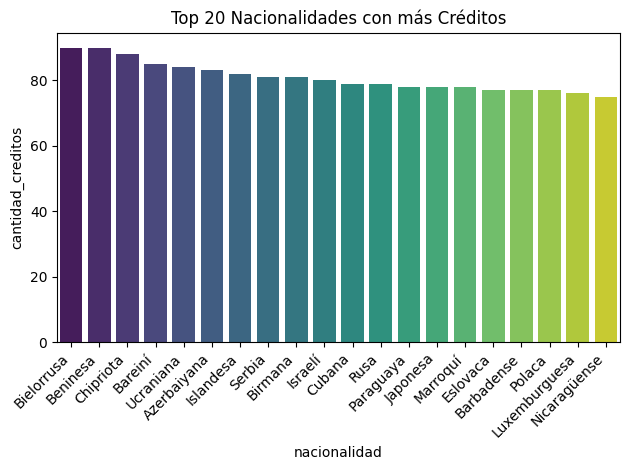

In [40]:
#Créditos por Nacionalidad

creditos_nacionalidad = creditos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id')
creditos_nacionalidad = creditos_nacionalidad.groupby('nacionalidad').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_nacionalidad.sort_values('cantidad_creditos', ascending=False).head(20),
            x='nacionalidad', y='cantidad_creditos', palette='viridis')
plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment
plt.title("Top 20 Nacionalidades con más Créditos")
plt.tight_layout()
plt.show()

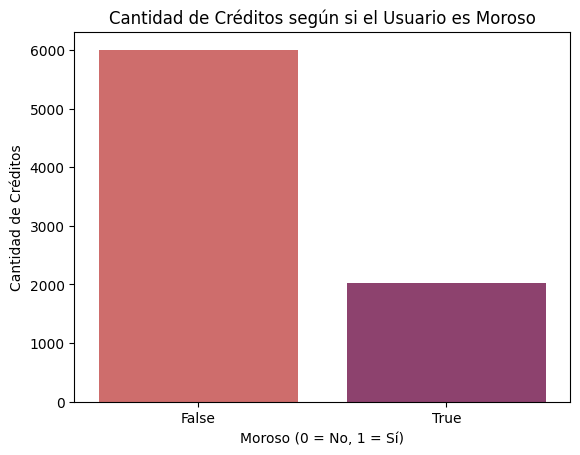

In [41]:
#¿Los morosos tienen más créditos?

usuarios_mora = df_usuarios[['usuario_id', 'es_moroso']]
creditos_mora = creditos.merge(usuarios_mora, on='usuario_id')
creditos_mora = creditos_mora.groupby('es_moroso').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_mora, x='es_moroso', y='cantidad_creditos', palette='flare')
plt.title("Cantidad de Créditos según si el Usuario es Moroso")
plt.xlabel("Moroso (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Créditos")
plt.show()

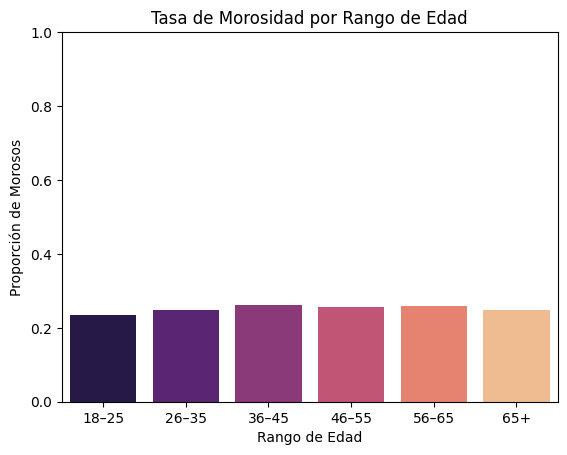

In [42]:
#Morosidad según Edad
# Asegurar que fecha_nacimiento sea datetime
df_usuarios['fecha_nacimiento'] = pd.to_datetime(df_usuarios['fecha_nacimiento'])

# Calcular edad en años (entera)
hoy = pd.to_datetime('today')
df_usuarios['edad'] = (hoy - df_usuarios['fecha_nacimiento']).dt.days // 365

# Ahora sí, el resto de tu código
usuarios_mora_edad = df_usuarios[['usuario_id', 'edad', 'es_moroso']]

# Crear rangos de edad
usuarios_mora_edad['rango_edad'] = pd.cut(
    usuarios_mora_edad['edad'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
)

# Calcular tasa de morosidad por rango de edad
mora_por_edad = usuarios_mora_edad.groupby('rango_edad')['es_moroso'].mean().reset_index()

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=mora_por_edad, x='rango_edad', y='es_moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Rango de Edad")
plt.ylim(0, 1)
plt.show()

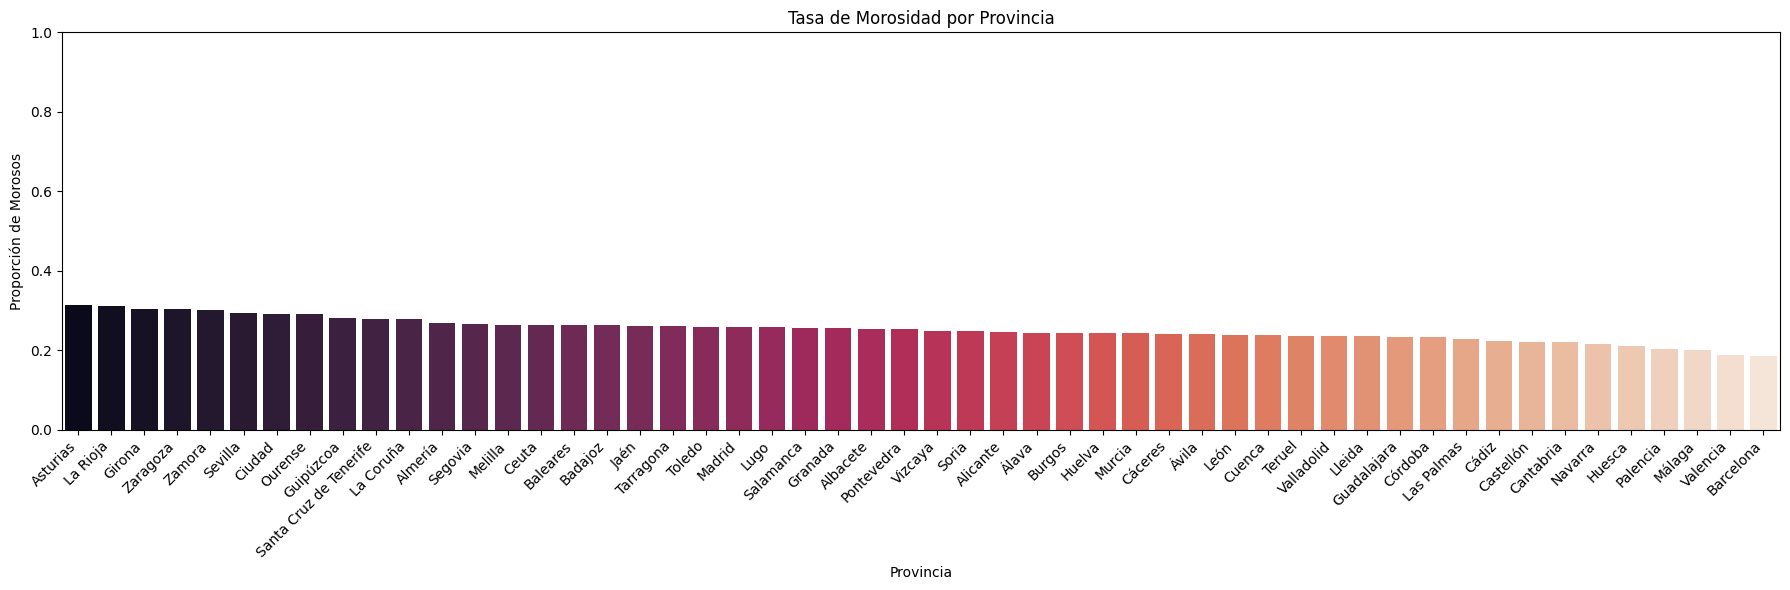

In [43]:
#Morosidad según Provincia

mora_provincia = df_usuarios.groupby('provincia')['es_moroso'].mean().reset_index()

plt.figure(figsize=(18, 6))  # Más ancho para que entren las etiquetas

sns.barplot(data=mora_provincia.sort_values('es_moroso', ascending=False), 
            x='provincia', y='es_moroso', palette='rocket')
plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment

plt.title("Tasa de Morosidad por Provincia")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Provincia")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

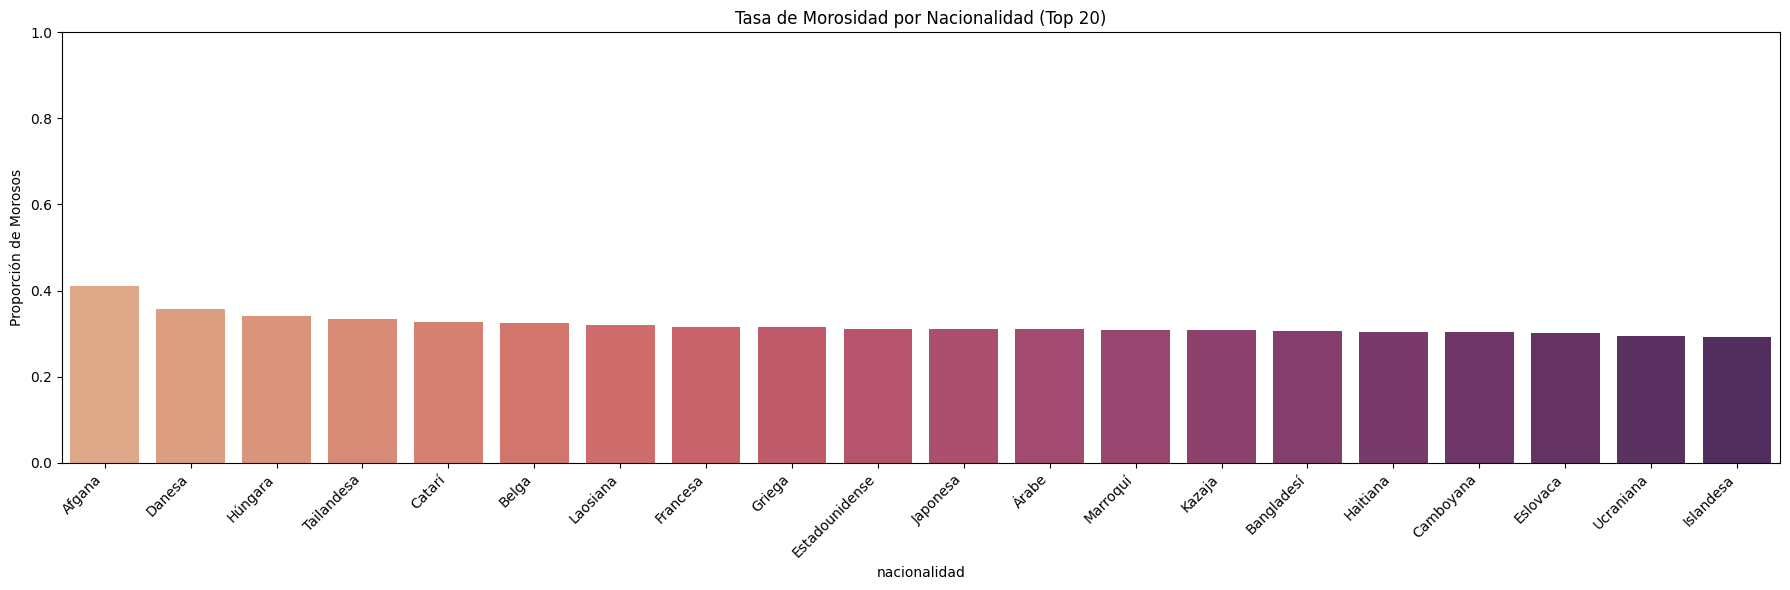

In [44]:
#Morosidad según Nacionalidad

mora_nacionalidad = df_usuarios.groupby('nacionalidad')['es_moroso'].mean().reset_index()

plt.figure(figsize=(18, 6))  # Más ancho para que entren las etiquetas

# Top 10 nacionalidades con más morosidad
top_nacionalidad = mora_nacionalidad.sort_values('es_moroso', ascending=False).head(20)

sns.barplot(data=top_nacionalidad, x='nacionalidad', y='es_moroso', palette='flare')
plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment

plt.title("Tasa de Morosidad por Nacionalidad (Top 20)")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

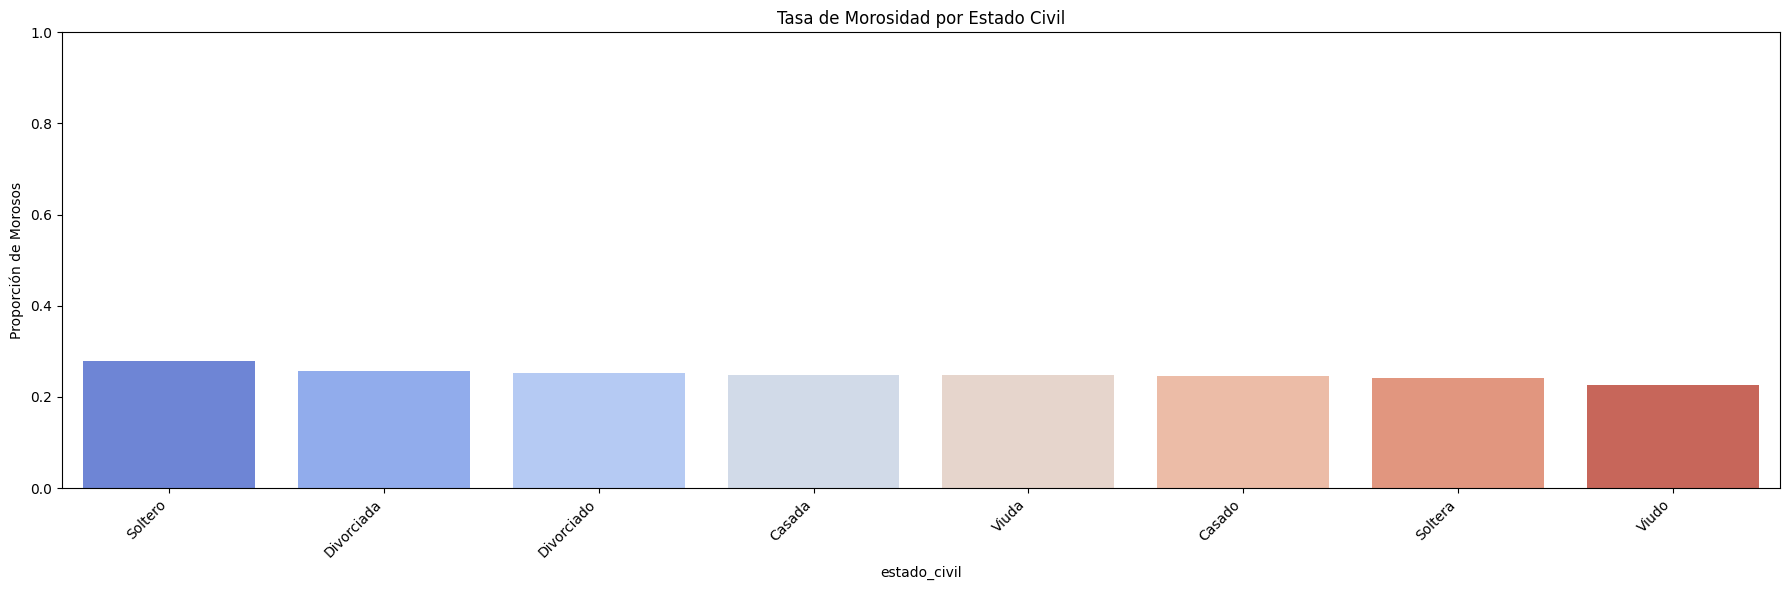

In [45]:
#Morosidad según Estado Civil

mora_estado_civil = df_usuarios.groupby('estado_civil')['es_moroso'].mean().reset_index()

plt.figure(figsize=(18, 6))  # Más ancho para que entren las etiquetas

sns.barplot(data=mora_estado_civil.sort_values('es_moroso', ascending=False),
            x='estado_civil', y='es_moroso', palette='coolwarm')
plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment

plt.title("Tasa de Morosidad por Estado Civil")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

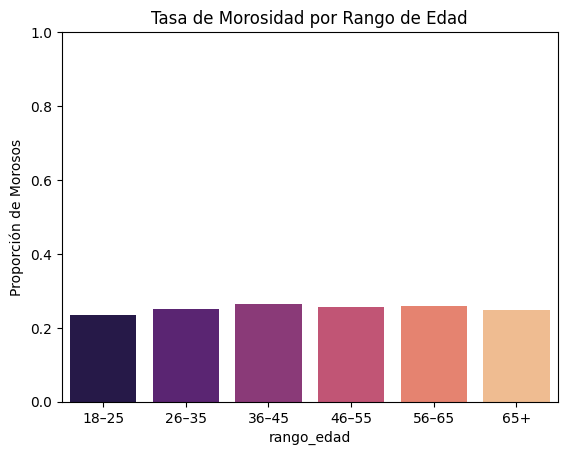

In [46]:
#Morosidad según Edad

df_usuarios['rango_edad'] = pd.cut(
    df_usuarios['edad'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
)

mora_edad = df_usuarios.groupby('rango_edad')['es_moroso'].mean().reset_index()

sns.barplot(data=mora_edad, x='rango_edad', y='es_moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.show()

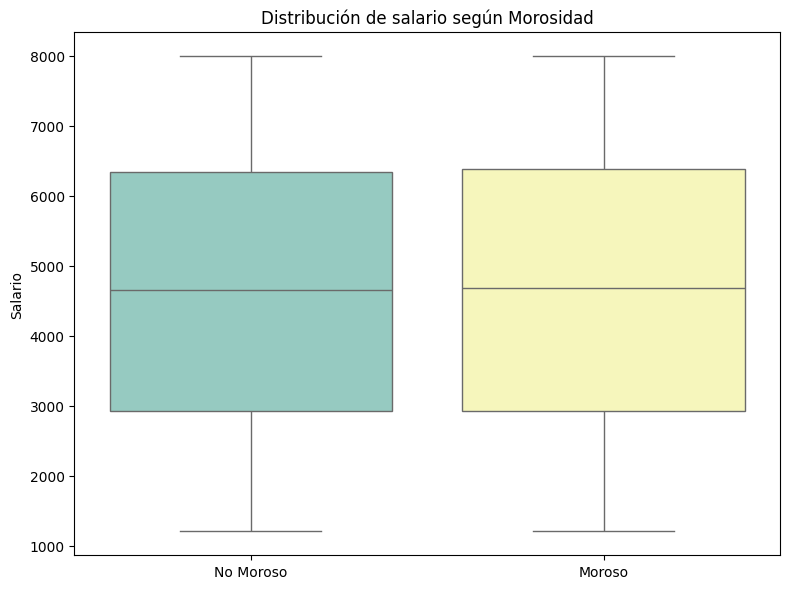

In [47]:
#Morosidad según salario
# Limpiamos datos con salario o morosidad nulos
df_usuarios_clean = df_usuarios.dropna(subset=['salario', 'es_moroso'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_usuarios_clean, x='es_moroso', y='salario', palette='Set3')

plt.title("Distribución de salario según Morosidad")
plt.xlabel("")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("Salario")
plt.tight_layout()
plt.show()

In [48]:
#!pip install nbformat --upgrade


In [49]:
#Morosidad por Tipo de Empleo

import plotly.express as px

# Limpiamos datos nulos en profesion y es_moroso
df_usuarios_clean = df_usuarios.dropna(subset=['profesion', 'es_moroso'])

# Calculamos tasa de morosidad promedio y tamaño (cantidad) por profesion
mora_empleo = df_usuarios_clean.groupby('profesion').agg(
    tasa_morosidad=('es_moroso', 'mean'),
    cantidad_usuarios=('profesion', 'size')
).reset_index()

# Gráfico burbuja interactivo
fig = px.scatter(
    mora_empleo.sort_values('tasa_morosidad', ascending=False),
    x='profesion',
    y='tasa_morosidad',
    size='cantidad_usuarios',
    color='tasa_morosidad',
    color_continuous_scale='Viridis',
    hover_name='profesion',
    hover_data={
        'tasa_morosidad': ':.2f',
        'cantidad_usuarios': True,
        'profesion': False  # ya está en hover_name
    },
    title='Tasa de Morosidad por Tipo de Profesión',
    labels={'tasa_morosidad': 'Tasa de Morosidad', 'profesion': 'Profesión'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_range=[0, 1],
    xaxis={'categoryorder':'total descending'},
    height=600,
    margin=dict(t=60, b=150)
)

fig.show()


In [50]:
# Limpiamos datos nulos en profesion y es_moroso
df_usuarios_clean = df_usuarios.dropna(subset=['profesion', 'es_moroso'])

# Calculamos tasa de morosidad promedio y tamaño (cantidad) por profesion
mora_empleo = df_usuarios_clean.groupby('profesion').agg(
    tasa_morosidad=('es_moroso', 'mean'),
    cantidad_usuarios=('profesion', 'size')
).reset_index()

# Filtrar top 20 profesiones con mayor tasa de morosidad
top20_mora = mora_empleo.sort_values('tasa_morosidad', ascending=False).head(20)

# Gráfico burbuja interactivo para top 20
fig = px.scatter(
    top20_mora,
    x='profesion',
    y='tasa_morosidad',
    size='cantidad_usuarios',
    color='tasa_morosidad',
    color_continuous_scale='Viridis',
    hover_name='profesion',
    hover_data={
        'tasa_morosidad': ':.2f',
        'cantidad_usuarios': True,
        'profesion': False  # ya está en hover_name
    },
    title='Top 20 Tasa de Morosidad por Tipo de Profesión',
    labels={'tasa_morosidad': 'Tasa de Morosidad', 'profesion': 'Profesión'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_range=[0, 1],
    xaxis={'categoryorder':'total descending'},
    height=600,
    margin=dict(t=60, b=150)
)

fig.show()

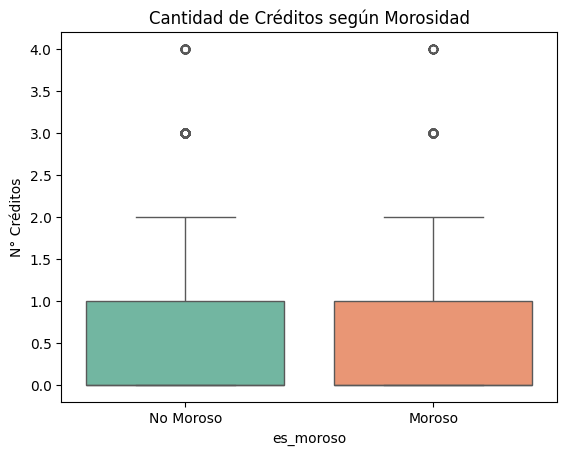

In [51]:
#Créditos y Morosidad combinados

#¿Tienen más créditos los morosos?

creditos_usuario = creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')
usuarios_creditos = df_usuarios.merge(creditos_usuario, on='usuario_id', how='left')
usuarios_creditos['cantidad_creditos'] = usuarios_creditos['cantidad_creditos'].fillna(0)

sns.boxplot(data=usuarios_creditos, x='es_moroso', y='cantidad_creditos', palette='Set2')
plt.title("Cantidad de Créditos según Morosidad")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("N° Créditos")
plt.show()

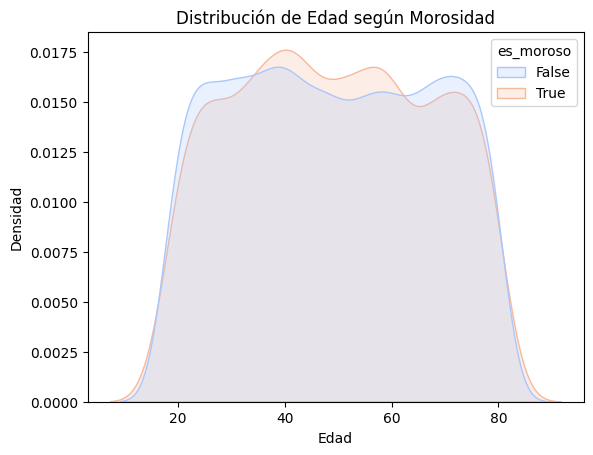

In [52]:
#Distribución de Edad según Morosidad (Densidad)

sns.kdeplot(data=df_usuarios, x='edad', hue='es_moroso', common_norm=False, fill=True, palette='coolwarm')
plt.title("Distribución de Edad según Morosidad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

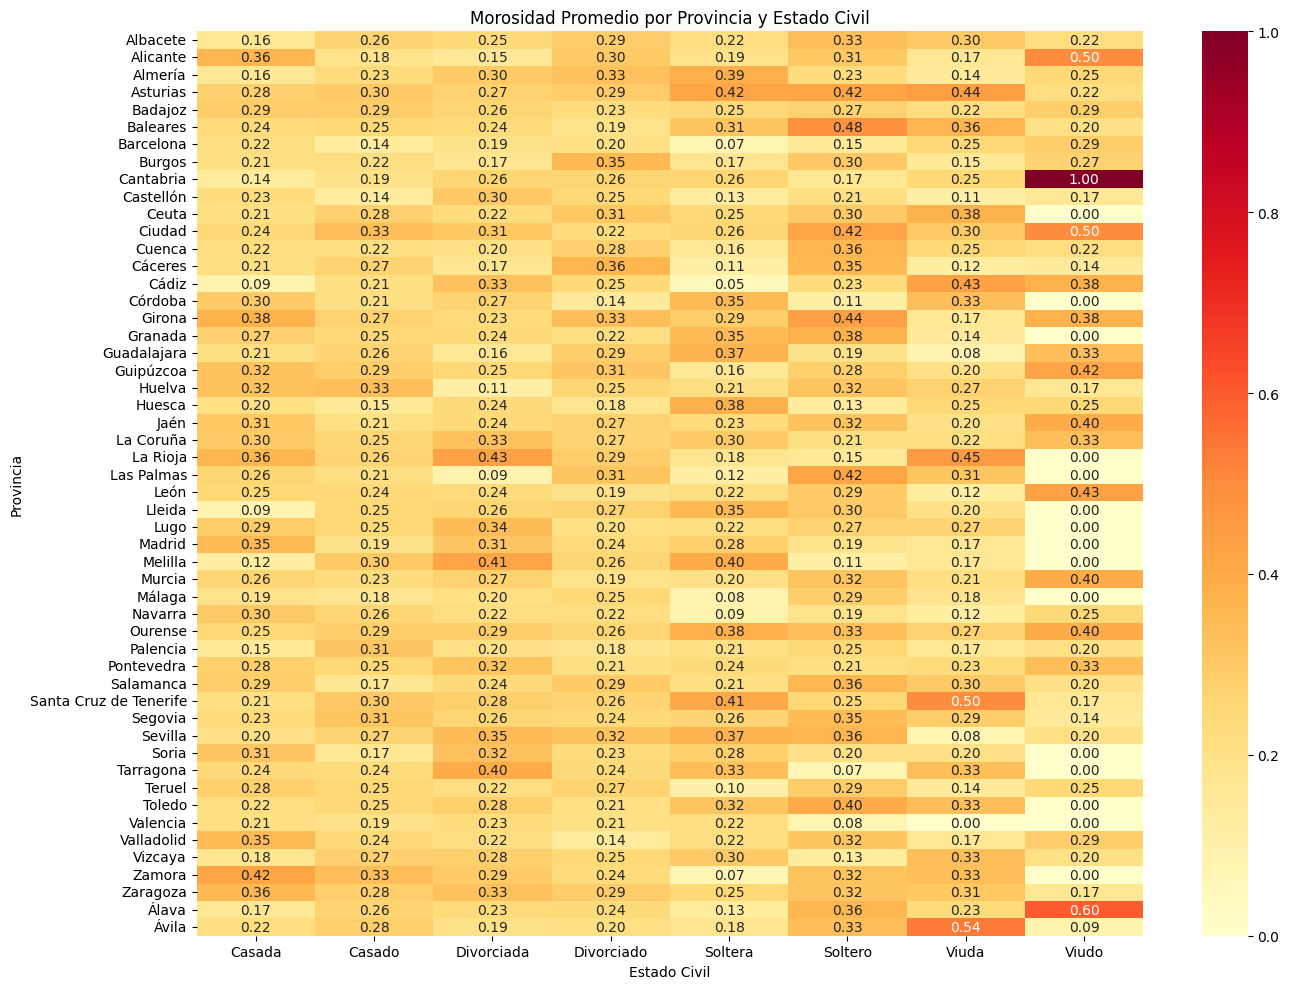

In [53]:
#Heatmap cruzado: Morosidad por Provincia y Estado Civil

pivot = df_usuarios.pivot_table(index='provincia', columns='estado_civil', values='es_moroso', aggfunc='mean')

plt.figure(figsize=(14, 10))  # Ajusta el tamaño aquí (ancho x alto)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("Morosidad Promedio por Provincia y Estado Civil")
plt.ylabel("Provincia")
plt.xlabel("Estado Civil")
plt.tight_layout()
plt.show()

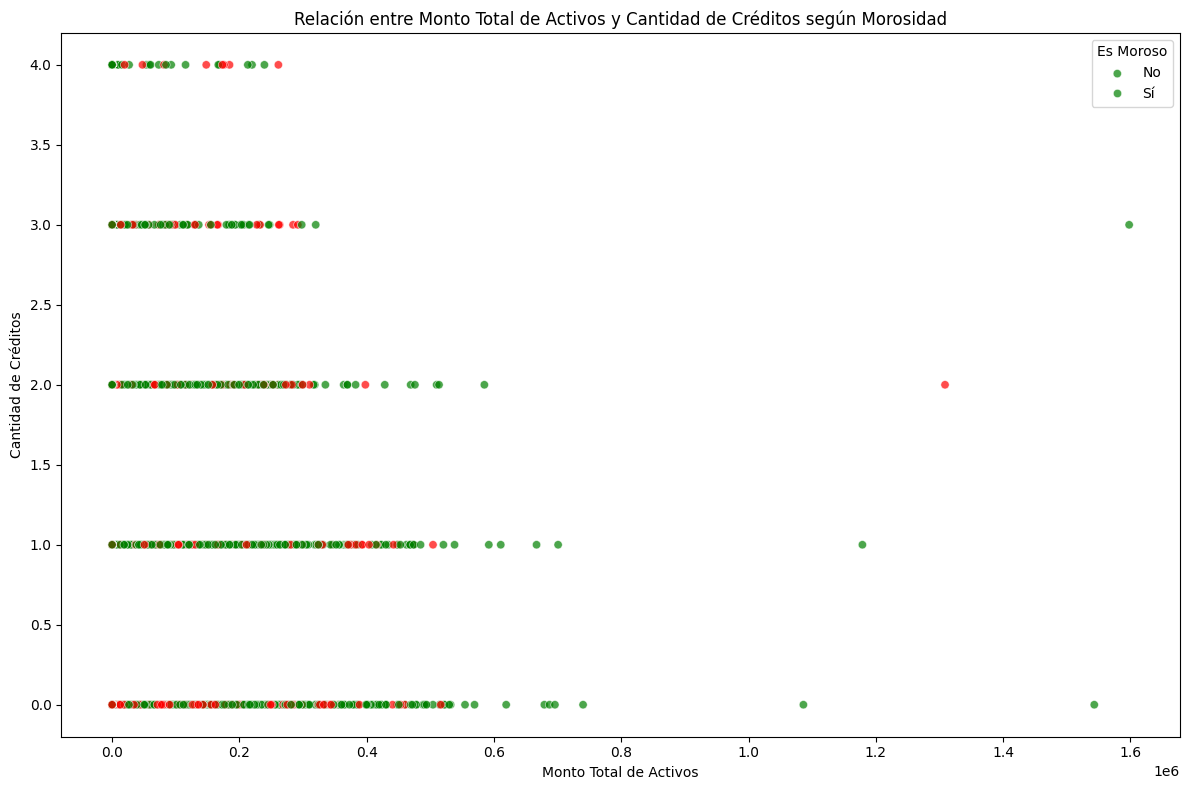

In [54]:
# Preparación de datos combinados

# Sumar monto total de activos por usuario
activos_sum = df_activos.groupby('usuario_id')['monto_activo'].sum().reset_index(name='monto_total_activos')

# Merge usuarios con créditos y activos sumados
df = df_usuarios.copy()

df = df.merge(
    creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos'),
    on='usuario_id', how='left'
)

df = df.merge(activos_sum, on='usuario_id', how='left')

# Reemplazar NaN por 0 donde corresponda
df['cantidad_creditos'] = df['cantidad_creditos'].fillna(0)
df['monto_total_activos'] = df['monto_total_activos'].fillna(0)

# Gráfico: relación entre monto total de activos y cantidad de créditos, coloreado por morosidad
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='monto_total_activos',
    y='cantidad_creditos',
    hue='es_moroso',
    palette={0: 'green', 1: 'red'},
    alpha=0.7
)
plt.title('Relación entre Monto Total de Activos y Cantidad de Créditos según Morosidad')
plt.xlabel('Monto Total de Activos')
plt.ylabel('Cantidad de Créditos')
plt.legend(title='Es Moroso', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()


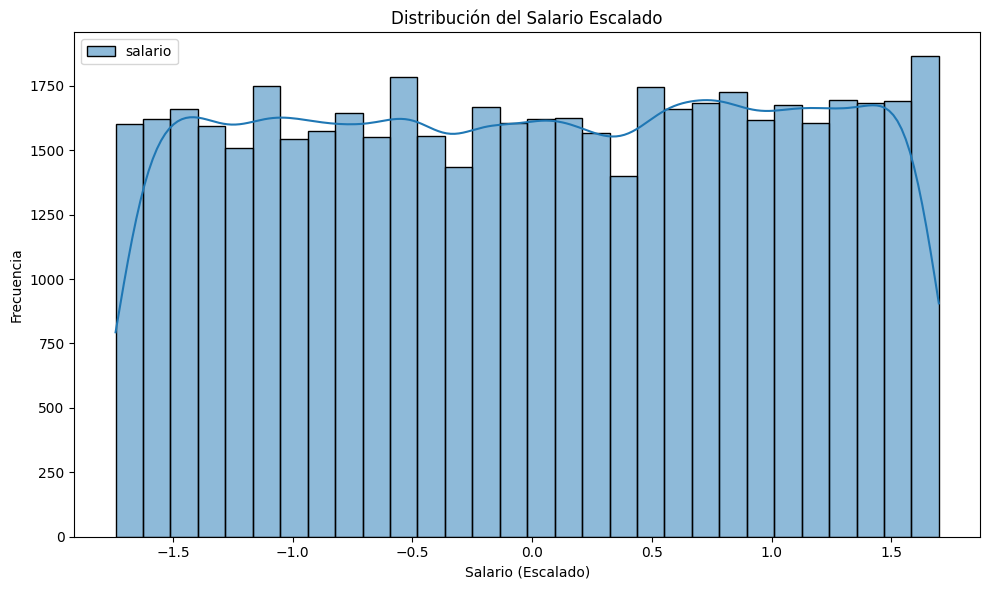

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
# Preprocesamiento

# Variables categóricas a codificar
cat_vars = ['provincia', 'estado_civil', 'profesion', 'nacionalidad']
df[cat_vars] = df[cat_vars].fillna("Desconocido")

# Codificar etiquetas
for col in cat_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Escalamiento
features = ['edad', 'salario', 'provincia', 'estado_civil', 'profesion', 'cantidad_creditos', 'salario']
X_scaled = StandardScaler().fit_transform(df[features])

# Convertir X_scaled a DataFrame para manipulación y visualización
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Gráfico: Histograma del salario escalado
plt.figure(figsize=(10,6))
sns.histplot(df_scaled['salario'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Salario Escalado')
plt.xlabel('Salario (Escalado)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


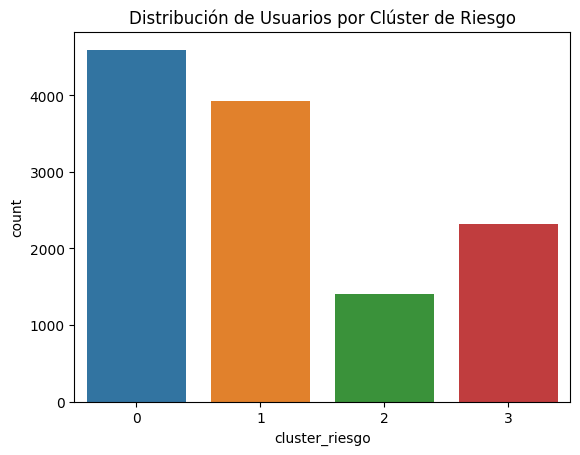

edad      salario  provincia  estado_civil   profesion  \
cluster_riesgo                                                                
0               49.646074  6487.945099  25.147705      2.169458  240.368284   
1               49.187755  2719.766406  24.888265      1.572449  231.490306   
2               49.398716  5248.102061  26.047789      2.457917  231.799572   
3               47.440897  3864.180526  27.128128      4.779120  237.052200   

                cantidad_creditos      salario  
cluster_riesgo                                  
0                        0.373069  6487.945099  
1                        0.494643  2719.766406  
2                        2.322397  5248.102061  
3                        0.484901  3864.180526

In [56]:
#Clustering (por ejemplo, KMeans)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_riesgo'] = kmeans.fit_predict(X_scaled)

sns.countplot(x='cluster_riesgo', data=df, palette='tab10')
plt.title("Distribución de Usuarios por Clúster de Riesgo")
plt.show()

# Perfil de clusters
df.groupby('cluster_riesgo')[features].mean()

creditos_agg columnas: ['usuario_id', 'cantidad_creditos_agg', 'monto_agg']
   usuario_id  cantidad_creditos_agg  monto_agg
0           1                      1   36505.75
1          11                      1   20819.23
2          12                      3   82972.66
3          14                      1   27955.44
4          17                      1   21376.89
df_usuarios columnas tras merge: ['usuario_id', 'nombre', 'apellido', 'estado_civil', 'dni', 'nacionalidad', 'fecha_nacimiento', 'direccion', 'codigo_postal', 'provincia', 'telefono', 'email', 'es_moroso', 'profesion', 'salario', 'numero_cuenta', 'tipo_cuenta', 'saldo', 'antiguedad_cliente', 'genero', 'edad', 'rango_edad', 'cantidad_creditos_agg', 'monto_agg']
   usuario_id  cantidad_creditos_agg  monto_agg
0           1                    1.0   36505.75
1           2                    NaN        NaN
2           3                    NaN        NaN
3           4                    NaN        NaN
4           5                    

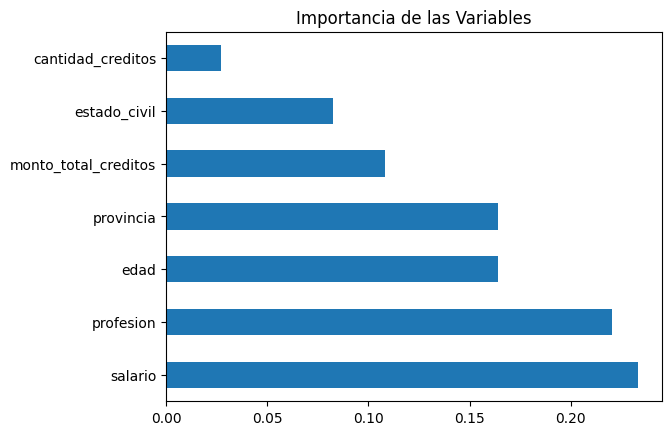

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
# 1) Crear creditos_agg: cantidad y suma de monto por usuario
creditos_agg = df_creditos.groupby('usuario_id').agg(
    cantidad_creditos_agg=('id', 'count'),
    monto_agg=('monto_total_creditos', 'sum')
).reset_index()

print("creditos_agg columnas:", creditos_agg.columns.tolist())
print(creditos_agg.head())

# 2) Eliminar columnas que puedan generar conflicto antes del merge
df_usuarios = df_usuarios.drop(columns=['monto_total_creditos', 'cantidad_creditos'], errors='ignore')

# 3) Merge con creditos_agg
df_usuarios = df_usuarios.merge(creditos_agg, on='usuario_id', how='left')

print("df_usuarios columnas tras merge:", df_usuarios.columns.tolist())
print(df_usuarios[['usuario_id', 'cantidad_creditos_agg', 'monto_agg']].head())

# 4) Rellenar NaN de las columnas nuevas con 0 para evitar NaNs
df_usuarios['cantidad_creditos_agg'] = df_usuarios['cantidad_creditos_agg'].fillna(0)
df_usuarios['monto_agg'] = df_usuarios['monto_agg'].fillna(0)

# 5) Renombrar columnas
df_usuarios.rename(columns={
    'cantidad_creditos_agg': 'cantidad_creditos',
    'monto_agg': 'monto_total_creditos'
}, inplace=True)

# 6) Asegurar que no haya NaN en otras columnas de interés
df_usuarios['salario'] = df_usuarios['salario'].fillna(0)
df_usuarios['provincia'] = df_usuarios['provincia'].fillna('Desconocido')
df_usuarios['estado_civil'] = df_usuarios['estado_civil'].fillna('Desconocido')
df_usuarios['profesion'] = df_usuarios['profesion'].fillna('Desconocido')
df_usuarios['edad'] = df_usuarios['edad'].fillna(df_usuarios['edad'].median())

# 7) Definir features y target
features = ['edad', 'salario', 'provincia', 'estado_civil', 'profesion', 'cantidad_creditos', 'monto_total_creditos']
X = df_usuarios[features]
y = df_usuarios['es_moroso']

# 8) Codificar variables categóricas si es necesario
from sklearn.preprocessing import LabelEncoder

for col in ['provincia', 'estado_civil', 'profesion']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 9) Finalmente puedes entrenar tu modelo y graficar importancias sin NaNs
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='barh', title='Importancia de las Variables')
plt.show()



In [58]:
#Validación cruzada

from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Validación cruzada (5 folds)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Accuracy promedio con validación cruzada: {scores.mean():.4f}")

Accuracy promedio con validación cruzada: 0.7433


✅ Mejores parámetros encontrados: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

📊 Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.99      0.85      1825
        True       0.09      0.00      0.00       623

    accuracy                           0.74      2448
   macro avg       0.42      0.50      0.43      2448
weighted avg       0.58      0.74      0.64      2448



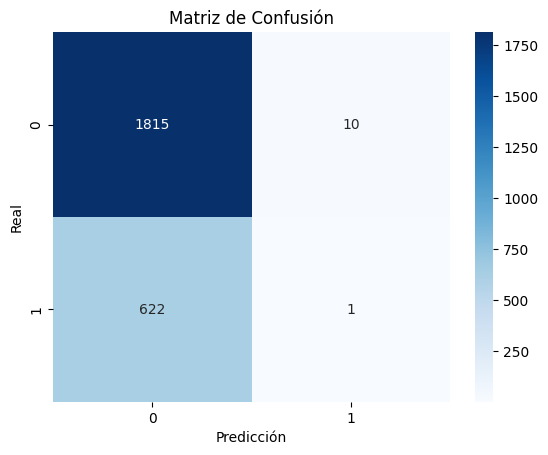

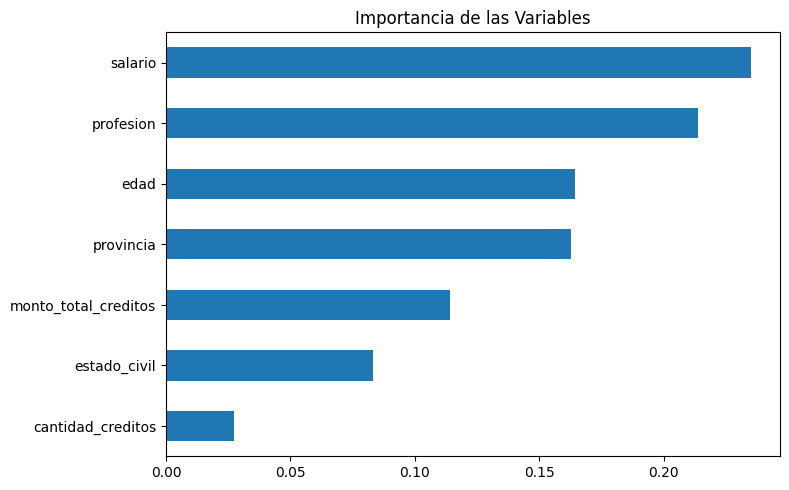

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

# --- Asegurarse de que no hay nulos en variables clave ---
df_usuarios = df_usuarios.copy()

# Rellenar NaNs categóricos con 'Desconocido'
cat_vars = ['provincia', 'estado_civil', 'profesion']
df_usuarios[cat_vars] = df_usuarios[cat_vars].fillna('Desconocido')

# Rellenar valores numéricos con 0 si hay nulos
df_usuarios['salario'] = df_usuarios['salario'].fillna(0)
df_usuarios['monto_total_creditos'] = df_usuarios['monto_total_creditos'].fillna(0)
df_usuarios['cantidad_creditos'] = df_usuarios['cantidad_creditos'].fillna(0)

# --- Codificación de variables categóricas ---
for col in cat_vars:
    le = LabelEncoder()
    df_usuarios[col] = le.fit_transform(df_usuarios[col])

# --- Definir características (X) y etiqueta (y) ---
features = ['edad', 'salario', 'provincia', 'estado_civil', 'profesion', 'cantidad_creditos', 'monto_total_creditos']
X = df_usuarios[features]
y = df_usuarios['es_moroso']

# --- Escalado de variables ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- División train/test ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Búsqueda de hiperparámetros ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Entrenamiento
grid.fit(X_train, y_train)

# Resultados
print("✅ Mejores parámetros encontrados:", grid.best_params_)

# Mejor modelo
best_model = grid.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluación
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# --- Importancia de variables ---
importances = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', title='Importancia de las Variables', figsize=(8, 5))
plt.tight_layout()
plt.show()

In [60]:
#Búsqueda de hiperparámetros con GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

# Evaluar con mejores parámetros
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


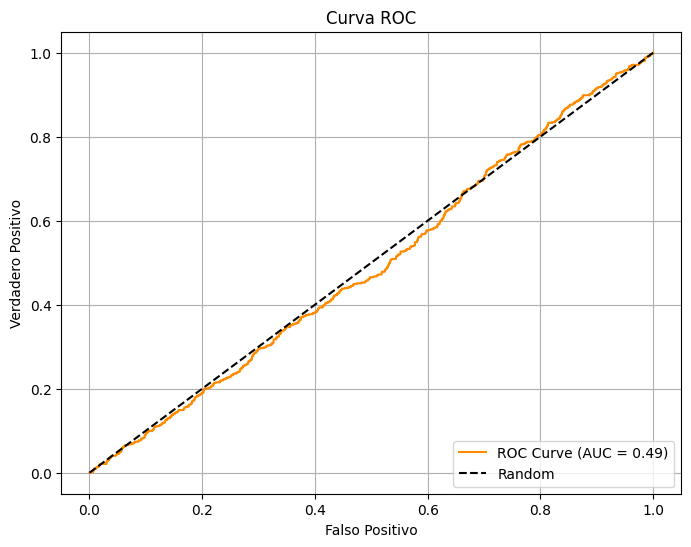

In [61]:
#ROC Curve y AUC

from sklearn.metrics import roc_curve, auc

# Probabilidades
y_scores = best_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

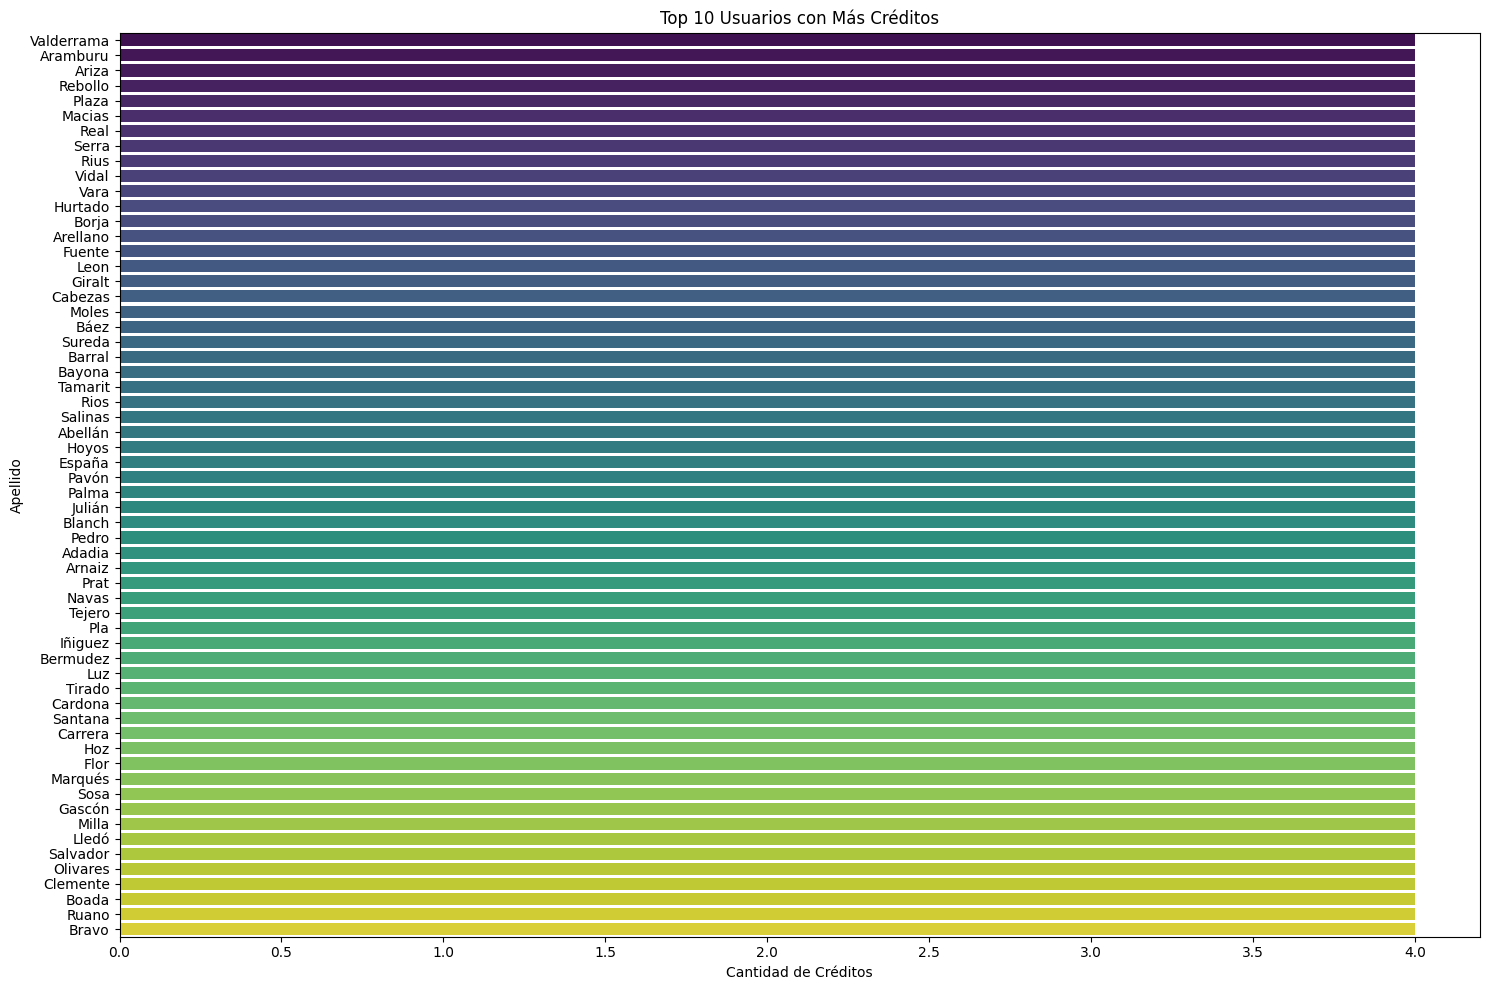

In [62]:
#usuarios con más de 3 créditos
usuarios_mas_creditos = df_usuarios[df_usuarios['usuario_id'].isin(creditos_por_usuario[creditos_por_usuario['cantidad_creditos'] > 3]['usuario_id'])]
usuarios_mas_creditos[['usuario_id', 'nombre', 'apellido', 'cantidad_creditos']].sort_values(by='cantidad_creditos', ascending=False).head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=usuarios_mas_creditos, x='cantidad_creditos', y='apellido', palette='viridis')
plt.title("Top 10 Usuarios con Más Créditos")
plt.xlabel("Cantidad de Créditos")
plt.ylabel("Apellido")
plt.tight_layout()
plt.show()


In [63]:
# Lista completa de provincias de España
provincias_espana = [
    'Álava', 'Albacete', 'Alicante', 'Almería', 'Asturias', 'Ávila', 'Badajoz',
    'Barcelona', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón',
    'Ciudad Real', 'Córdoba', 'Cuenca', 'Girona', 'Granada', 'Guadalajara',
    'Gipuzkoa', 'Huelva', 'Huesca', 'Illes Balears', 'Jaén', 'La Rioja',
    'Las Palmas', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga', 'Murcia',
    'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife',
    'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia',
    'Valladolid', 'Bizkaia', 'Zamora', 'Zaragoza', 'Ceuta', 'Melilla'
]

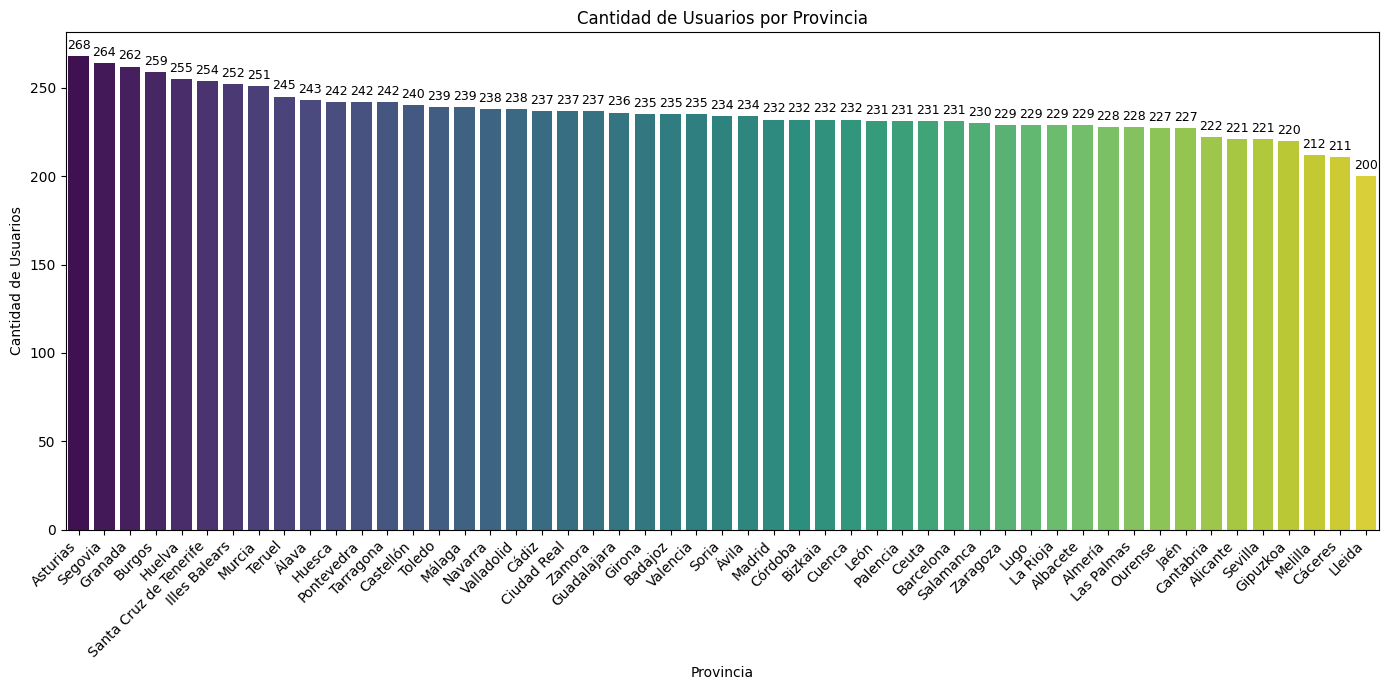

In [64]:
le = LabelEncoder()


# Simulación de df_usuarios con provincias codificadas
le = LabelEncoder()
le.fit(provincias_espana)

np.random.seed(42)
df_usuario_reducido = df_usuarios[['usuario_id', 'provincia']].copy()
df_usuario_reducido = pd.DataFrame({
    'usuario_id': range(1, 101),
    'provincia': np.random.choice(le.transform(provincias_espana), 100)
})

# Agrupar usuarios por provincia codificada
usuarios_provincia = df_usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')

# Mapear código a nombre
mapa_provincias = dict(zip(range(len(le.classes_)), le.classes_))
usuarios_provincia['provincia_nombre'] = usuarios_provincia['provincia'].map(mapa_provincias)

# Ordenar por cantidad usuarios
usuarios_provincia = usuarios_provincia.sort_values('cantidad_usuarios', ascending=False)

# Graficar
plt.figure(figsize=(14,7))
ax = sns.barplot(data=usuarios_provincia, x='provincia_nombre', y='cantidad_usuarios', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de Usuarios por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Usuarios")

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

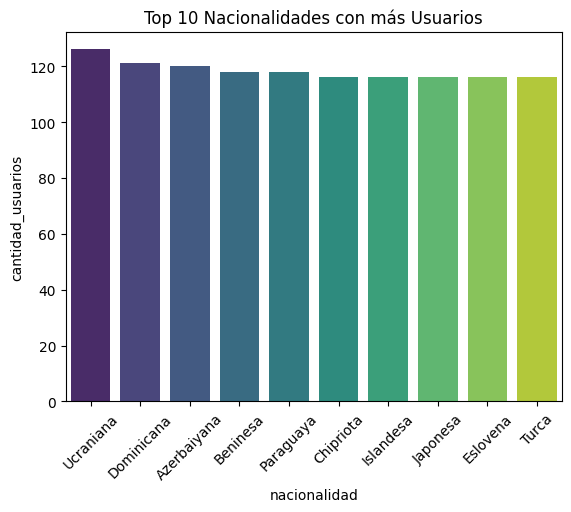

In [65]:
#usuario por nacionalidad
usuarios_nacionalidad = df_usuarios.groupby('nacionalidad').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_nacionalidad.sort_values('cantidad_usuarios', ascending=False).head(10),
            x='nacionalidad', y='cantidad_usuarios', palette='viridis')
plt.title("Top 10 Nacionalidades con más Usuarios")
plt.xticks(rotation=45)
plt.show()

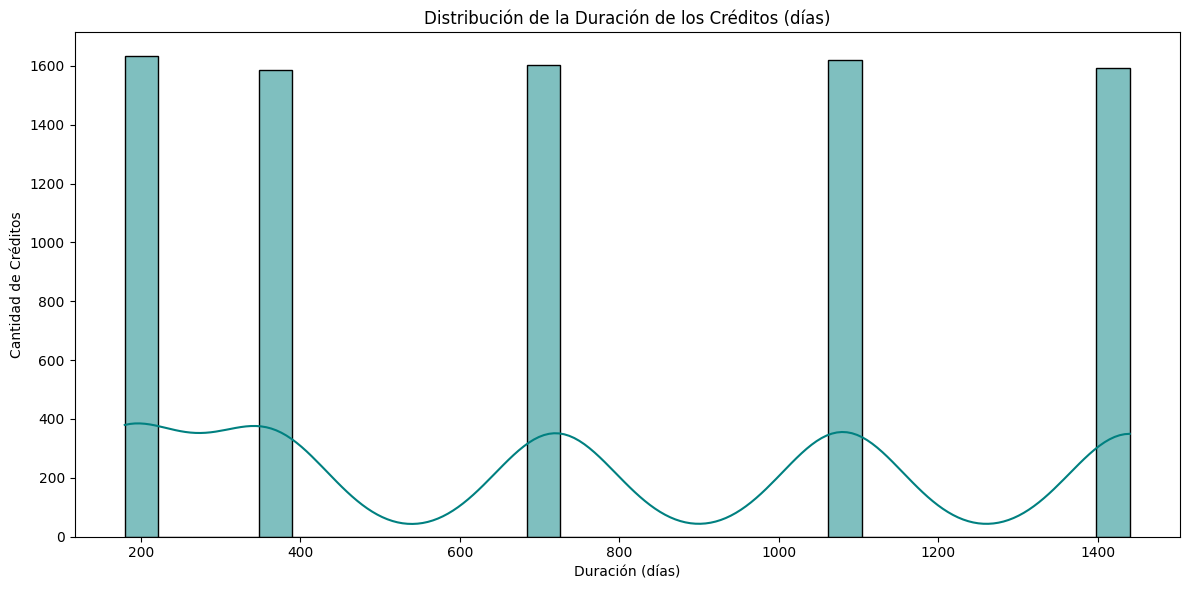

In [66]:
#duración de los créditos
# Convertir columnas a datetime (por si acaso)
df_creditos['fecha_inicio'] = pd.to_datetime(df_creditos['fecha_inicio'])
df_creditos['fecha_fin'] = pd.to_datetime(df_creditos['fecha_fin'])

# Calcular duración en días
df_creditos['duracion_credito'] = (df_creditos['fecha_fin'] - df_creditos['fecha_inicio']).dt.days

# Graficar distribución de duración
plt.figure(figsize=(12,6))
sns.histplot(df_creditos['duracion_credito'], bins=30, kde=True, color='teal')

plt.title("Distribución de la Duración de los Créditos (días)")
plt.xlabel("Duración (días)")
plt.ylabel("Cantidad de Créditos")
plt.tight_layout()
plt.show()

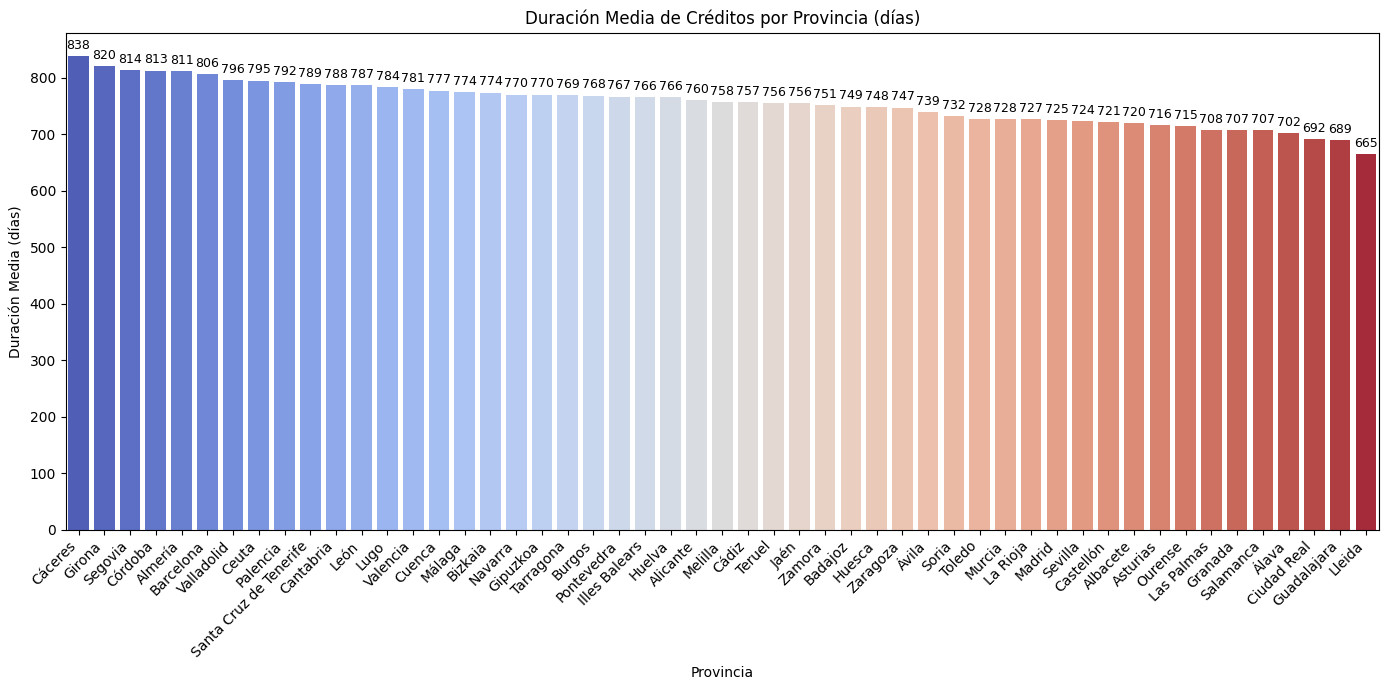

In [67]:

# Simulación de df_usuarios con provincias codificadas (solo si no tienes el df original)
le = LabelEncoder()
le.fit(provincias_espana)

# --- Asumiendo que df_usuarios y df_creditos ya existen con las columnas necesarias ---
# Aquí ejemplo para calcular duración_credito (días)
df_creditos['fecha_inicio'] = pd.to_datetime(df_creditos['fecha_inicio'])
df_creditos['fecha_fin'] = pd.to_datetime(df_creditos['fecha_fin'])
df_creditos['duracion_credito'] = (df_creditos['fecha_fin'] - df_creditos['fecha_inicio']).dt.days

# Asociar provincia codificada desde df_usuarios
df_creditos = df_creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')

# Calcular duración media por provincia (código)
duracion_media_provincia = df_creditos.groupby('provincia')['duracion_credito'].mean().reset_index()

# Mapear código a nombre
mapa_provincias = dict(zip(range(len(le.classes_)), le.classes_))
duracion_media_provincia['provincia_nombre'] = duracion_media_provincia['provincia'].map(mapa_provincias)

# Ordenar para gráfico
duracion_media_provincia = duracion_media_provincia.sort_values('duracion_credito', ascending=False)

# Graficar duración media con etiquetas
plt.figure(figsize=(14,7))
ax = sns.barplot(data=duracion_media_provincia, x='provincia_nombre', y='duracion_credito', palette='coolwarm')

plt.xticks(rotation=45, ha='right')
plt.title("Duración Media de Créditos por Provincia (días)")
plt.xlabel("Provincia")
plt.ylabel("Duración Media (días)")

# Etiquetas encima de barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

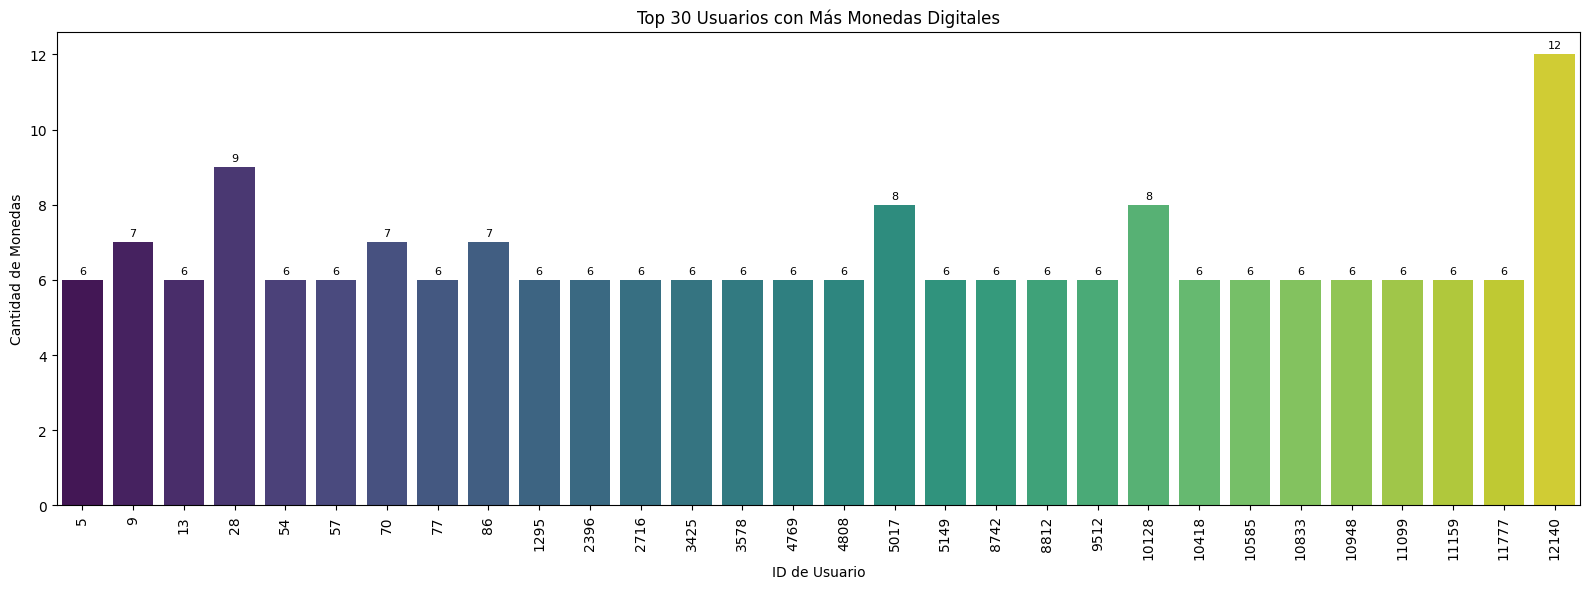

In [68]:
#cantidad de monedas digitales por usuario

# Agrupar y ordenar
monedas_por_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
monedas_por_usuario = monedas_por_usuario.sort_values('cantidad_monedas', ascending=False)

top_n = 30
top_monedas = monedas_por_usuario.head(top_n)

plt.figure(figsize=(16,6))
ax = sns.barplot(data=top_monedas, x='usuario_id', y='cantidad_monedas', palette='viridis')

plt.title(f"Top {top_n} Usuarios con Más Monedas Digitales")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.xticks(rotation=90)

# Etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black',
                xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

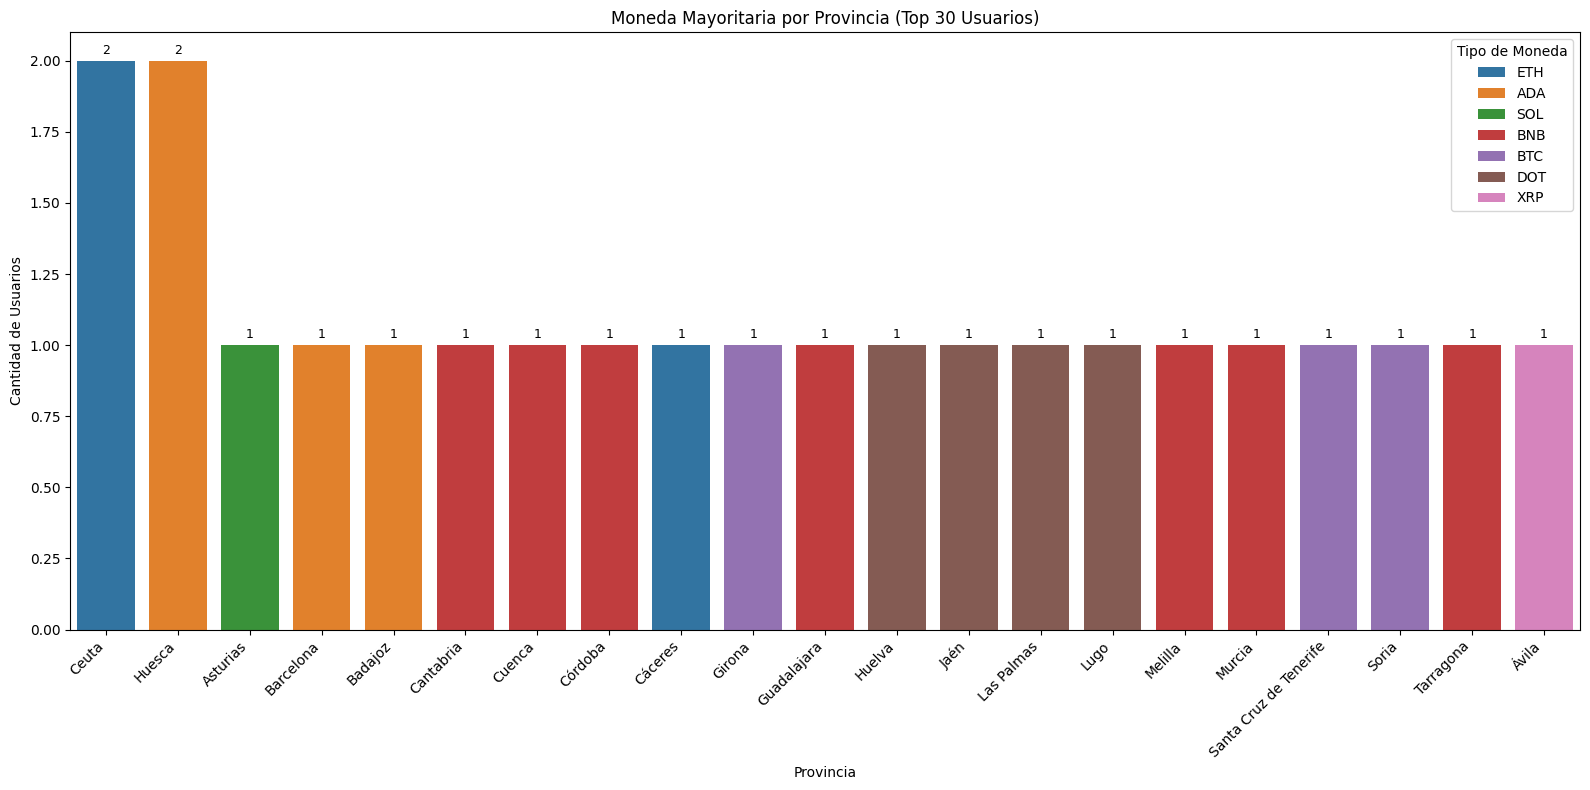

In [69]:

le = LabelEncoder()
le.fit(provincias_espana)
mapa_provincias = dict(zip(range(len(le.classes_)), le.classes_))  # Código → Nombre

# Crear una copia auxiliar para no tocar df_usuarios original
df_usuarios_aux = df_usuarios.copy()

# Si las provincias están codificadas, decodificarlas
if df_usuarios_aux['provincia'].dtype in [np.int64, np.int32]:
    df_usuarios_aux['provincia_nombre'] = df_usuarios_aux['provincia'].map(mapa_provincias)
else:
    df_usuarios_aux['provincia_nombre'] = df_usuarios_aux['provincia']

# --------------------------------------
# 3. Calcular moneda mayoritaria por usuario
# --------------------------------------
monedas_usuario = df_monedas.groupby(['usuario_id', 'tipo_moneda']).size().reset_index(name='cantidad')
idx_max = monedas_usuario.groupby('usuario_id')['cantidad'].idxmax()
moneda_mayoritaria_usuario = monedas_usuario.loc[idx_max].reset_index(drop=True)

# --------------------------------------
# 4. Top 30 usuarios con más monedas
# --------------------------------------
total_monedas_usuario = df_monedas.groupby('usuario_id').size().reset_index(name='total_monedas')
top30_usuarios = total_monedas_usuario.sort_values('total_monedas', ascending=False).head(30)

# Filtrar monedas mayoritarias solo para top30 usuarios
moneda_top30 = moneda_mayoritaria_usuario[moneda_mayoritaria_usuario['usuario_id'].isin(top30_usuarios['usuario_id'])]

# Unir con df_usuarios_aux para obtener la provincia sin tocar el original
moneda_top30 = moneda_top30.merge(df_usuarios_aux[['usuario_id', 'provincia_nombre']], on='usuario_id', how='left')

# --------------------------------------
# 5. Moneda mayoritaria por provincia
# --------------------------------------
moneda_provincia = moneda_top30.groupby(['provincia_nombre', 'tipo_moneda']).size().reset_index(name='cantidad')
idx_max_prov = moneda_provincia.groupby('provincia_nombre')['cantidad'].idxmax()
moneda_mayoritaria_provincia = moneda_provincia.loc[idx_max_prov].reset_index(drop=True)

# --------------------------------------
# 6. Visualización
# --------------------------------------
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=moneda_mayoritaria_provincia.sort_values('cantidad', ascending=False),
                 x='provincia_nombre', y='cantidad', hue='tipo_moneda', dodge=False, palette='tab10')

plt.title('Moneda Mayoritaria por Provincia (Top 30 Usuarios)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.legend(title='Tipo de Moneda')
plt.tight_layout()
plt.show()


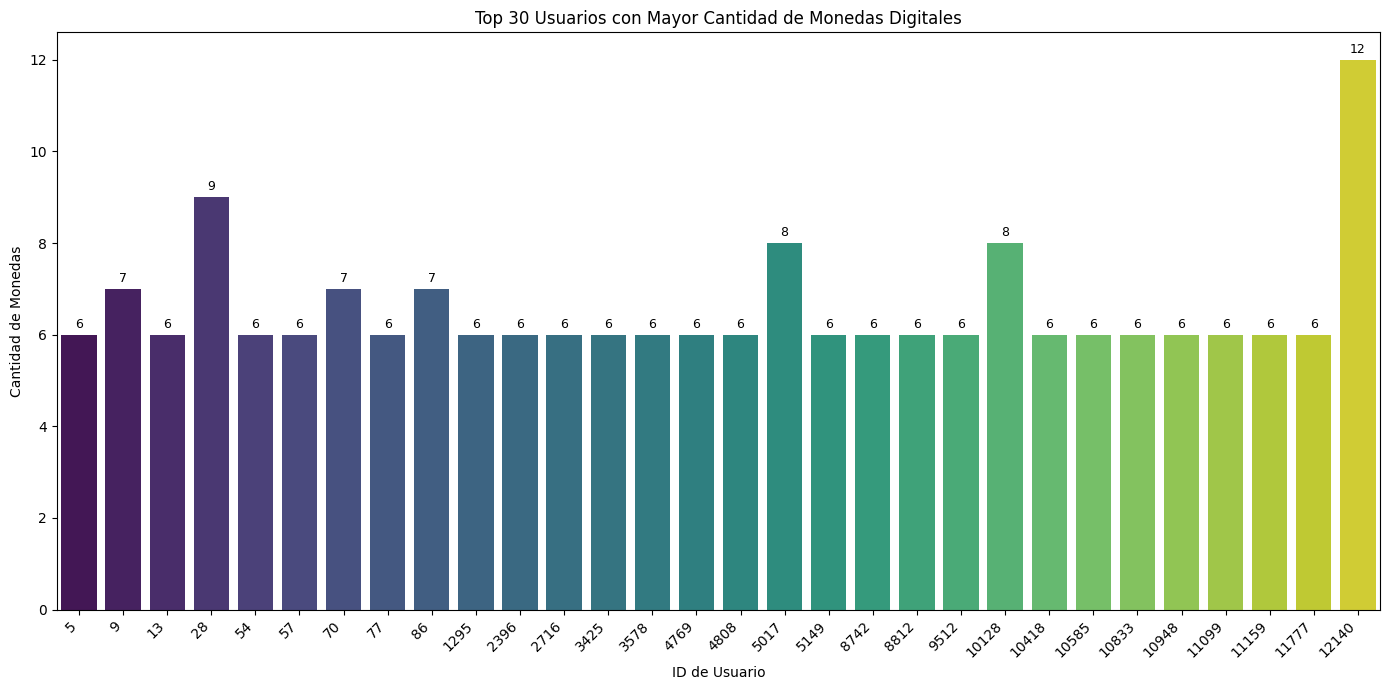

In [70]:
#cantidad de monedas digitales por usuario
# Seleccionar top 30 usuarios con más monedas
top30_monedas = monedas_por_usuario.sort_values(by='cantidad_monedas', ascending=False).head(30)

plt.figure(figsize=(14,7))
ax = sns.barplot(data=top30_monedas, x='usuario_id', y='cantidad_monedas', palette='viridis')

plt.title("Top 30 Usuarios con Mayor Cantidad de Monedas Digitales")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")

plt.xticks(rotation=45, ha='right')

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=9, color='black',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

   usuario_id antiguedad_cliente  antiguedad_dias  antiguedad_anos
0           1         2021-10-30             1362         3.731507
1           2         2020-10-19             1738         4.761644
2           3         2020-08-31             1787         4.895890
3           4         2021-06-20             1494         4.093151
4           5         2020-09-10             1777         4.868493


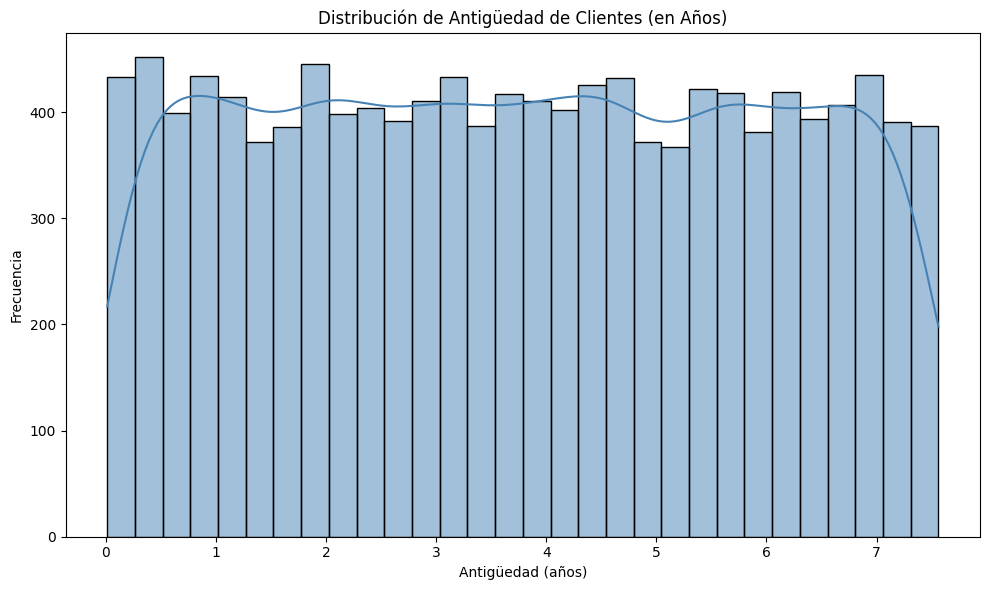

In [71]:
# --- Asegurar que 'antiguedad_cliente' es datetime ---
df_usuarios['antiguedad_cliente'] = pd.to_datetime(df_usuarios['antiguedad_cliente'])

# --- Calcular antigüedad en días y años ---
df_usuarios['antiguedad_dias'] = (pd.Timestamp('today') - df_usuarios['antiguedad_cliente']).dt.days
df_usuarios['antiguedad_anos'] = df_usuarios['antiguedad_dias'] / 365

# --- Verificar ---
print(df_usuarios[['usuario_id', 'antiguedad_cliente', 'antiguedad_dias', 'antiguedad_anos']].head())

# --- Gráfico de distribución de antigüedad ---
plt.figure(figsize=(10, 6))
sns.histplot(df_usuarios['antiguedad_anos'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de Antigüedad de Clientes (en Años)')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

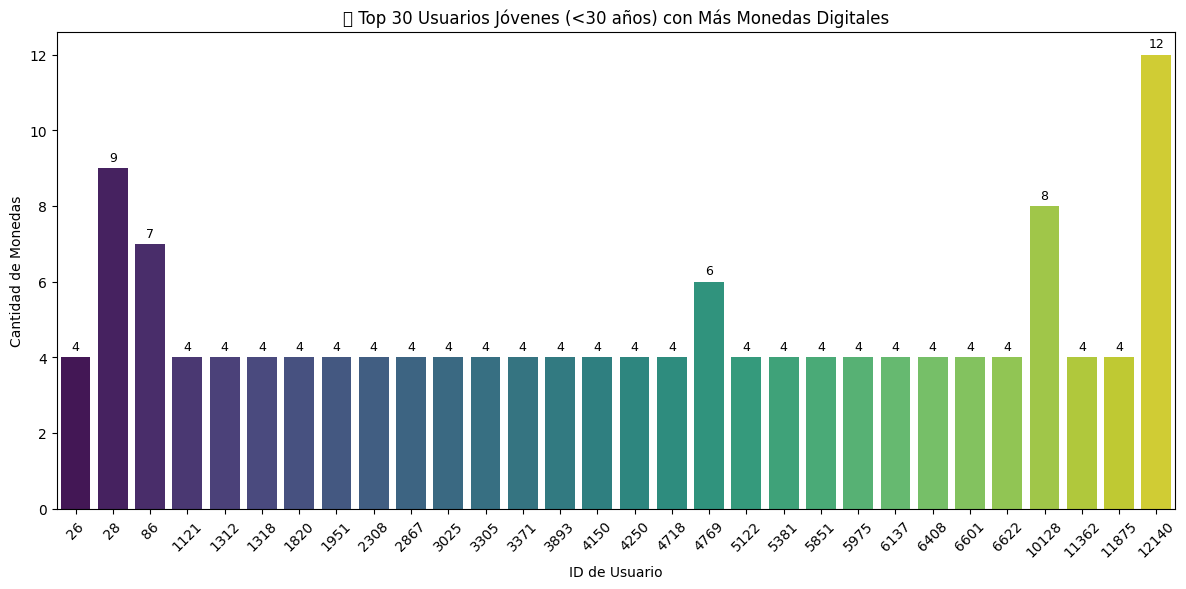

In [72]:
# usuarios mas jovenes mas modenas digitales
# Filtrar usuarios menores de 30 años
usuarios_jovenes = df_usuarios[df_usuarios['edad'] < 30]

# Filtrar monedas de esos usuarios
monedas_jovenes = df_monedas[df_monedas['usuario_id'].isin(usuarios_jovenes['usuario_id'])]

# Contar monedas por usuario
monedas_por_usuario = monedas_jovenes.groupby('usuario_id').size().reset_index(name='cantidad_monedas')

# Ordenar y tomar top 30
top30 = monedas_por_usuario.sort_values('cantidad_monedas', ascending=False).head(30)

# Graficar
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top30, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("🪙 Top 30 Usuarios Jóvenes (<30 años) con Más Monedas Digitales")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.xticks(rotation=45)

# Añadir etiquetas encima de las barras
for barra in ax.patches:
    altura = barra.get_height()
    ax.annotate(f'{int(altura)}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


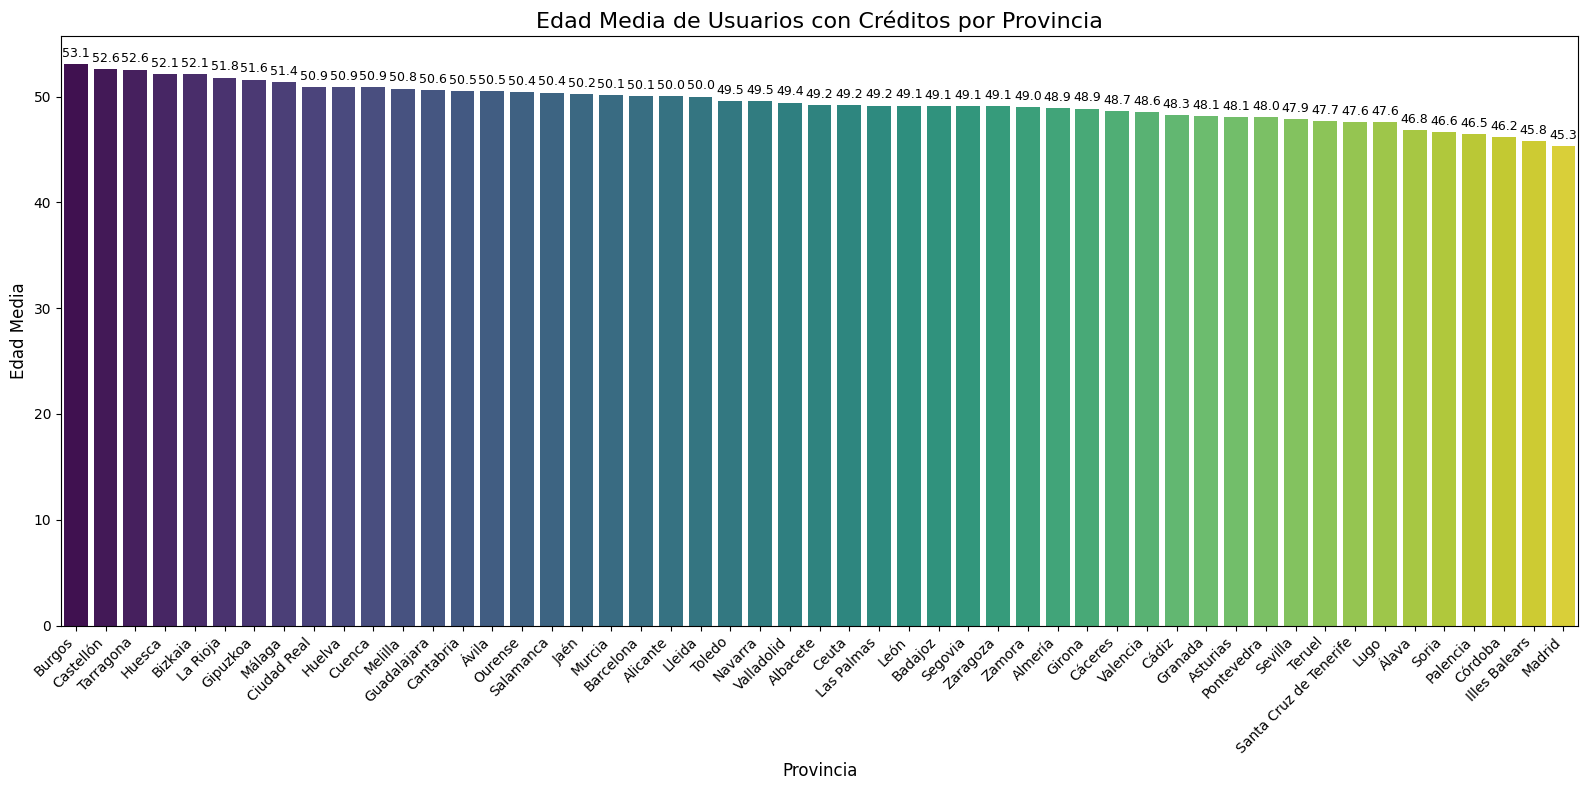

In [73]:
#edad media creditos por provincia
# 1. Hacer un merge para unir créditos con usuarios (sin modificar df_usuarios ni creditos)
edad_creditos_provincia = creditos.merge(
    df_usuarios[['usuario_id', 'edad', 'provincia']],
    on='usuario_id',
    how='left'
)

# 2. Agrupar por provincia codificada y calcular edad media
edad_media_por_provincia = edad_creditos_provincia.groupby('provincia')['edad'].mean().reset_index()

# 3. Crear un mapa temporal de código provincia a nombre real, sin cambiar df_usuarios
mapa_provincias = dict(zip(range(len(le.classes_)), le.classes_))
edad_media_por_provincia['provincia_nombre'] = edad_media_por_provincia['provincia'].map(mapa_provincias)

# 4. Ordenar y graficar usando solo estas variables temporales
edad_media_por_provincia = edad_media_por_provincia.sort_values('edad', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=edad_media_por_provincia,
    x='provincia_nombre',
    y='edad',
    palette='viridis'
)

plt.title("Edad Media de Usuarios con Créditos por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Edad Media", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


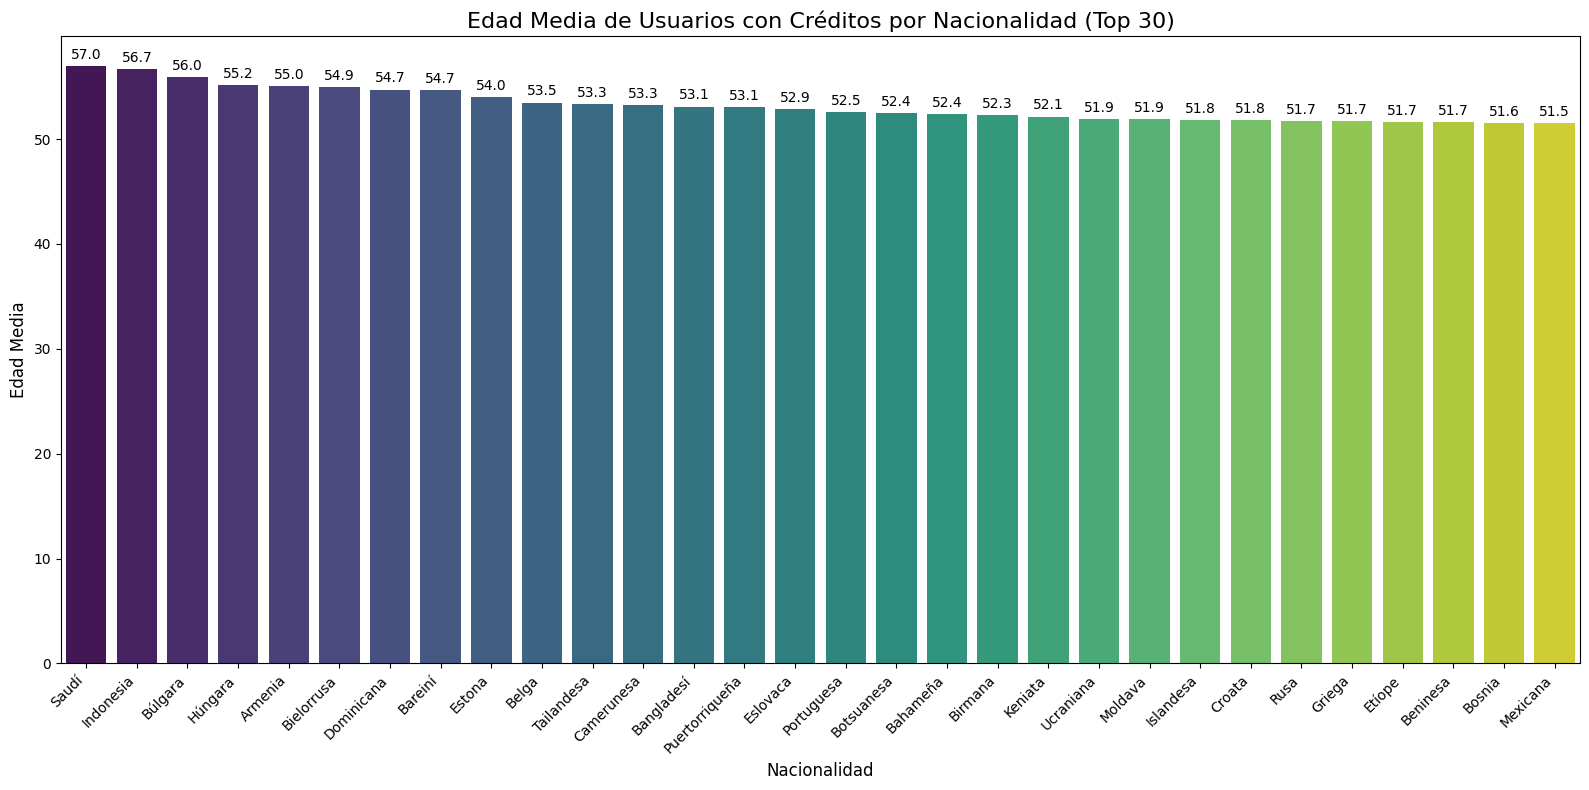

In [74]:
#edad media creditos por nacionalidad
# Crear una copia temporal para el merge (no afecta al df original)
temp = creditos.merge(
    df_usuarios[['usuario_id', 'edad', 'nacionalidad']],
    on='usuario_id', how='left'
)

# Agrupar por nacionalidad y calcular edad media
edad_media_nacionalidad = temp.groupby('nacionalidad')['edad'].mean().reset_index()

# Tomar top 30 nacionalidades por edad media descendente
top_nacionalidades = edad_media_nacionalidad.sort_values('edad', ascending=False).head(30)

# Graficar sin modificar df original
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_nacionalidades, x='nacionalidad', y='edad', palette='viridis')

plt.title("Edad Media de Usuarios con Créditos por Nacionalidad (Top 30)", fontsize=16)
plt.xlabel("Nacionalidad", fontsize=12)
plt.ylabel("Edad Media", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

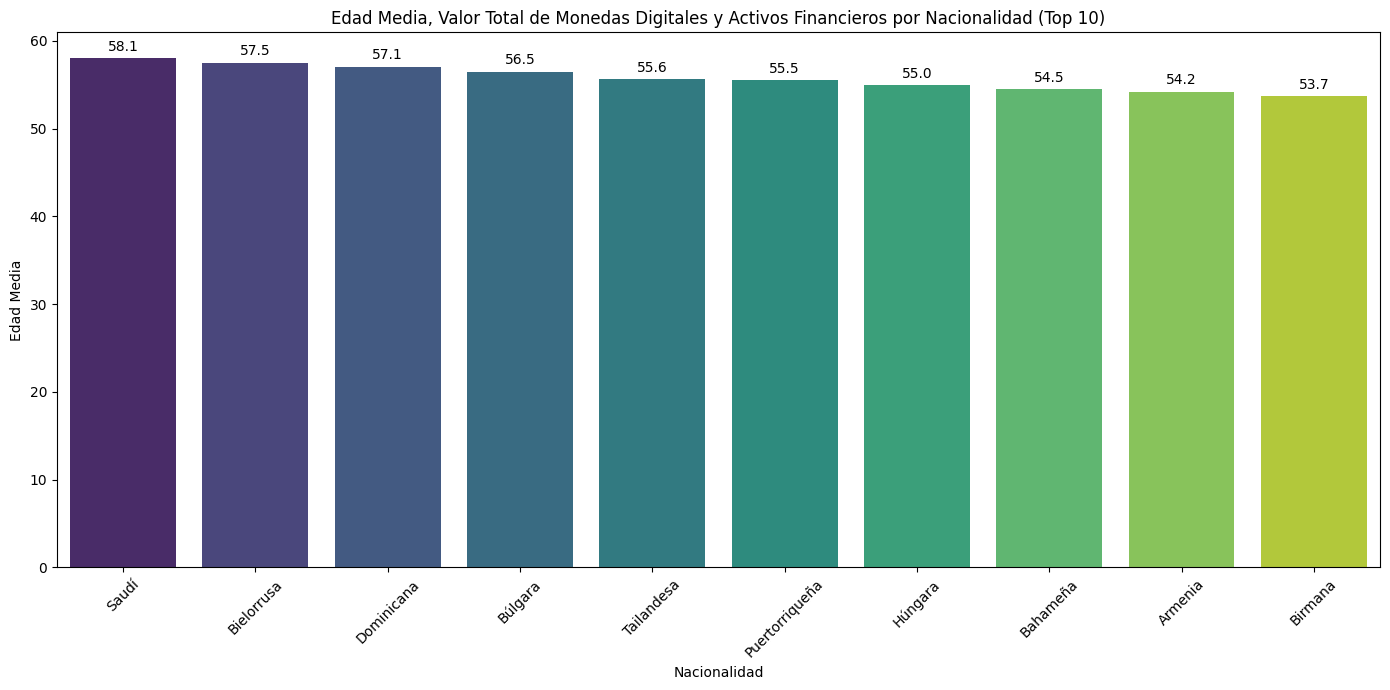

In [75]:
#edad media creditos, monedas digitales y activos financieros por nacionalidad
# Preparamos datos agrupados
edad_creditos_monedas_activos_nacionalidad = (
    creditos.merge(df_usuarios[['usuario_id', 'edad', 'nacionalidad']], on='usuario_id', how='left')
    .merge(df_monedas[['usuario_id', 'valor_actual']], on='usuario_id', how='left')
    .merge(df_activos[['usuario_id', 'monto_activo']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_nacionalidad = edad_creditos_monedas_activos_nacionalidad.groupby('nacionalidad').agg({
    'edad': 'mean',
    'valor_actual': 'sum',
    'monto_activo': 'sum'
}).reset_index()

# Ordenamos y tomamos top 10
df_plot = edad_creditos_monedas_activos_nacionalidad.sort_values('edad', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_plot, x='nacionalidad', y='edad', palette='viridis')

plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros por Nacionalidad (Top 10)")
plt.xlabel("Nacionalidad")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)

# Añadir etiquetas encima de barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

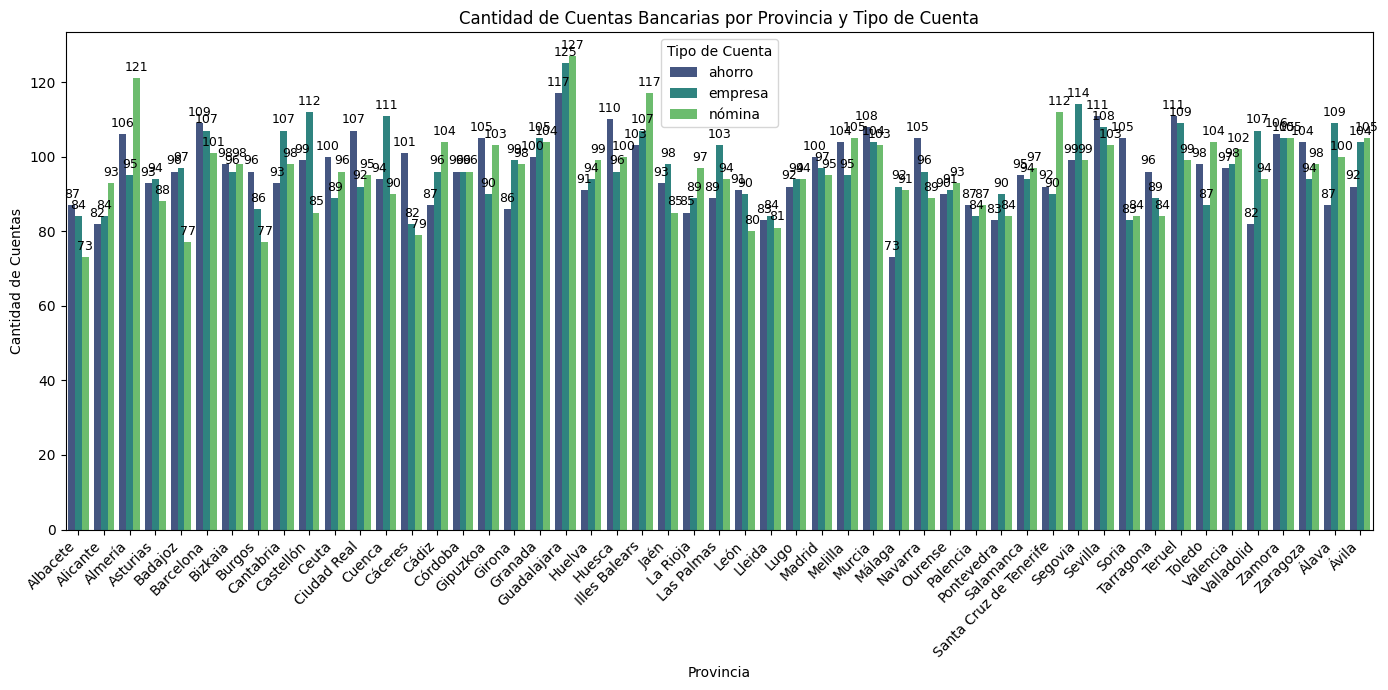

In [76]:
#tipo de cuentas bancarias por provincia

# Crear un diccionario para mapear código a nombre
mapa_provincias = dict(zip(range(len(provincias_espana)), provincias_espana))

# Merge y mapear código a nombre de provincia
cuentas_provincia = df_cuentas.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
cuentas_provincia['provincia_nombre'] = cuentas_provincia['provincia'].map(mapa_provincias)

# Agrupar por provincia_nombre y tipo_cuenta
cuentas_provincia_agg = cuentas_provincia.groupby(['provincia_nombre', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=cuentas_provincia_agg, x='provincia_nombre', y='cantidad_cuentas', hue='tipo_cuenta', palette='viridis')

plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()



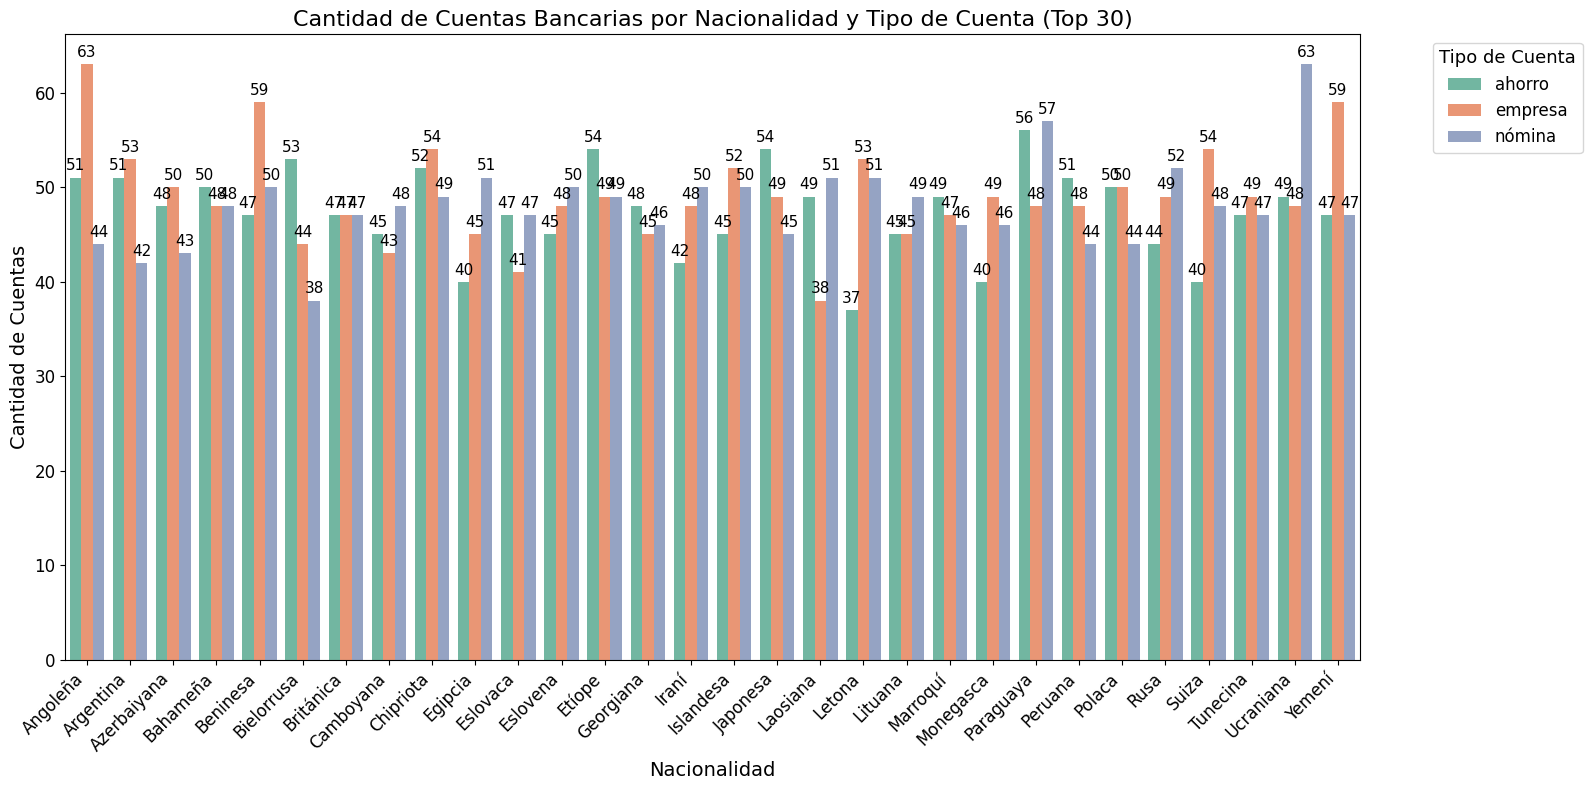

In [77]:
#tipo de cuentas bancarias por nacionalidad
cuentas_nacionalidad = df_cuentas.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
cuentas_nacionalidad = cuentas_nacionalidad.groupby(['nacionalidad', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')

# Sumar total cuentas por nacionalidad para filtrar top 30
total_cuentas_por_nacionalidad = cuentas_nacionalidad.groupby('nacionalidad')['cantidad_cuentas'].sum().reset_index()
top30_nacionalidades = total_cuentas_por_nacionalidad.sort_values('cantidad_cuentas', ascending=False).head(30)['nacionalidad']

# Filtrar solo el top 30 nacionalidades
cuentas_nacionalidad_top30 = cuentas_nacionalidad[cuentas_nacionalidad['nacionalidad'].isin(top30_nacionalidades)]

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=cuentas_nacionalidad_top30, x='nacionalidad', y='cantidad_cuentas', hue='tipo_cuenta', palette='Set2')

plt.title("Cantidad de Cuentas Bancarias por Nacionalidad y Tipo de Cuenta (Top 30)", fontsize=16)
plt.xlabel("Nacionalidad", fontsize=14)
plt.ylabel("Cantidad de Cuentas", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=11, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.legend(title='Tipo de Cuenta', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()



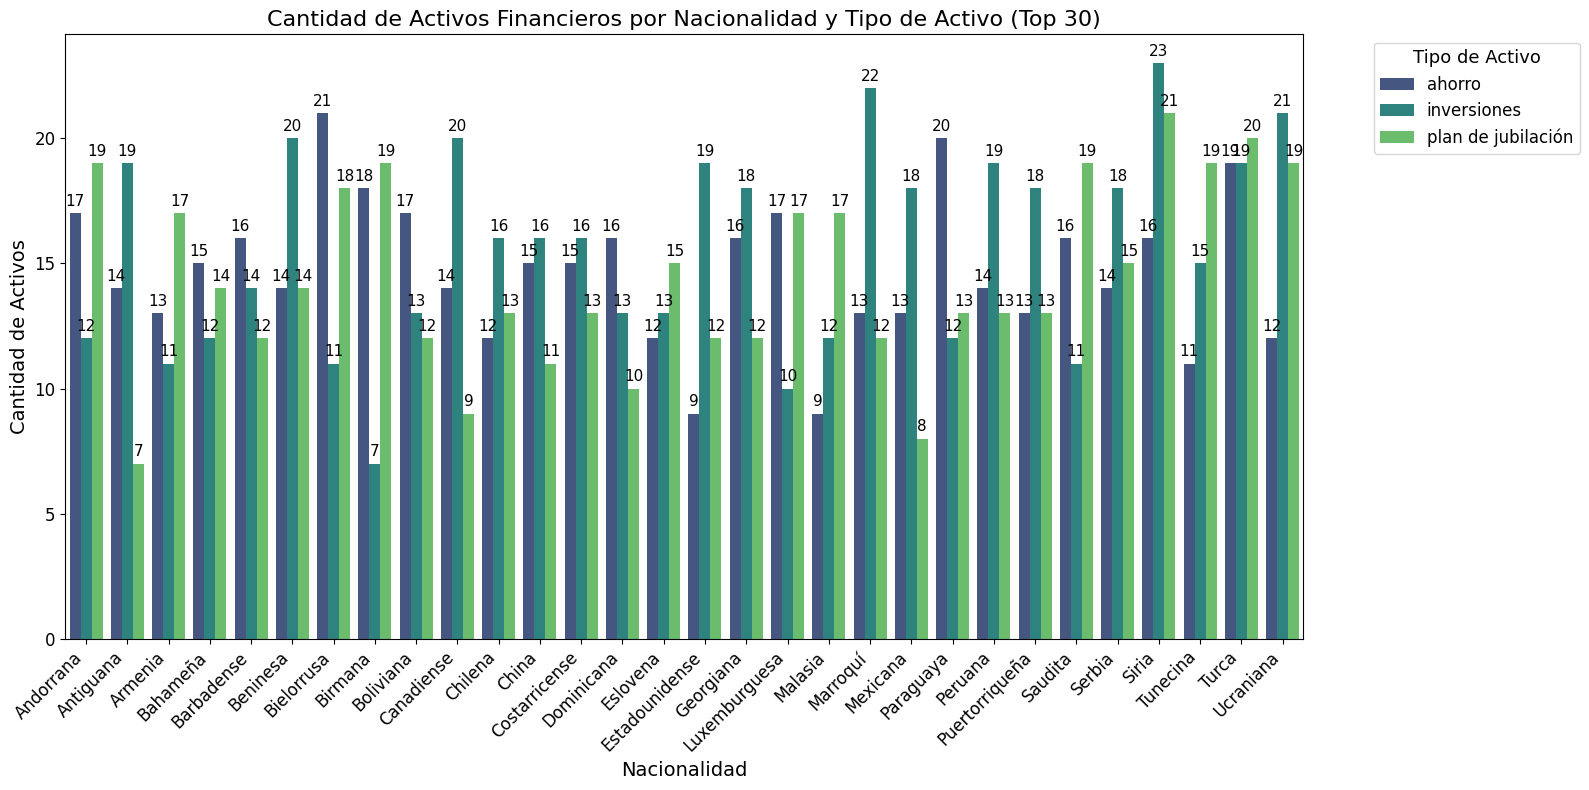

In [78]:
#tipos de activos financieros por nacionalidad
activos_nacionalidad = df_activos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
activos_nacionalidad = activos_nacionalidad.groupby(['nacionalidad', 'tipo_activo']).size().reset_index(name='cantidad_activos')

# Calcular total activos por nacionalidad para filtrar top 30
total_activos_por_nacionalidad = activos_nacionalidad.groupby('nacionalidad')['cantidad_activos'].sum().reset_index()
top30_nacionalidades = total_activos_por_nacionalidad.sort_values('cantidad_activos', ascending=False).head(30)['nacionalidad']

# Filtrar solo top 30 nacionalidades
activos_nacionalidad_top30 = activos_nacionalidad[activos_nacionalidad['nacionalidad'].isin(top30_nacionalidades)]

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=activos_nacionalidad_top30, x='nacionalidad', y='cantidad_activos', hue='tipo_activo', palette='viridis')

plt.title("Cantidad de Activos Financieros por Nacionalidad y Tipo de Activo (Top 30)", fontsize=16)
plt.xlabel("Nacionalidad", fontsize=14)
plt.ylabel("Cantidad de Activos", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=11, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.legend(title='Tipo de Activo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


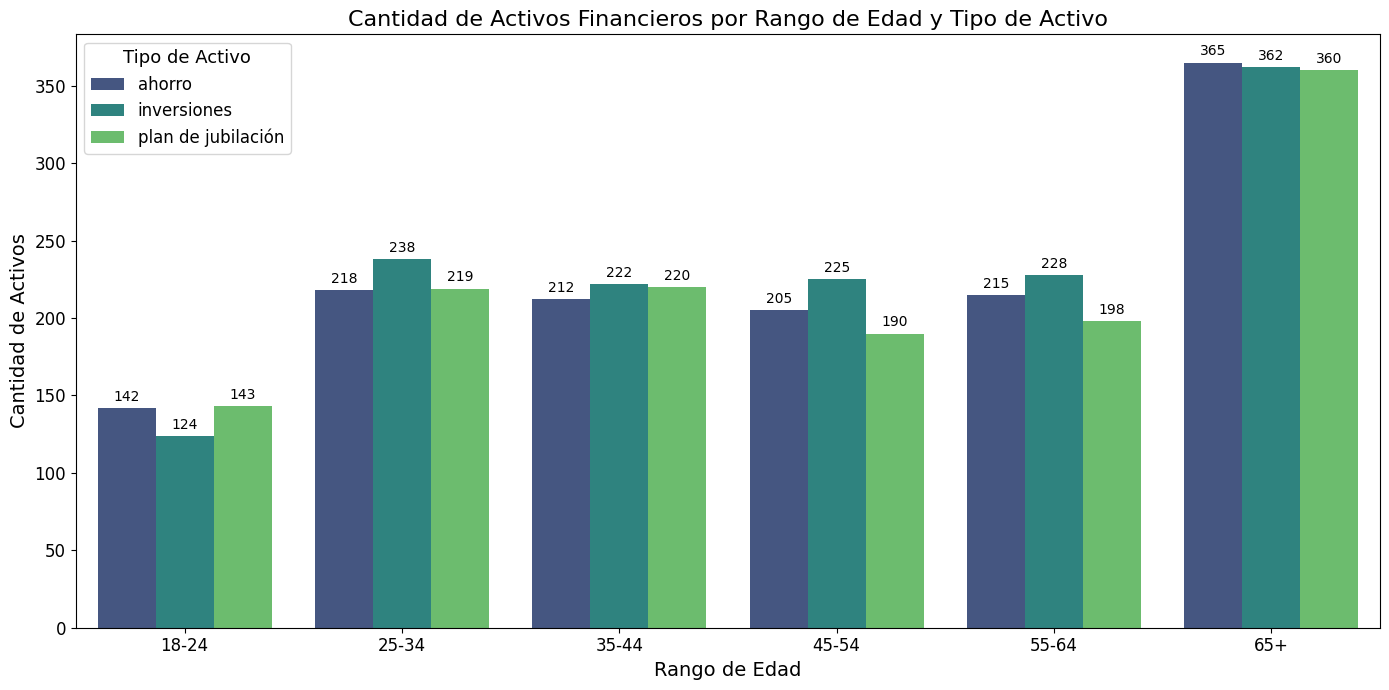

In [79]:


# Definir los rangos de edad y etiquetas
bins = [18, 24, 34, 44, 54, 64, 120]
labels = [ '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Añadir columna de rango de edad
activos_edad = df_activos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
activos_edad['rango_edad'] = pd.cut(activos_edad['edad'], bins=bins, labels=labels, right=True)

# Agrupar por rango de edad y tipo de activo
activos_edad_agg = activos_edad.groupby(['rango_edad', 'tipo_activo']).size().reset_index(name='cantidad_activos')

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=activos_edad_agg, x='rango_edad', y='cantidad_activos', hue='tipo_activo', palette='viridis')

plt.title("Cantidad de Activos Financieros por Rango de Edad y Tipo de Activo", fontsize=16)
plt.xlabel("Rango de Edad", fontsize=14)
plt.ylabel("Cantidad de Activos", fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipo de Activo', fontsize=12, title_fontsize=13)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


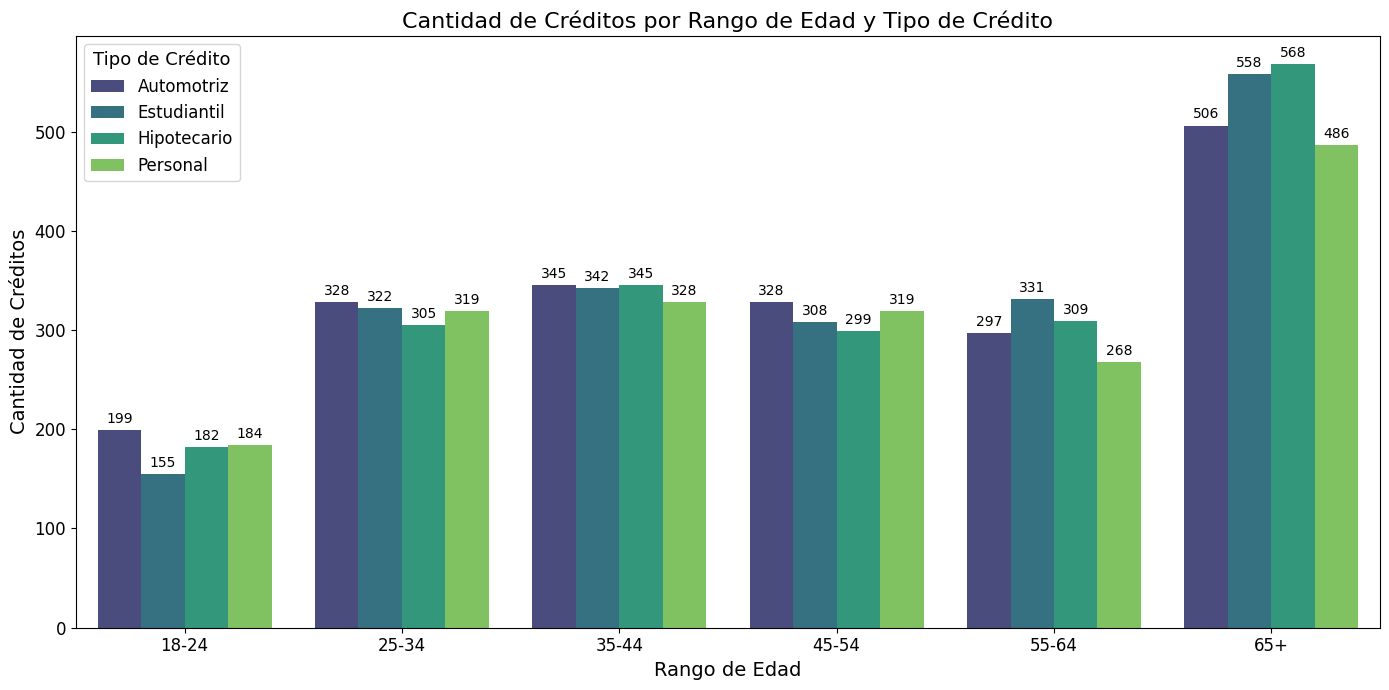

In [80]:
# Definir rangos de edad y etiquetas (los mismos que antes)
bins = [18, 24, 34, 44, 54, 64, 120]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Merge df_creditos con edad de usuarios
creditos_edad = df_creditos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')

# Crear columna de rango de edad
creditos_edad['rango_edad'] = pd.cut(creditos_edad['edad'], bins=bins, labels=labels, right=True)

# Agrupar por rango de edad y tipo de crédito (si tienes tipo, si no, sólo rango de edad)
# Asumo que tienes una columna 'tipo' en df_creditos para clasificar créditos
creditos_edad_agg = creditos_edad.groupby(['rango_edad', 'tipo']).size().reset_index(name='cantidad_creditos')

# Gráfico
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=creditos_edad_agg, x='rango_edad', y='cantidad_creditos', hue='tipo', palette='viridis')

plt.title("Cantidad de Créditos por Rango de Edad y Tipo de Crédito", fontsize=16)
plt.xlabel("Rango de Edad", fontsize=14)
plt.ylabel("Cantidad de Créditos", fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Tipo de Crédito', fontsize=12, title_fontsize=13)

# Etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


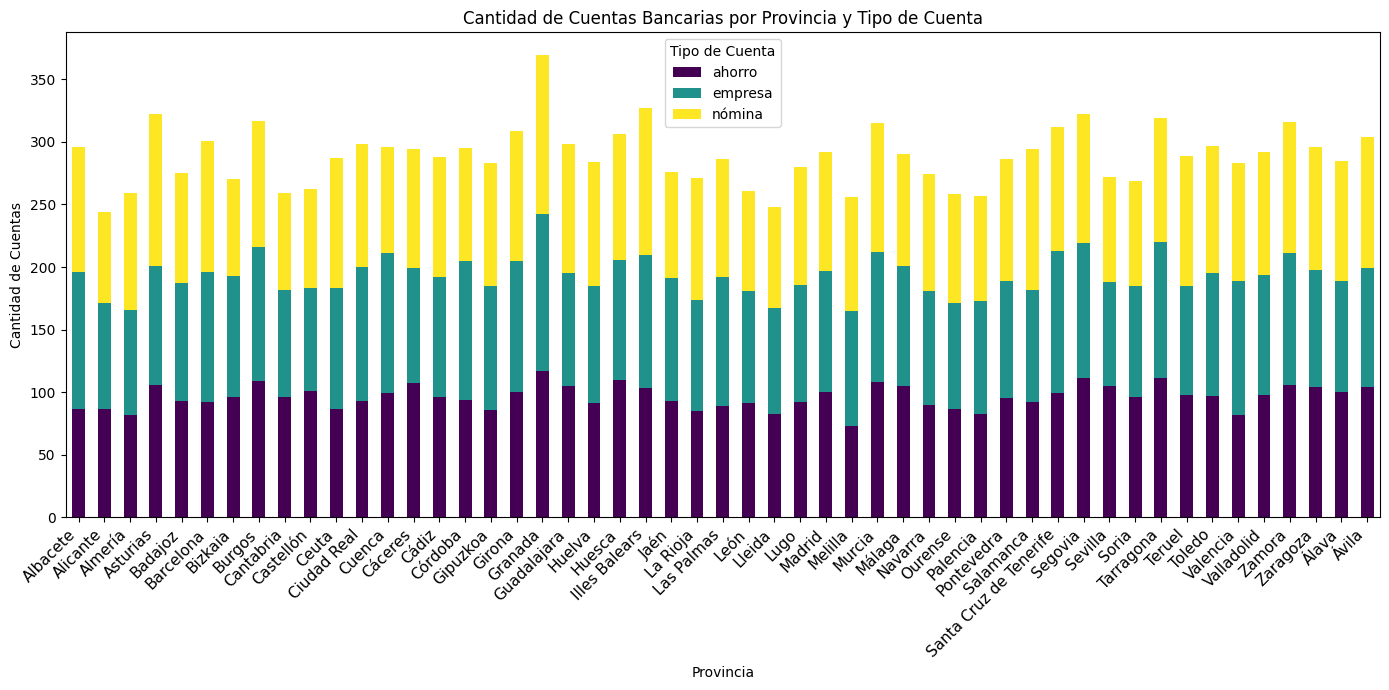

In [81]:
# Supongamos que df_usuarios tiene provincia codificada con LabelEncoder
le = LabelEncoder()
le.fit(provincias_espana)

# Ejemplo de df_usuarios con provincias codificadas (NO modificar)
# df_usuarios['provincia'] está codificada (números)

# 1. Mapear código a nombre en df_usuarios (sin eliminar columnas)
df_usuarios['provincia_nombre'] = df_usuarios['provincia'].map(dict(zip(range(len(le.classes_)), le.classes_)))

# 2. Hacer merge con df_cuentas para añadir provincia_nombre
df_cuentas_prov = df_cuentas.merge(df_usuarios[['usuario_id', 'provincia_nombre']], on='usuario_id', how='left')

# 3. Agrupar por provincia_nombre y tipo_cuenta
cuentas_bancarias_provincia = df_cuentas_prov.groupby(['provincia_nombre', 'tipo_cuenta']).size().unstack(fill_value=0)

# 4. Graficar con provincias como índice (nombre)
cuentas_bancarias_provincia.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()


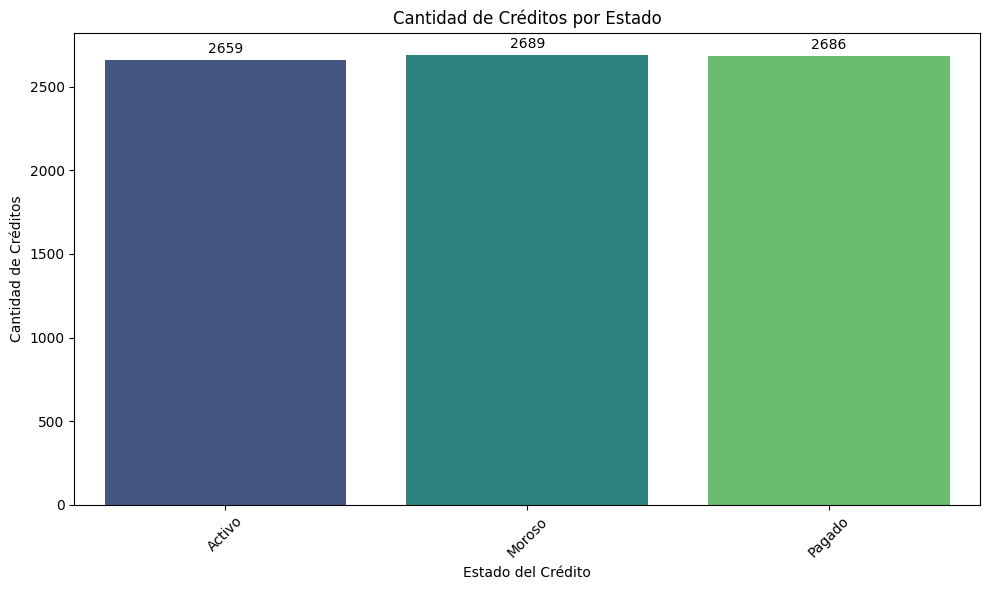

In [82]:
#estado de los creditos
creditos_estado = creditos.groupby('estado')['usuario_id'].count().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=creditos_estado, x='estado', y='usuario_id', palette='viridis')
plt.title("Cantidad de Créditos por Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Cantidad de Créditos")
plt.xticks(rotation=45)

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', 
                fontsize=10, color='black',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

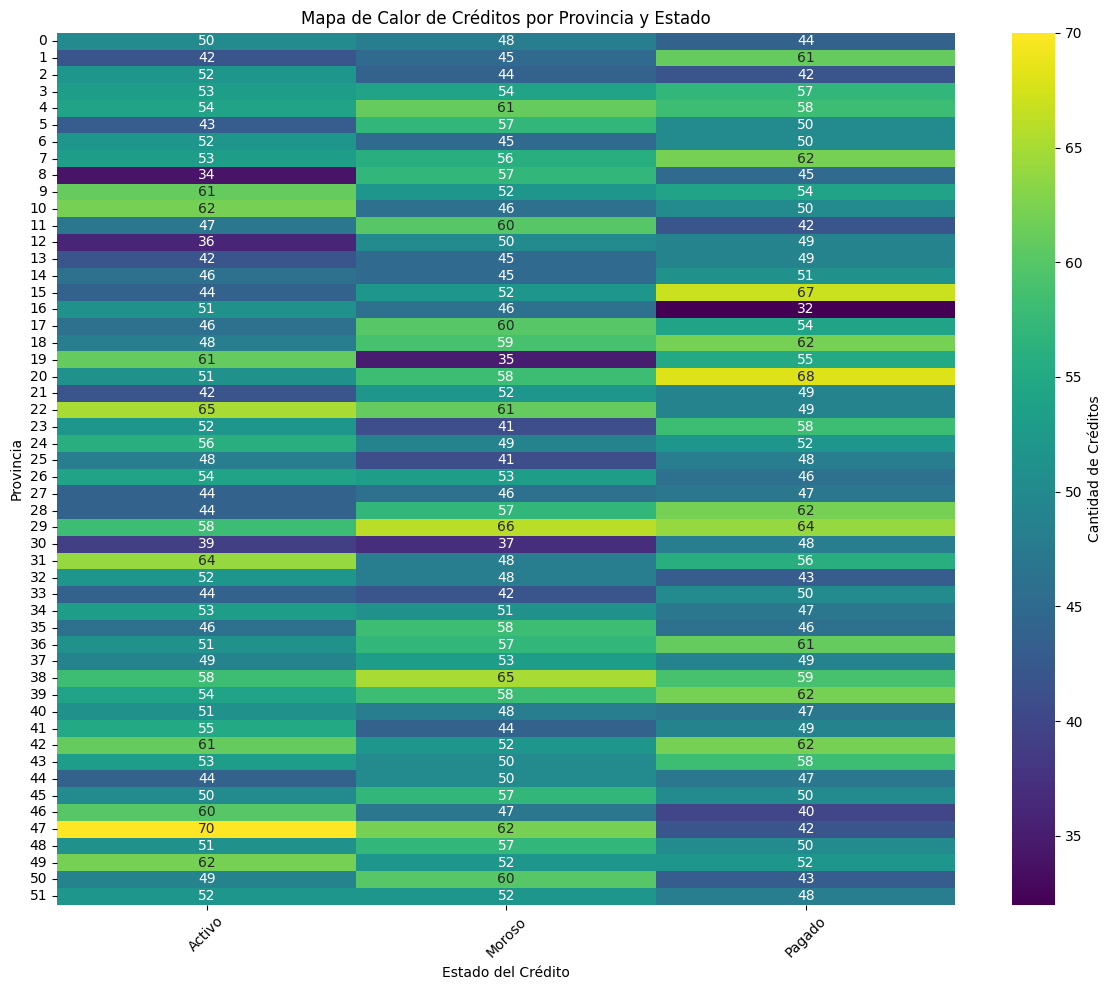

In [83]:
#mapa de calor de créditos por provincia y estado
creditos_provincia_estado = creditos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
creditos_provincia_estado = creditos_provincia_estado.groupby(['provincia', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(creditos_provincia_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Provincia y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

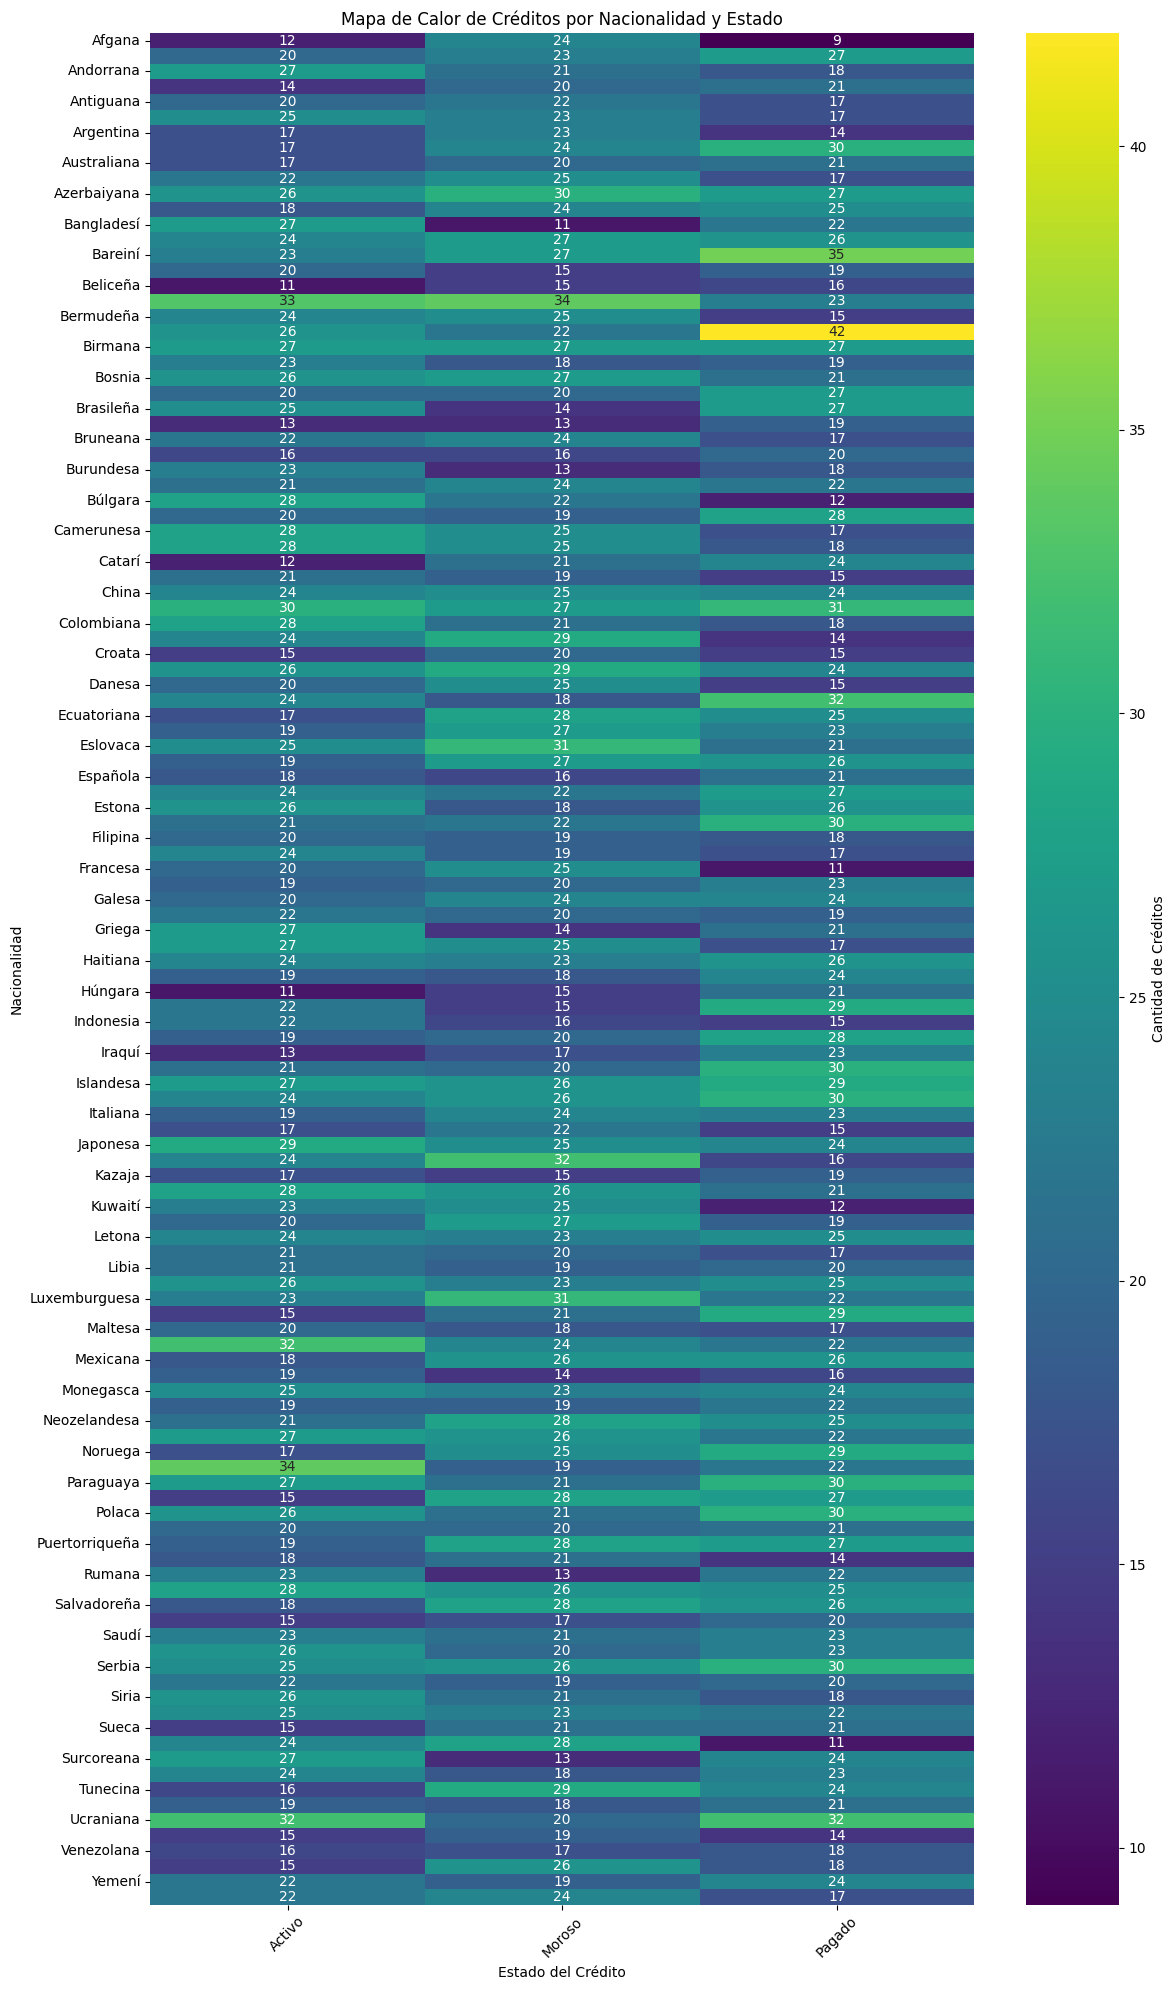

In [84]:
#mapa de calor de creditos por nacionalidad y estado
creditos_nacionalidad_estado = creditos.merge(df_usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
creditos_nacionalidad_estado = creditos_nacionalidad_estado.groupby(['nacionalidad', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 20))
sns.heatmap(creditos_nacionalidad_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Nacionalidad y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Nacionalidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

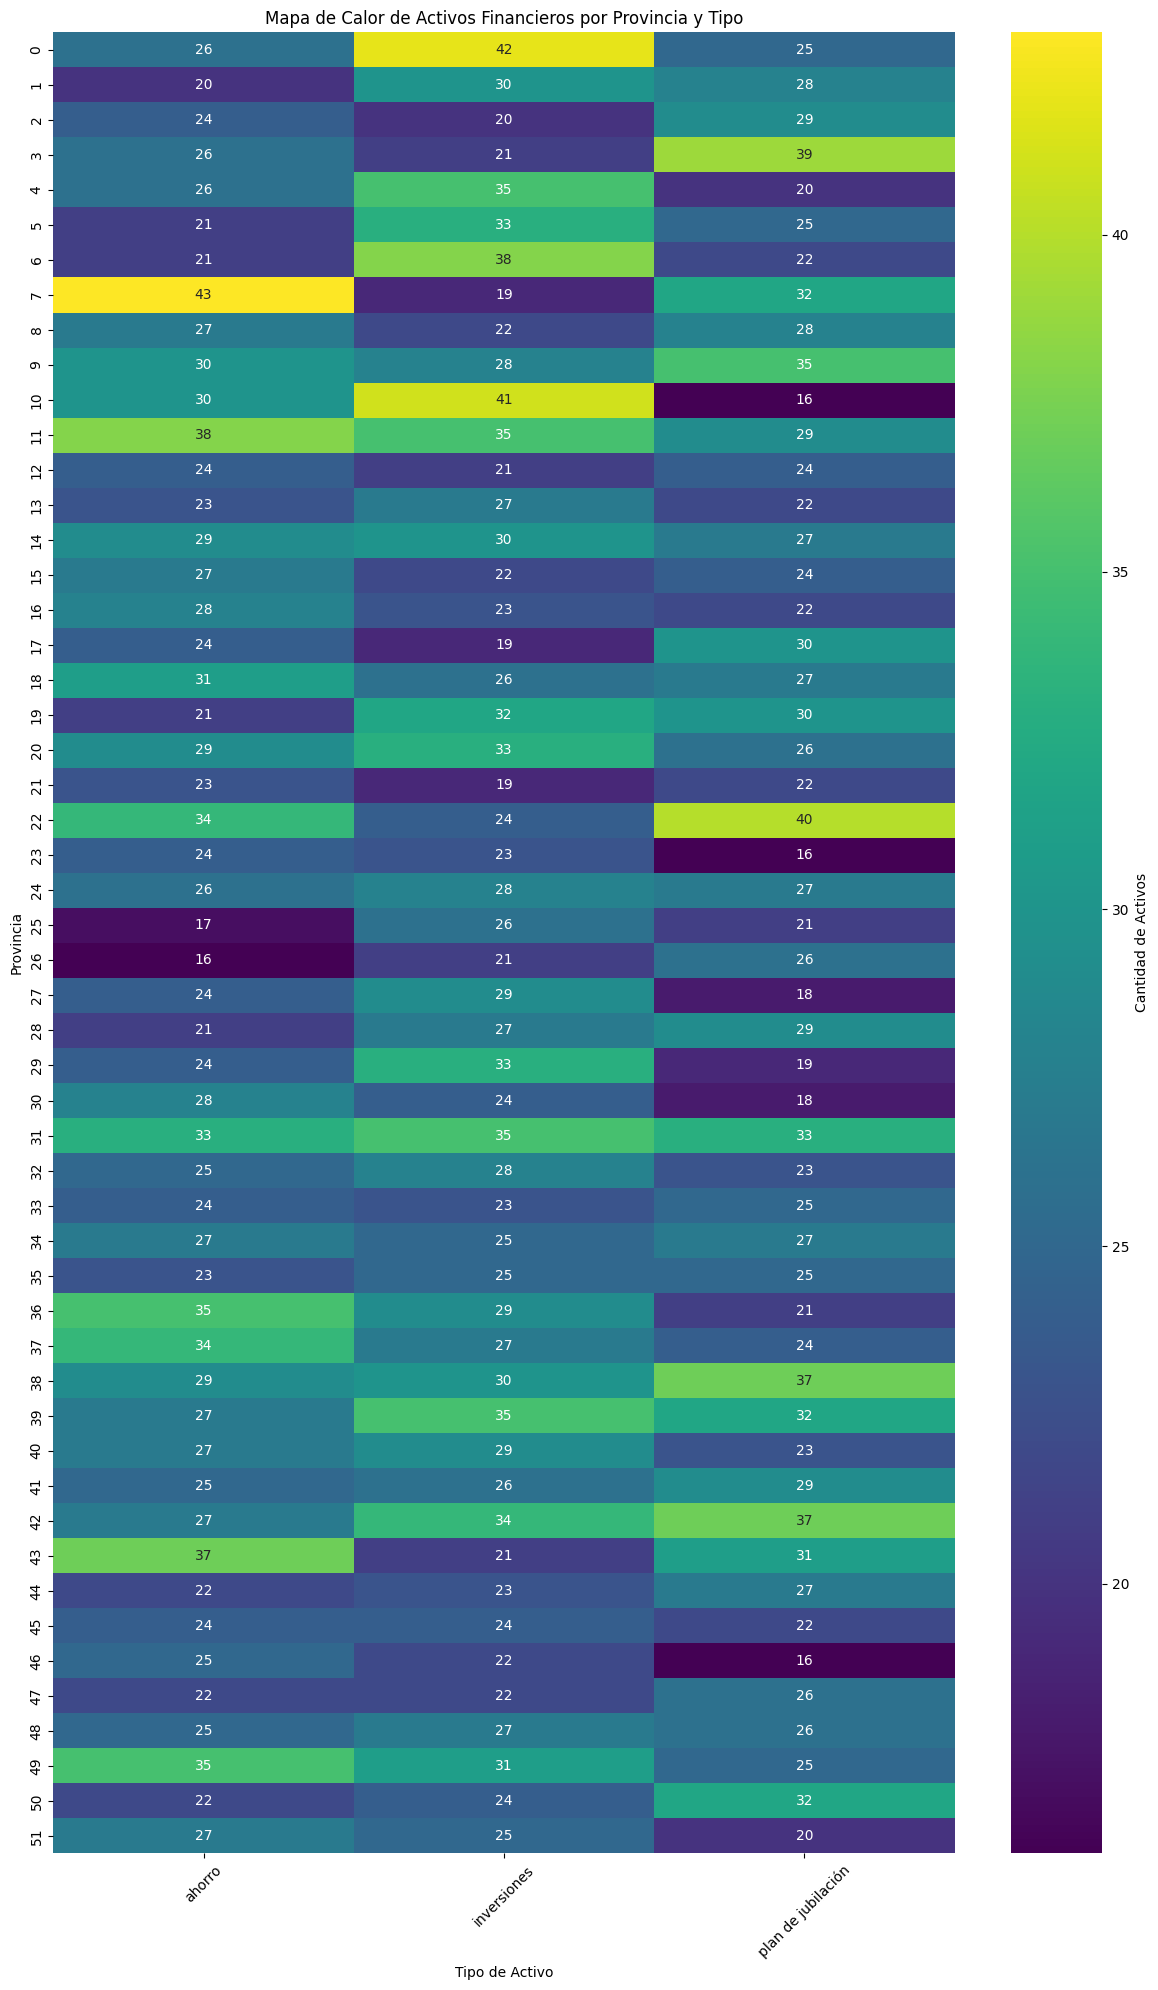

In [85]:
#mapa de calor de activos financieros por provincia y tipo
activos_provincia_tipo = df_activos.merge(df_usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
activos_provincia_tipo = activos_provincia_tipo.groupby(['provincia', 'tipo_activo']).size().unstack().fillna(0)
plt.figure(figsize=(12, 20))
sns.heatmap(activos_provincia_tipo, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Activos'})
plt.title("Mapa de Calor de Activos Financieros por Provincia y Tipo")
plt.xlabel("Tipo de Activo")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
# Estadísticas básicas de créditos
credito_max = df_creditos['monto_total_creditos'].max()
credito_min = df_creditos['monto_total_creditos'].min()
credito_promedio = df_creditos['monto_total_creditos'].mean()
credito_total = df_creditos['monto_total_creditos'].sum()

print(f"Crédito máximo: {credito_max}")
print(f"Crédito mínimo: {credito_min}")
print(f"Crédito promedio: {credito_promedio:.2f}")
print(f"Total de créditos: {credito_total}")


Crédito máximo: 49990.72
Crédito mínimo: 1008.39
Crédito promedio: 25107.17
Total de créditos: 201710987.13


In [87]:
# Merge con edad
creditos_edad = df_creditos.merge(df_usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')

# Crear rangos de edad
bins = [18, 24, 34, 44, 54, 64, 120]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
creditos_edad['rango_edad'] = pd.cut(creditos_edad['edad'], bins=bins, labels=labels, right=True)

# Estadísticas por rango de edad
estadisticas_edad = creditos_edad.groupby('rango_edad')['monto_total_creditos'].agg(
    credito_max='max',
    credito_min='min',
    credito_promedio='mean',
    credito_total='sum'
).reset_index()

print(estadisticas_edad)


  rango_edad  credito_max  credito_min  credito_promedio  credito_total
0      18-24     49990.72      1041.58      25423.114167    18304642.20
1      25-34     49956.86      1044.51      24702.167488    31470561.38
2      35-44     49912.97      1017.42      24911.988713    33880304.65
3      45-54     49979.00      1009.82      25092.843525    31466425.78
4      55-64     49971.82      1016.57      25305.772838    30493456.27
5        65+     49969.33      1008.39      25255.003291    53490096.97


In [88]:
import os
print(os.path.exists("provincias-espanolas.geojson"))



True


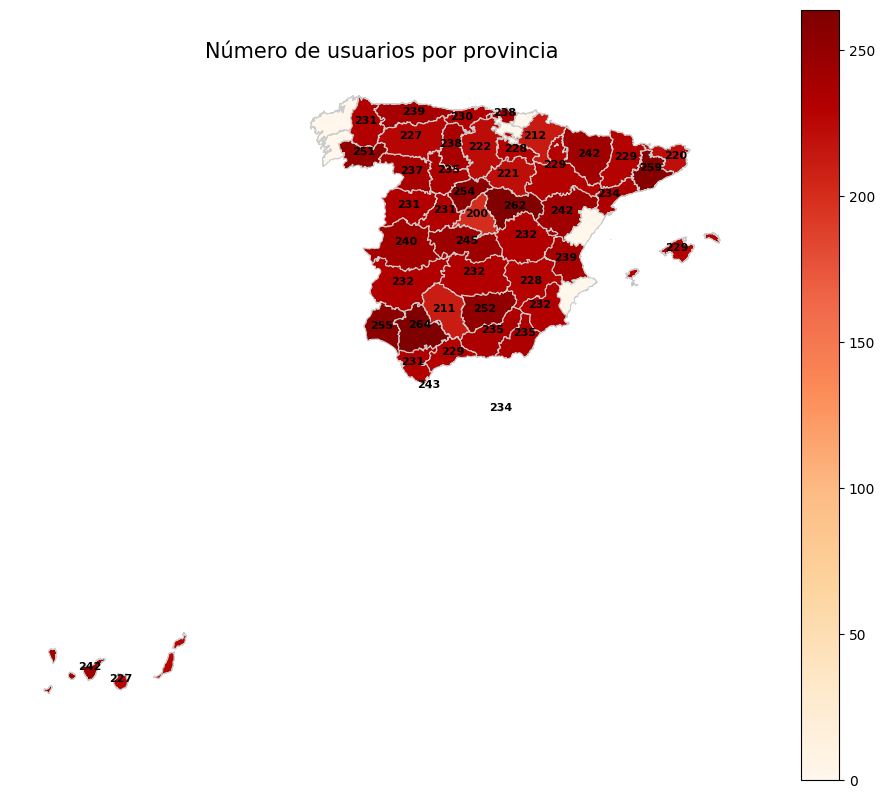

In [89]:
import geopandas as gpd
import os
import unidecode

# Diccionario código provincia (string) -> nombre provincia limpio (sin tildes y en minúsculas)
codigo_a_nombre = {
    '1': 'alava',
    '2': 'albacete',
    '3': 'alicante',
    '4': 'almeria',
    '5': 'avila',
    '6': 'badajoz',
    '7': 'barcelona',
    '8': 'burgos',
    '9': 'caceres',
    '10': 'cadiz',
    '11': 'castellon',
    '12': 'ciudad real',
    '13': 'cordoba',
    '14': 'coruna',
    '15': 'cuenca',
    '16': 'girona',
    '17': 'granada',
    '18': 'guadalajara',
    '19': 'guipuzcoa',
    '20': 'huelva',
    '21': 'huesca',
    '22': 'jaen',
    '23': 'leon',
    '24': 'lleida',
    '25': 'la rioja',
    '26': 'lugo',
    '27': 'madrid',
    '28': 'malaga',
    '29': 'murcia',
    '30': 'navarra',
    '31': 'ourense',
    '32': 'asturias',
    '33': 'palencia',
    '34': 'las palmas',
    '35': 'salamanca',
    '36': 'santa cruz de tenerife',
    '37': 'cantabria',
    '38': 'segovia',
    '39': 'sevilla',
    '40': 'soria',
    '41': 'tarragona',
    '42': 'teruel',
    '43': 'toledo',
    '44': 'valencia',
    '45': 'valladolid',
    '46': 'bizkaia',
    '47': 'zamora',
    '48': 'zaragoza',
    '49': 'ceuta',
    '50': 'melilla',
    '51': 'illes balears'
}

# Función para limpiar nombres: minúsculas, quitar espacios y tildes
def limpiar_nombre(nombre):
    if pd.isna(nombre):
        return ""
    nombre = nombre.lower().strip()
    nombre = unidecode.unidecode(nombre)
    return nombre

# --- Carga tus datos aquí ---

# Ejemplo: cargar GeoJSON de provincias
mapa_provincias = gpd.read_file("provincias-espanolas.geojson")

# Asume que tienes un DataFrame df_usuarios con columna 'provincia' que contiene códigos como strings o ints
# df_usuarios = pd.read_csv("usuarios.csv")  # o como lo tengas cargado

# Convertir provincia a str para mapear
df_usuarios['provincia'] = df_usuarios['provincia'].astype(str)

# Mapear códigos a nombres
df_usuarios['provincia'] = df_usuarios['provincia'].map(codigo_a_nombre)

# Quitar filas sin provincia válida
df_usuarios = df_usuarios.dropna(subset=['provincia'])

# Limpiar nombres en ambos DataFrames
df_usuarios['provincia'] = df_usuarios['provincia'].apply(limpiar_nombre)
mapa_provincias['provincia'] = mapa_provincias['provincia'].apply(limpiar_nombre)

# Contar usuarios por provincia
usuarios_por_provincia = df_usuarios['provincia'].value_counts().reset_index()
usuarios_por_provincia.columns = ['provincia', 'usuarios']

# Merge con GeoDataFrame
mapa_con_datos = mapa_provincias.merge(usuarios_por_provincia, on='provincia', how='left')
mapa_con_datos['usuarios'] = mapa_con_datos['usuarios'].fillna(0)

# Graficar
fig, ax = plt.subplots(figsize=(12, 10))
mapa_con_datos.plot(column='usuarios',
                    cmap='OrRd',
                    legend=True,
                    linewidth=0.8,
                    edgecolor='0.8',
                    ax=ax)

# Añadir etiquetas de número de usuarios en el centroide de cada provincia
for idx, row in mapa_con_datos.iterrows():
    if row['usuarios'] > 0:
        point = row['geometry'].representative_point()
        ax.annotate(text=int(row['usuarios']),
                    xy=(point.x, point.y),
                    horizontalalignment='center',
                    fontsize=8,
                    fontweight='bold',
                    color='black')

ax.set_title('Número de usuarios por provincia', fontsize=15)
ax.axis('off')

# Guardar imagen en carpeta docs
os.makedirs('../docs', exist_ok=True)
plt.savefig("../docs/usuarios_por_provincia.png", dpi=300, bbox_inches='tight')

plt.show()


In [90]:
#!pip install unidecode

In [91]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import unidecode
import os

# --- Función para limpiar nombres ---
def limpiar_nombre(nombre):
    if pd.isna(nombre):
        return ""
    return unidecode.unidecode(str(nombre).lower().strip())

# --- Cargar GeoJSON con provincias españolas ---
provincias = gpd.read_file("provincias-espanolas.geojson")

# --- Limpiar nombres en el GeoDataFrame ---
provincias['provincia'] = provincias['provincia'].apply(limpiar_nombre)

# --- Limpieza de columna provincia_nombre en usuarios ---
df_usuarios['provincia_nombre'] = df_usuarios['provincia_nombre'].apply(limpiar_nombre)

# --- Contar usuarios por provincia ---
usuarios_provincia = df_usuarios.groupby('provincia_nombre').size().reset_index(name='cantidad_usuarios')

# --- Renombrar columna para merge ---
usuarios_provincia = usuarios_provincia.rename(columns={'provincia_nombre': 'provincia'})

# --- Merge con el GeoDataFrame ---
mapa = provincias.merge(usuarios_provincia, on='provincia', how='left')

# Rellenar NaN con 0 para provincias sin usuarios
mapa['cantidad_usuarios'] = mapa['cantidad_usuarios'].fillna(0)

# --- Normalizar valores para colorear ---
max_val = mapa['cantidad_usuarios'].max()
norm = mcolors.Normalize(vmin=0, vmax=max_val)
cmap = plt.cm.viridis

def color_provincia(feature):
    val = feature['properties'].get('cantidad_usuarios', 0)
    rgba = cmap(norm(val))
    return mcolors.to_hex(rgba)

# --- Crear mapa base centrado en España ---
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Convertir GeoDataFrame a GeoJSON
geojson_data = mapa.to_json()

# Añadir capa al mapa con color y tooltip
folium.GeoJson(
    geojson_data,
    name='Provincias',
    style_function=lambda feature: {
        'fillColor': color_provincia(feature),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['provincia', 'cantidad_usuarios'],
        aliases=['Provincia:', 'Cantidad de Usuarios:'],
        localize=True
    )
).add_to(m)

# Crear carpeta docs si no existe
os.makedirs('../docs', exist_ok=True)

# Guardar mapa interactivo en carpeta docs
m.save("../docs/mapa_usuarios_provincias.html")



# Si usas Jupyter Notebook, muestra el mapa aquí mismo
try:
    from IPython.display import display
    display(m)
except ImportError:
    pass

In [92]:
import os
import pandas as pd
import geopandas as gpd
import unidecode
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium

# Función para limpiar nombres
def limpiar_nombre(nombre):
    if pd.isna(nombre):
        return ""
    return unidecode.unidecode(str(nombre).lower().strip())

# --- Cargar GeoJSON con provincias españolas ---
provincias = gpd.read_file("provincias-espanolas.geojson")
provincias['provincia'] = provincias['provincia'].apply(limpiar_nombre)

# --- Limpiar columna provincia_nombre en df_usuarios ---
df_usuarios['provincia_nombre'] = df_usuarios['provincia_nombre'].apply(limpiar_nombre)

# Función para limpiar columnas conflictivas antes del merge
def limpiar_columnas_provincia(df):
    cols_a_eliminar = [col for col in df.columns if col.startswith('provincia_nombre')]
    if cols_a_eliminar:
        df = df.drop(columns=cols_a_eliminar)
    return df

# Limpiar y mergear df_activos con df_usuarios
df_activos = limpiar_columnas_provincia(df_activos)
df_activos = df_activos.merge(
    df_usuarios[['usuario_id', 'provincia_nombre']],
    on='usuario_id',
    how='left'
)
df_activos['provincia_nombre'] = df_activos['provincia_nombre'].fillna('desconocida').apply(limpiar_nombre)

# Sumar monto_activo por provincia
activos_provincia = df_activos.groupby('provincia_nombre')['monto_activo'].sum().reset_index()
activos_provincia = activos_provincia.rename(columns={'monto_activo': 'activos_financieros'})

# Limpiar y mergear df_monedas con df_usuarios
df_monedas = limpiar_columnas_provincia(df_monedas)
df_monedas = df_monedas.merge(
    df_usuarios[['usuario_id', 'provincia_nombre']],
    on='usuario_id',
    how='left'
)
df_monedas['provincia_nombre'] = df_monedas['provincia_nombre'].fillna('desconocida').apply(limpiar_nombre)

# Sumar monedas digitales por provincia (usar df_monedasd, no df_monedas)
monedas_provincia = df_monedas.groupby('provincia_nombre')['cantidad'].sum().reset_index()
monedas_provincia = monedas_provincia.rename(columns={'cantidad': 'monedas_digitales'})

# Limpiar y mergear df_creditos con df_usuarios
df_creditos = limpiar_columnas_provincia(df_creditos)
df_creditos = df_creditos.merge(
    df_usuarios[['usuario_id', 'provincia_nombre']],
    on='usuario_id',
    how='left'
)
df_creditos['provincia_nombre'] = df_creditos['provincia_nombre'].fillna('desconocida').apply(limpiar_nombre)

# Sumar créditos por provincia
creditos_provincia = df_creditos.groupby('provincia_nombre')['monto_total_creditos'].sum().reset_index()
creditos_provincia = creditos_provincia.rename(columns={'monto_total_creditos': 'creditos'})

# Contar usuarios por provincia
usuarios_provincia = df_usuarios.groupby('provincia_nombre').size().reset_index(name='cantidad_usuarios')

# Unir todos los datos por provincia
df_merged = usuarios_provincia.merge(activos_provincia, on='provincia_nombre', how='left')
df_merged = df_merged.merge(monedas_provincia, on='provincia_nombre', how='left')
df_merged = df_merged.merge(creditos_provincia, on='provincia_nombre', how='left')

# Renombrar para merge con GeoDataFrame
df_merged = df_merged.rename(columns={'provincia_nombre': 'provincia'})

# Rellenar NaNs con 0
df_merged[['cantidad_usuarios', 'activos_financieros', 'monedas_digitales', 'creditos']] = df_merged[
    ['cantidad_usuarios', 'activos_financieros', 'monedas_digitales', 'creditos']].fillna(0)

# Merge con GeoDataFrame provincias
mapa = provincias.merge(df_merged, on='provincia', how='left')
mapa[['cantidad_usuarios', 'activos_financieros', 'monedas_digitales', 'creditos']] = mapa[
    ['cantidad_usuarios', 'activos_financieros', 'monedas_digitales', 'creditos']].fillna(0)

# Normalizar para colorear según cantidad_usuarios
max_val = mapa['cantidad_usuarios'].max()
norm = mcolors.Normalize(vmin=0, vmax=max_val)
cmap = plt.cm.viridis

def color_provincia(feature):
    val = feature['properties'].get('cantidad_usuarios', 0)
    rgba = cmap(norm(val))
    return mcolors.to_hex(rgba)

# Crear mapa folium
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

geojson_data = mapa.to_json()

folium.GeoJson(
    geojson_data,
    name='Provincias',
    style_function=lambda feature: {
        'fillColor': color_provincia(feature),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['provincia', 'cantidad_usuarios', 'activos_financieros', 'monedas_digitales', 'creditos'],
        aliases=['Provincia:', 'Usuarios:', 'Activos financieros:', 'Monedas digitales:', 'Créditos:'],
        localize=True
    )
).add_to(m)

# Crear carpeta docs si no existe
os.makedirs('../docs', exist_ok=True)

# Guardar mapa interactivo
m.save("../docs/mapa_usuarios_provincias.html")

# Mostrar mapa en Jupyter si es posible
try:
    from IPython.display import display
    display(m)
except ImportError:
    pass


### Conclusiones del Análisis Exploratorio

El análisis realizado sobre la base de datos financiera revela varios patrones y tendencias relevantes:

- **Distribución de Usuarios y Créditos:**  
    La mayoría de los usuarios se concentran en provincias con mayor densidad poblacional, como Madrid, Barcelona y Valencia. Estas provincias también presentan un mayor número de créditos otorgados, lo que sugiere una correlación entre población y actividad financiera.

- **Morosidad:**  
    La tasa de morosidad varía significativamente según provincia, nacionalidad, estado civil, edad y profesión. Se observa que ciertos grupos de edad y profesiones presentan una mayor propensión a la morosidad. Además, los usuarios morosos tienden a tener más créditos en promedio, lo que puede indicar un mayor riesgo crediticio asociado a la acumulación de deudas.

- **Activos Financieros y Monedas Digitales:**  
    Los usuarios con mayor cantidad de activos financieros y monedas digitales suelen estar en provincias económicamente más activas. Los usuarios jóvenes (<30 años) destacan por su mayor adopción de monedas digitales, lo que refleja una tendencia generacional hacia nuevas formas de inversión.

- **Cuentas Bancarias y Tipos de Activos:**  
    La diversidad de tipos de cuentas y activos financieros es mayor en las provincias con mayor actividad económica. Existen diferencias notables en la preferencia de tipos de cuentas y activos según nacionalidad y rango de edad.

- **Duración y Estado de los Créditos:**  
    La duración media de los créditos varía por provincia y nacionalidad, lo que puede estar relacionado con factores socioeconómicos y culturales. La mayoría de los créditos se encuentran en estado activo, aunque existe una proporción significativa en mora o impago.

- **Relaciones y Correlaciones:**  
    Se identifican correlaciones positivas entre el monto total de créditos, activos financieros y cantidad de cuentas bancarias. Sin embargo, la relación entre morosidad y nivel de ingresos no es lineal, lo que sugiere la influencia de otros factores en el riesgo crediticio.

- **Modelos Predictivos:**  
    Los modelos de clasificación permiten identificar las variables más relevantes para predecir la morosidad, destacando la cantidad de créditos, el monto total de créditos y el salario como factores clave.

---

**En resumen:**  
El análisis evidencia la importancia de segmentar a los usuarios por características demográficas y financieras para una mejor gestión del riesgo crediticio. Las provincias y nacionalidades con mayor actividad económica presentan tanto mayores oportunidades como riesgos. La adopción de monedas digitales y la diversificación de activos son tendencias crecientes, especialmente entre los usuarios más jóvenes. Finalmente, la integración de modelos predictivos puede mejorar la toma de decisiones en la concesión de créditos y la gestión de la morosidad.